# Exercise 03 - CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D
from keras import regularizers, initializers

%load_ext autoreload
%autoreload 1
%aimport plot_utils
%aimport generate_data

In [ ]:
# reproducibility
np.random.seed(12345)
tf.random.set_seed(12345)

## Functions

In [ ]:
def standardize_sample(x):
    """rescale data sample-wise: for each sample subtract the mean and divide by std"""

    xm = x.mean(axis=1)
    for i in range(N):
        x[i] = x[i]-xm[i]
    vm = np.std(x, axis=1)
    x = x/vm
    
    return x

def standardize_all(x):
    """rescale data semi-sample-wise: subtract the mean sample-wise then divide by the total std"""

    xm = x.mean(axis=1)
    for i in range(N):
        x[i] = x[i]-xm[i]
    vm = np.std(x)
    x = x/vm

    return x


def keras_reshape(x):
    """reshape data to fit keras shape requirements"""
    
    return x.reshape(x.shape[0], x.shape[1], 1)


### Read data

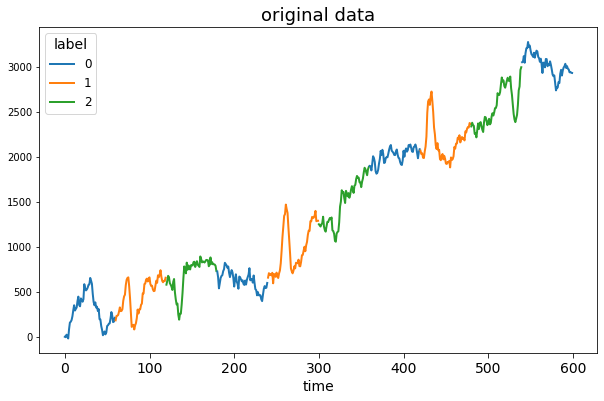

number of data :  10000


In [ ]:
# time series data parameters
L       = 60
Z       = 12
A       = 500
DX      = 50
bias    = 5
N       = 10000
n_class = 3  

# time series data filename
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

# load data
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
# load categories
c = np.loadtxt(fnamey, dtype=int)
# build time grid
t_grid = np.arange(0, L*N).reshape(N, L)

# format labels from categories
y = np.zeros((N, n_class))
for i in range(N):
    y[i][c[i]] = 1

fig = plt.figure(figsize=(10,6))
ax = plot_utils.plot_data(x, t_grid, fig, n_samples=10, title="original data", legend=True)
plt.show()

print("number of data : ", N)

### Rescale data

In [ ]:
def find_line(x):
    return x[-1] - x[0] / 60

m     = np.array([find_line(samp) for samp in x])
alpha = np.arctan(m)

x_scaled = 

(10000,)

__[CLICCAMI](https://www.youtube.com/watch?v=gU3WwHumuwc)__

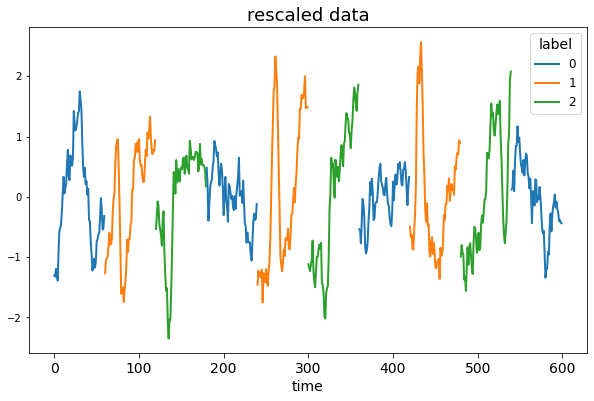

In [ ]:
# data rescaling
x = standardize_all(x)

fig = plt.figure(figsize=(10,6))
ax = plot_utils.plot_data(x, t_grid, fig, n_samples=10, title="rescaled data", legend=True)
plt.show()

### Training, validation and test sets

In [ ]:
train_test_frac  = 0.7
valid_train_frac = 0.3

N_train = int(N*train_test_frac*(1-valid_train_frac))
N_valid = int(N*train_test_frac*valid_train_frac)
N_test  = int(N*(1-train_test_frac))

train_idx = N_train
valid_idx = N_train+N_valid
test_idx  = N_train+N_test

x_train    = x[0:train_idx]
y_train    = y[0:train_idx]
x_val      = x[train_idx:valid_idx]
y_val      = y[train_idx:valid_idx]
x_test     = x[valid_idx:test_idx]
y_test     = y[valid_idx:test_idx]

print('N_train =',N_train,'  N_val =',N_valid,'  N_test =',N_test,'  L =',L,'  n_class =',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

x_train = keras_reshape(x_train)
x_val   = keras_reshape(x_val)

input_shape = (L, 1)

N_train = 4900   N_val = 2100   N_test = 3000   L = 60   n_class = 3


## Convolutional NN

In [ ]:
reg = regularizers.l2(0.02)
ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

NF    = 5 # number of filters

model = Sequential(name="carlo")

model.add(
    Conv1D(
        filters            = NF, 
        kernel_size        = 11, 
        kernel_initializer = ini,
        kernel_regularizer = reg,
        activation         = 'relu',
        input_shape        = input_shape
    )
)
model.add(AveragePooling1D(5)) # average of 5 values
model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(n_class, activation='softmax'))

print(model.summary())

opt = tf.keras.optimizers='Adam'

# compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

Model: "carlo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 5)             60        
                                                                 
 average_pooling1d (AverageP  (None, 10, 5)            0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 5)              180       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 12)                252       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                             

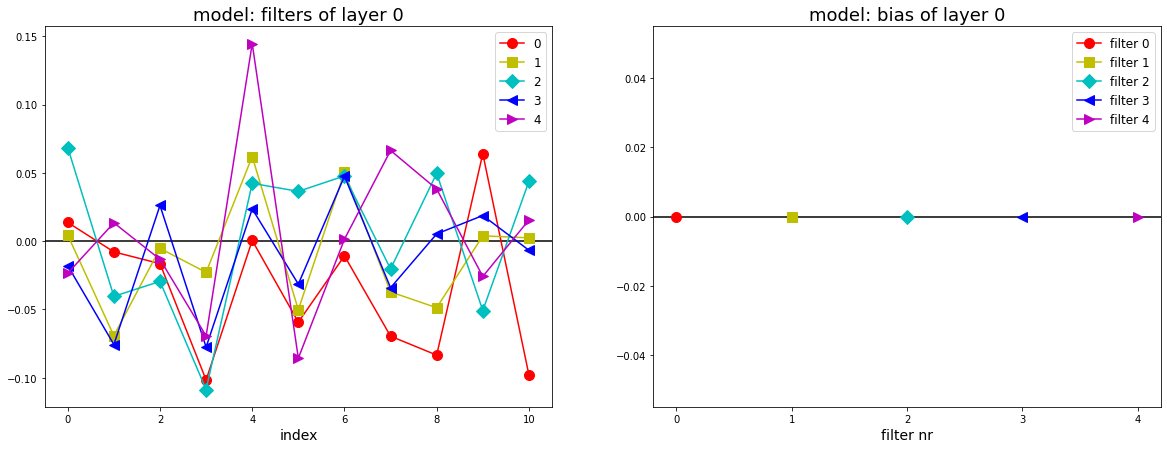

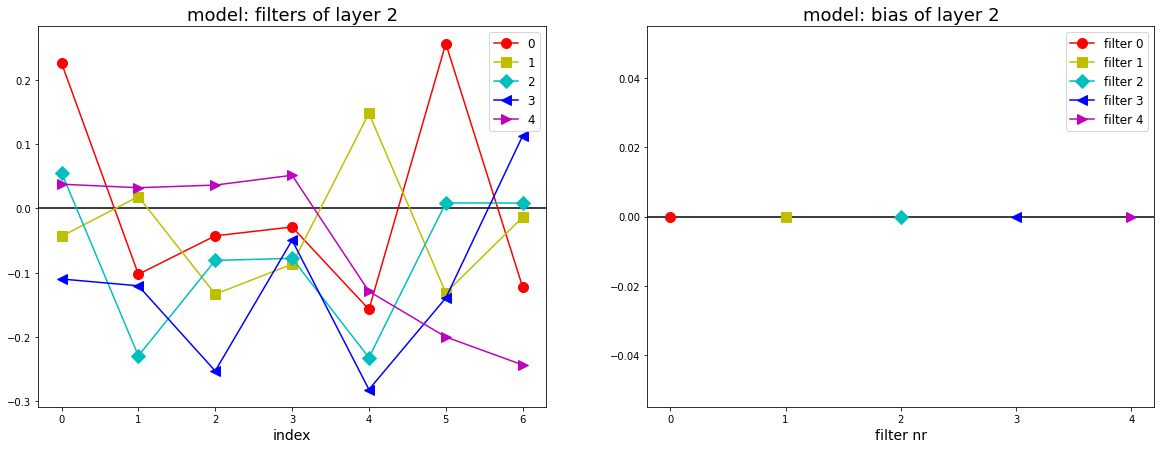

In [ ]:
# plot convolutional layers weights
    
fig = plt.figure(figsize=(20, 7))
ax = plot_utils.plot_weights(model=model,layer=0, fig=fig)
plt.show()

fig = plt.figure(figsize=(20, 7))
ax = plot_utils.plot_weights(model=model,layer=2, fig=fig)
plt.show()

### Training

In [ ]:
BATCH_SIZE = 250
EPOCHS     = 100

fit = model.fit(
    x_train, 
    y_train, 
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS, 
    validation_data = (x_val, y_val),
    verbose         = 0, 
    shuffle         = True
)

### Plot accuracy, loss and weights

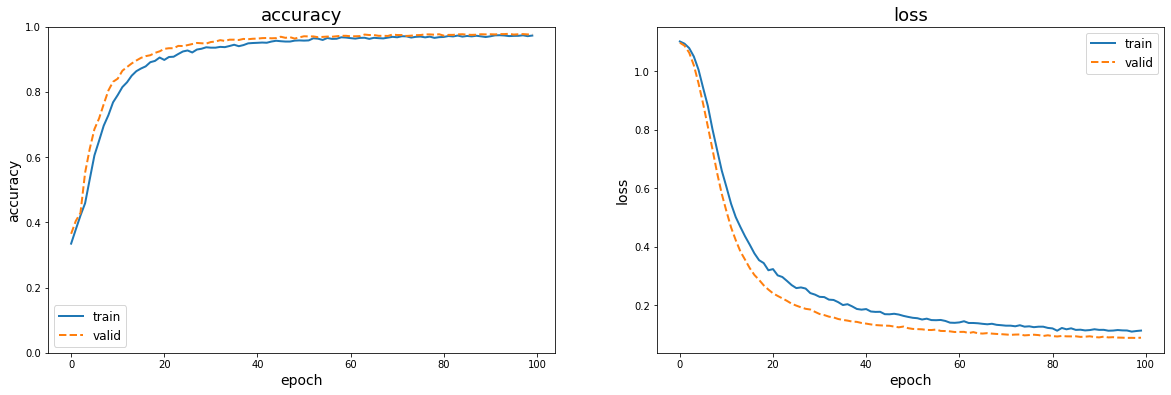

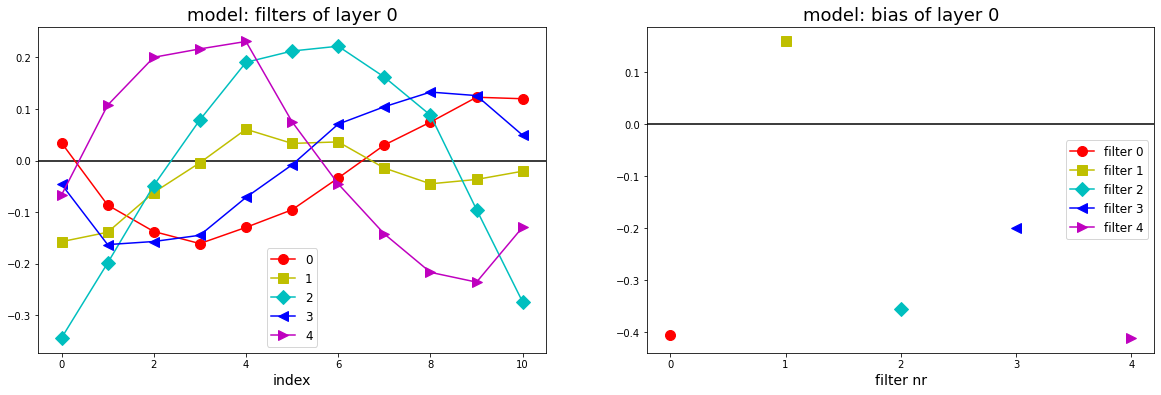

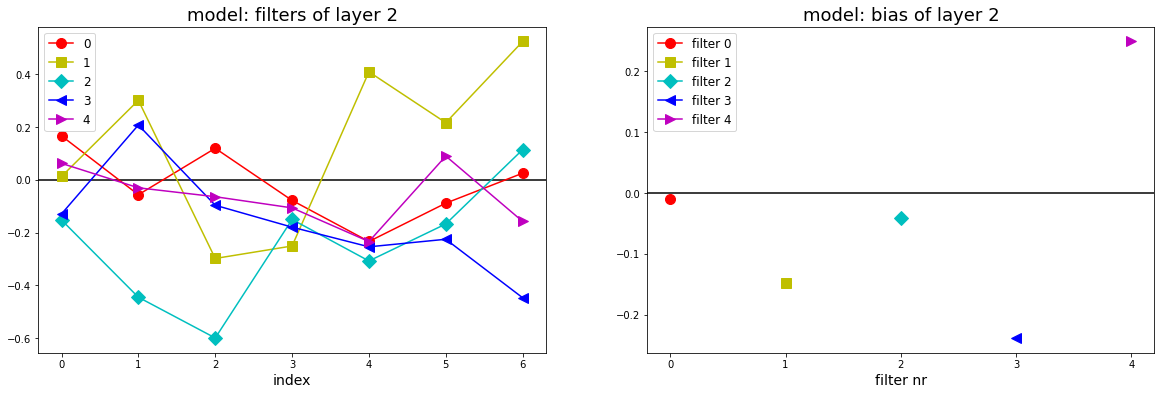

In [ ]:
fig = plt.figure(figsize=(20,6))
ax = plot_utils.plot_history(fit, fig)
plt.show()

fig1 = plt.figure(figsize=(20,6))
plot_utils.plot_weights(model, 0, fig=fig1)
fig2 = plt.figure(figsize=(20,6))
plot_utils.plot_weights(model, 2, fig=fig2)
plt.show()

### Plot confusion matrix

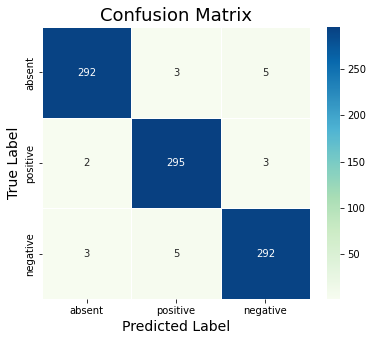

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the val predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

fig = plt.figure(figsize=(6,5))
ax = plot_utils.show_confusion_matrix(true=max_y_test, pred=max_y_pred_test, fig=fig)
plt.show()

In [ ]:
reg = tf.keras.regularizers.l1(0.5)
ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

NF    = 5 # number of filters

model = Sequential(name="antonio")

model.add(
    Conv1D(
        filters            = NF, 
        kernel_size        = 11, 
        kernel_initializer = ini,
        kernel_regularizer = reg,
        activation         = 'relu',
        input_shape        = input_shape
    )
)
model.add(AveragePooling1D(5)) # average of 5 values
model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(n_class, activation='softmax'))

print(model.summary())

opt = tf.keras.optimizers='Adam'

# compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

BATCH_SIZE2 = 250
EPOCHS2 = 100

fit = model.fit(
    x_train, 
    y_train, 
    batch_size      = BATCH_SIZE2,
    epochs          = EPOCHS2, 
    validation_data = (x_val, y_val),
    verbose         = 0, 
    shuffle         = True
)


Model: "antonio"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 50, 5)             60        
                                                                 
 average_pooling1d_1 (Averag  (None, 10, 5)            0         
 ePooling1D)                                                     
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 5)              180       
                                                                 
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                252       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                           

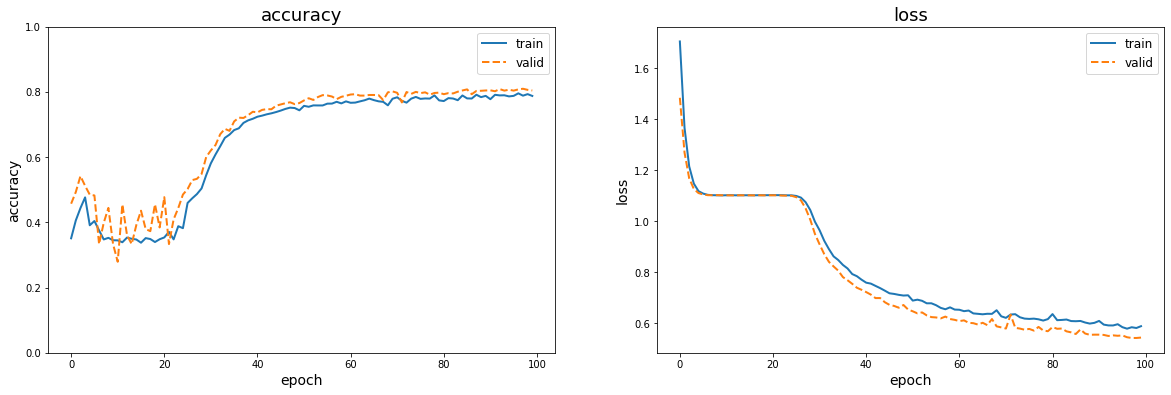

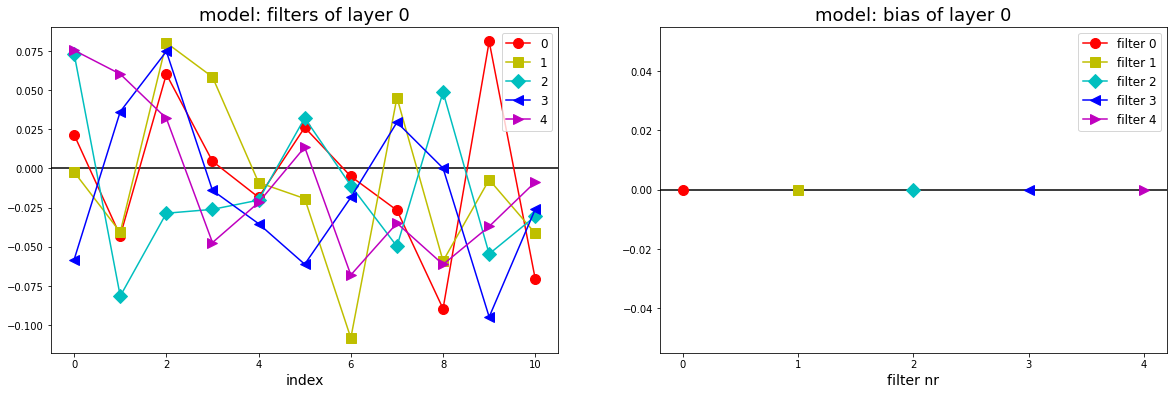

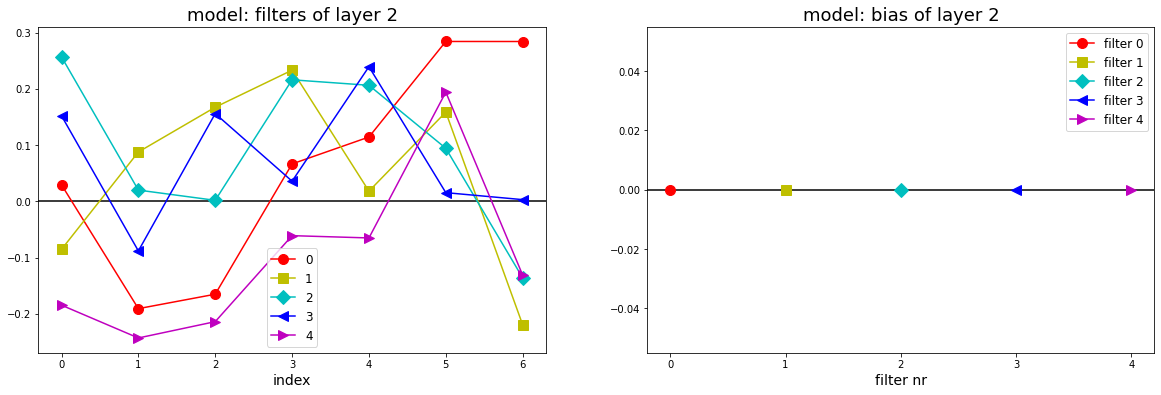

In [ ]:
fig = plt.figure(figsize=(20,6))
ax = plot_utils.plot_history(fit, fig)
plt.show()

fig1 = plt.figure(figsize=(20,6))
plot_utils.plot_weights(model2, 0, fig=fig1)
fig2 = plt.figure(figsize=(20,6))
plot_utils.plot_weights(model2, 2, fig=fig2)
plt.show()

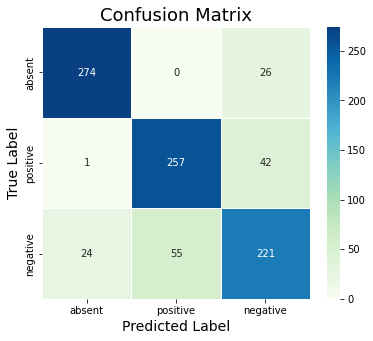

In [ ]:
y_pred_test2 = model.predict(x_test)
# Take the class with the highest probability from the val predictions
max_y_pred_test2 = np.argmax(y_pred_test2, axis=1)
max_y_test2 = np.argmax(y_test, axis=1)

fig = plt.figure(figsize=(6,5))
ax = plot_utils.show_confusion_matrix(true=max_y_test2, pred=max_y_pred_test2, fig=fig)
plt.show()

## Explore different signal-to-noise ratios

In [ ]:
A_list     = [0.1, 1, 10, 20, 50, 80, 150, 250, 400, 700, 1000]
file_names = [generate_data.generate_data(A=A) for A in A_list ]

ts_L60_Z12_A0.1_DX50_bias5_N10000.dat
ts_L60_Z12_A1_DX50_bias5_N10000.dat
ts_L60_Z12_A10_DX50_bias5_N10000.dat
ts_L60_Z12_A20_DX50_bias5_N10000.dat
ts_L60_Z12_A50_DX50_bias5_N10000.dat
ts_L60_Z12_A80_DX50_bias5_N10000.dat
ts_L60_Z12_A150_DX50_bias5_N10000.dat
ts_L60_Z12_A250_DX50_bias5_N10000.dat
ts_L60_Z12_A400_DX50_bias5_N10000.dat
ts_L60_Z12_A700_DX50_bias5_N10000.dat
ts_L60_Z12_A1000_DX50_bias5_N10000.dat


In [ ]:
train_test_frac  = 0.7
valid_train_frac = 0.3

N_train = int(N*train_test_frac*(1-valid_train_frac))
N_valid = int(N*train_test_frac*valid_train_frac)
N_test  = int(N*(1-train_test_frac))

train_idx = N_train
valid_idx = N_train+N_valid
test_idx  = N_train+N_test

NF    = 5 # number of filters

reg = regularizers.l2(0.02)
ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

BATCH_SIZE = 250
EPOCHS     = 100

fits   = []
tests  = []
models = []
y_test_true = []
y_test_pred = []

for i, fname in enumerate(file_names):

    
    # load data
    x = np.loadtxt("DATA/x_"+fname, delimiter=" ",dtype=float)
    # load categories
    c = np.loadtxt("DATA/y_"+fname, dtype=int)
    # build time grid
    t_grid = np.arange(0, L*N).reshape(N, L)
    # format labels from categories
    y = np.zeros((N, n_class))
    for i in range(N):
        y[i][c[i]] = 1

    # data rescaling
    x = standardize_all(x)

    # split training validation test
    x_train    = x[0:train_idx]
    y_train    = y[0:train_idx]
    x_val      = x[train_idx:valid_idx]
    y_val      = y[train_idx:valid_idx]
    x_test     = x[valid_idx:test_idx]
    y_test     = y[valid_idx:test_idx]
    
    x_train = keras_reshape(x_train)
    x_val   = keras_reshape(x_val)

    input_shape = (L, 1)

    model = Sequential(name="carlo")
    model.add(
        Conv1D(
            filters            = NF, 
            kernel_size        = 11, 
            kernel_initializer = ini,
            kernel_regularizer = reg,
            activation         = 'relu',
            input_shape        = input_shape
        )
    )
    model.add(AveragePooling1D(5)) # average of 5 values
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax'))

    opt = tf.keras.optimizers='Adam'

    # compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

    fit = model.fit(
        x_train, 
        y_train, 
        batch_size      = BATCH_SIZE,
        epochs          = EPOCHS, 
        validation_data = (x_val, y_val),
        verbose         = 0, 
        shuffle         = True
    )

    test = model.evaluate(
        x_test, y_test,
        batch_size      = BATCH_SIZE,
        verbose         = 0,
    )

    fits.append(fit)
    tests.append(test)
    models.append(model)

    y_pred_test = model.predict(x_test)
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)

    y_test_true.append(max_y_test)
    y_test_pred.append(max_y_pred_test)


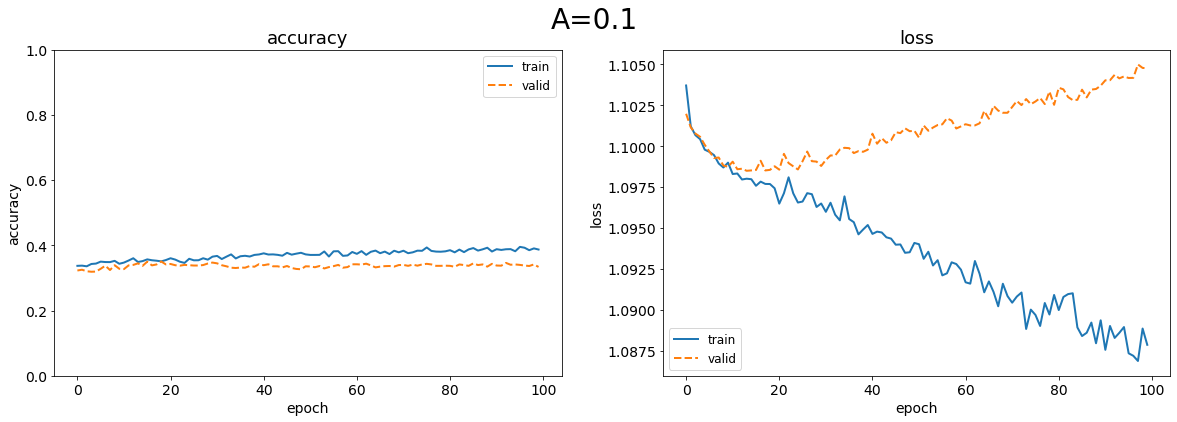

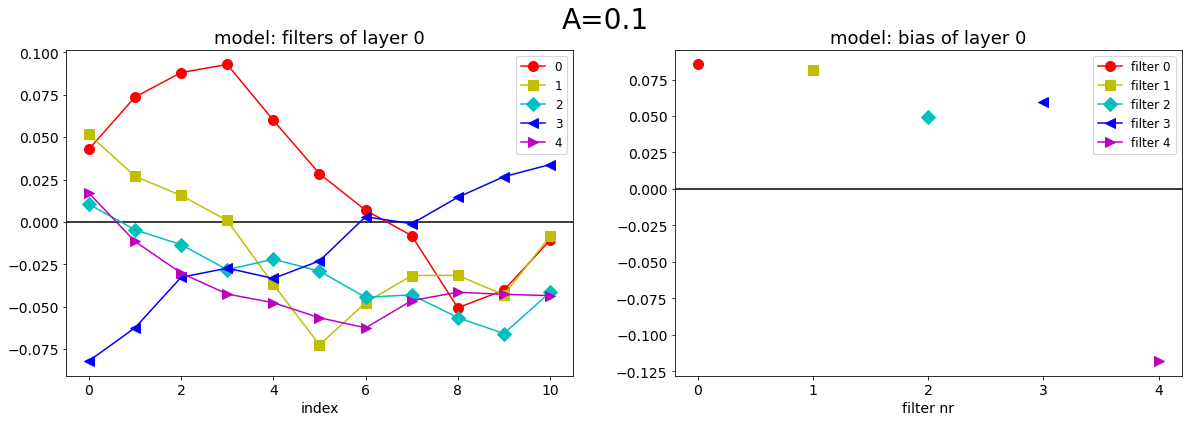

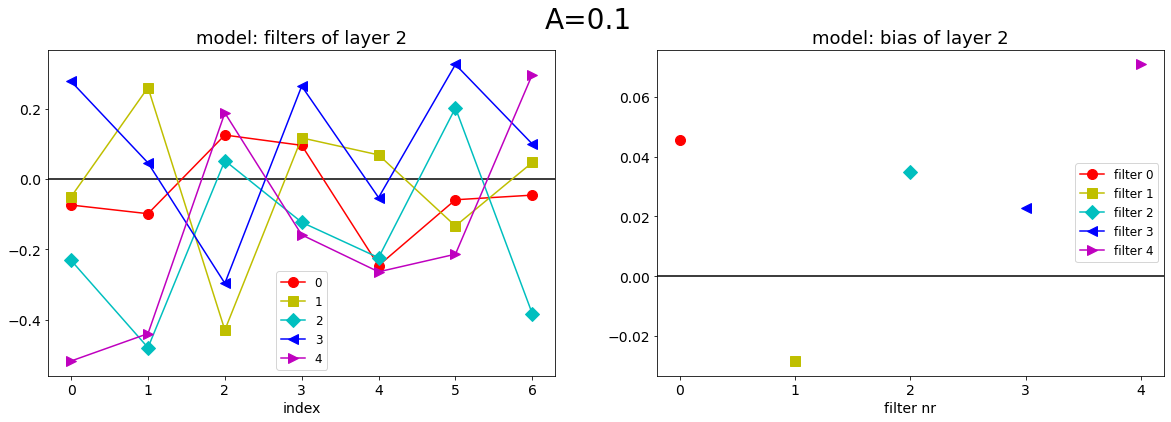

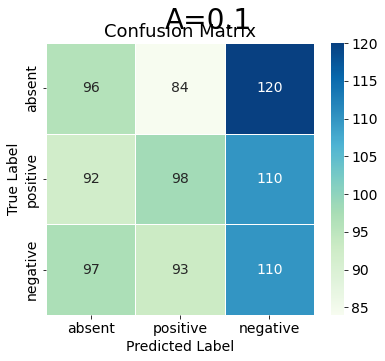

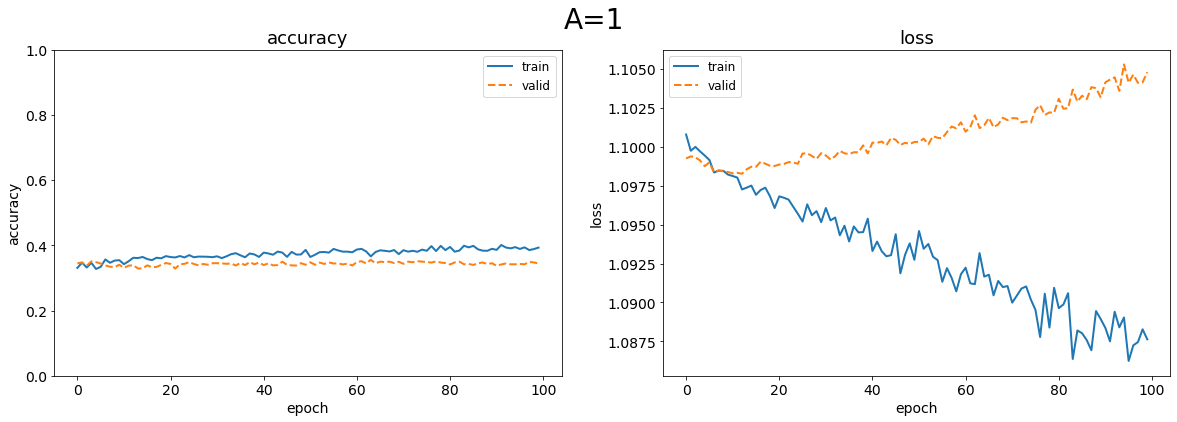

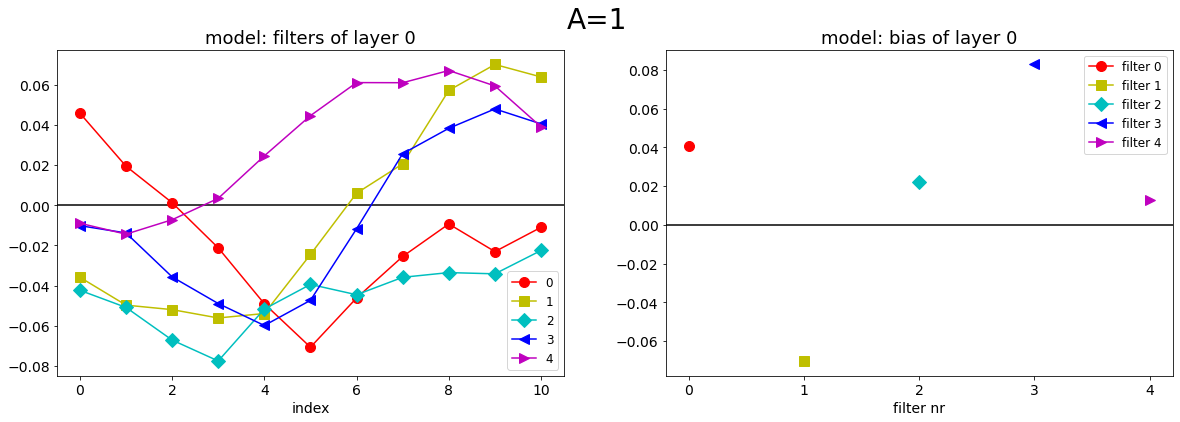

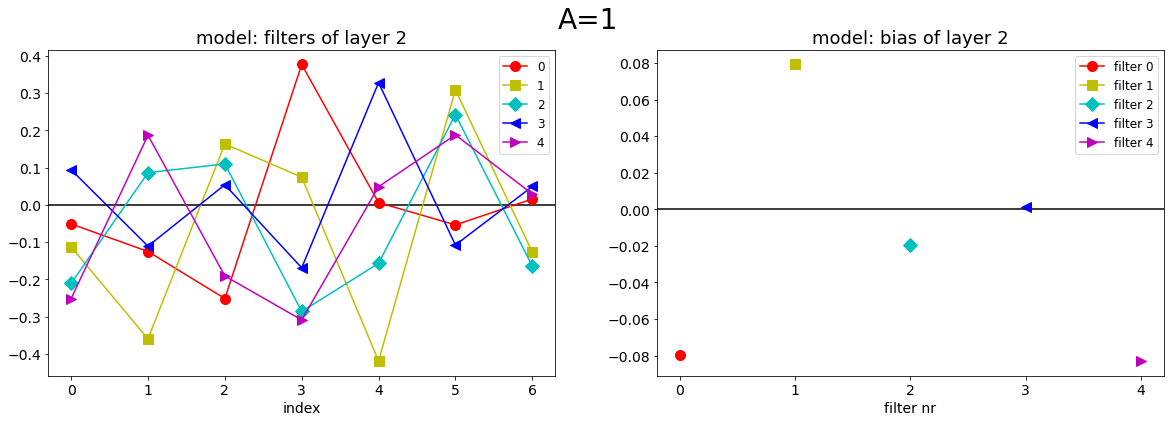

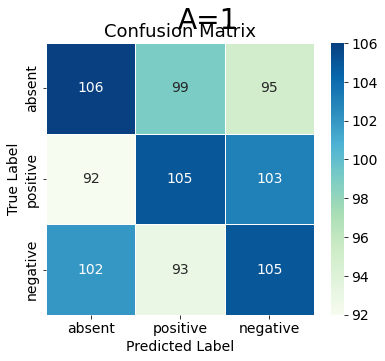

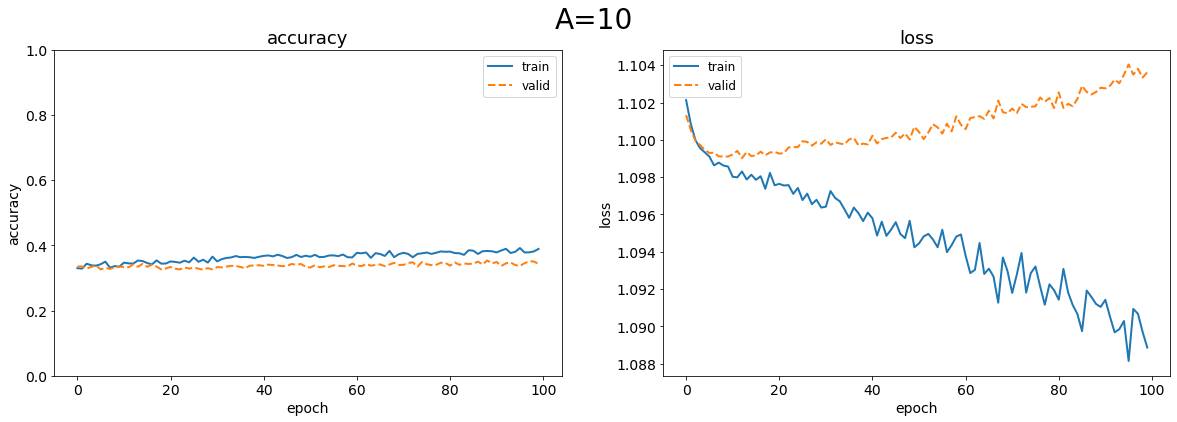

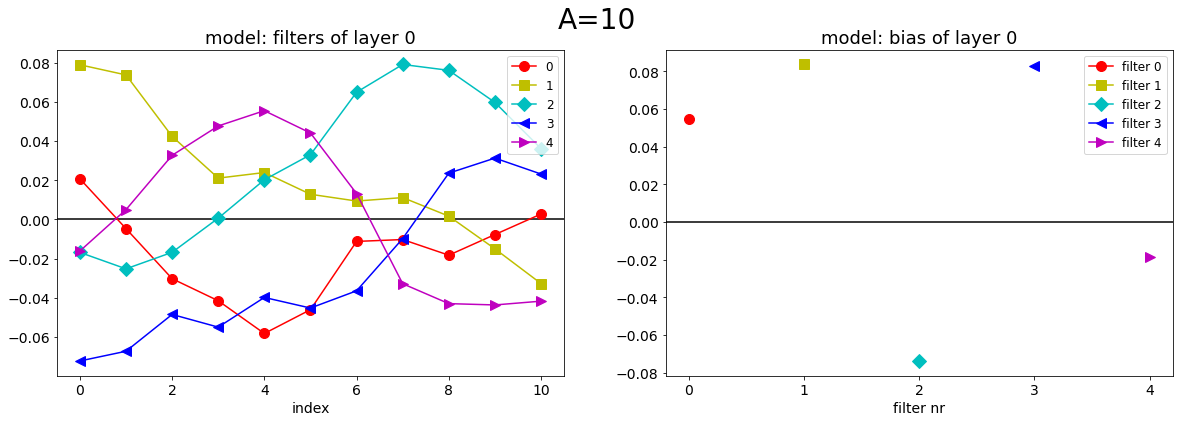

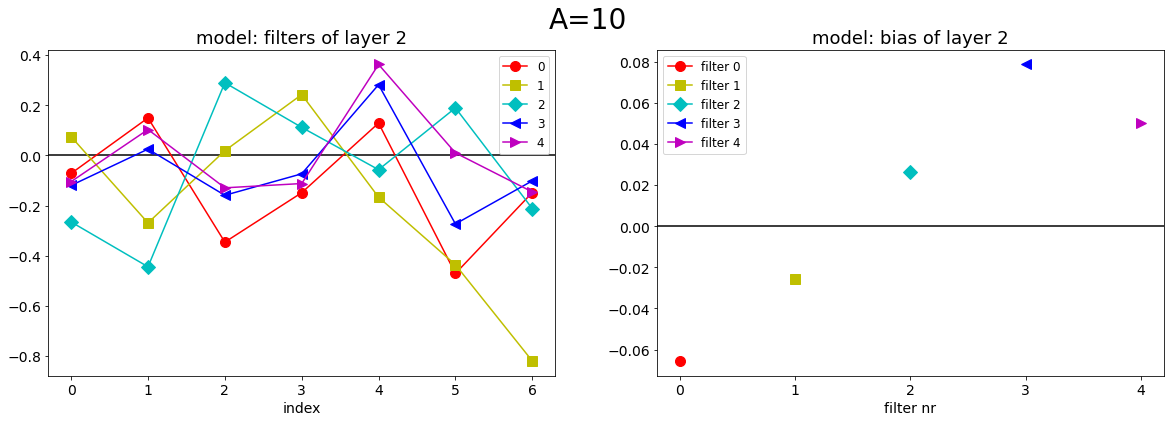

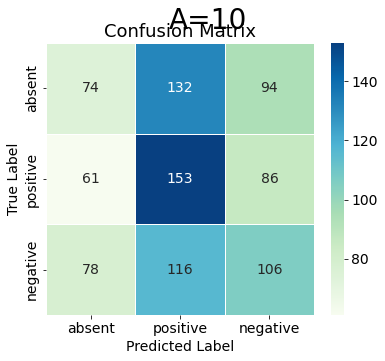

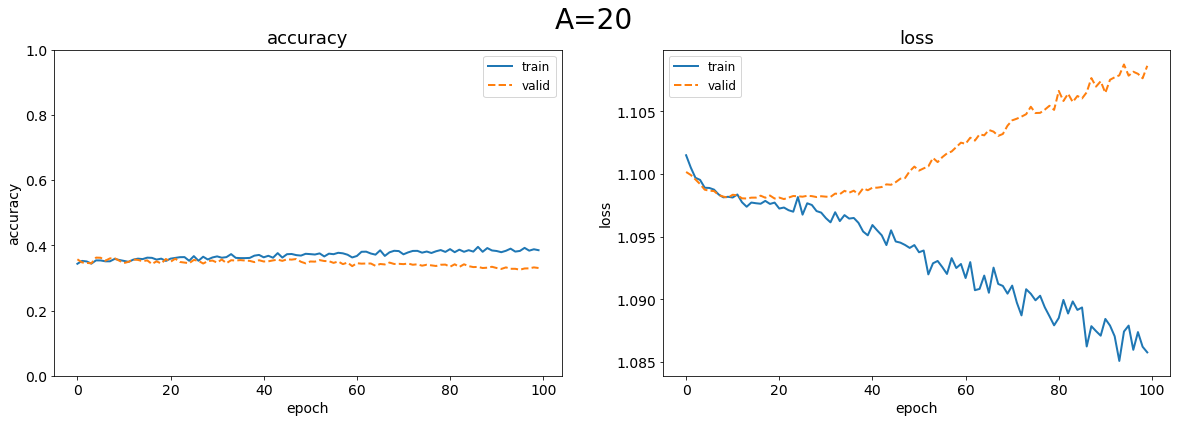

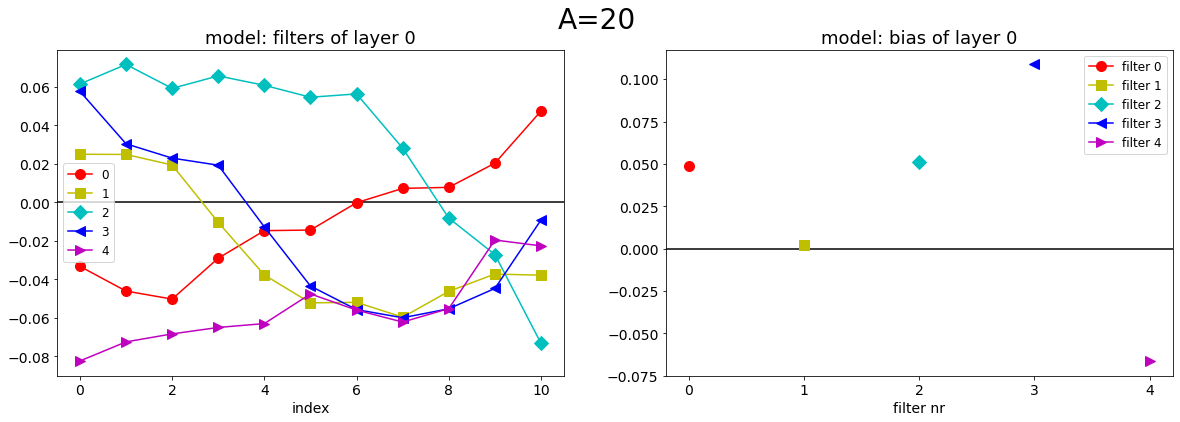

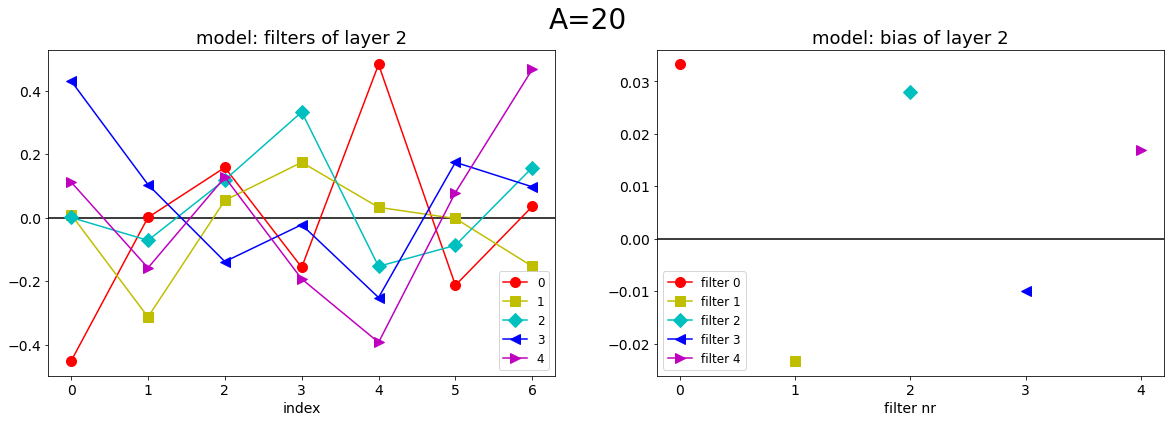

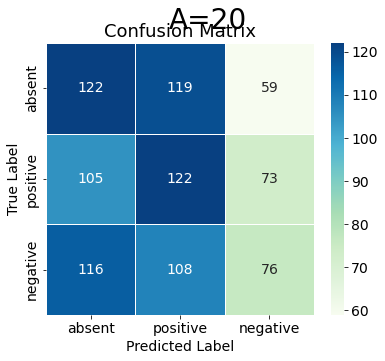

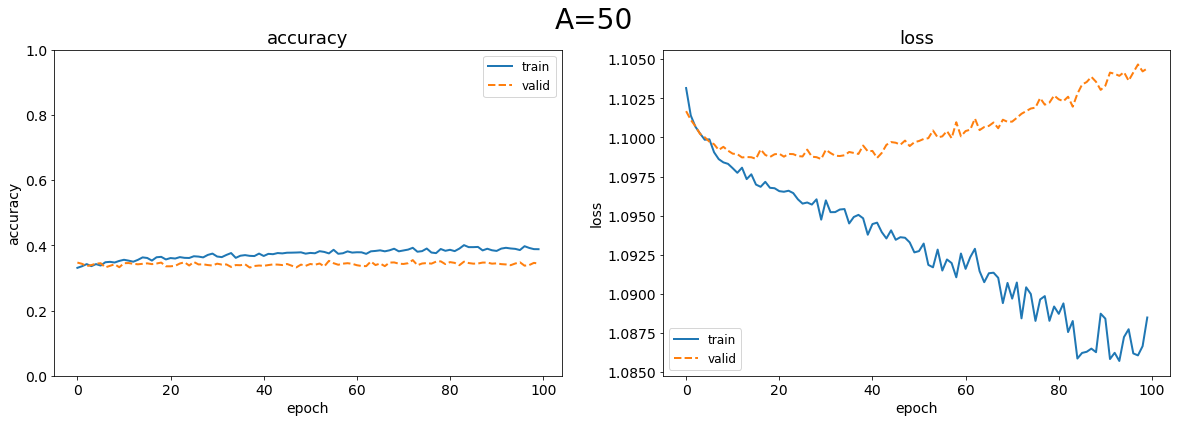

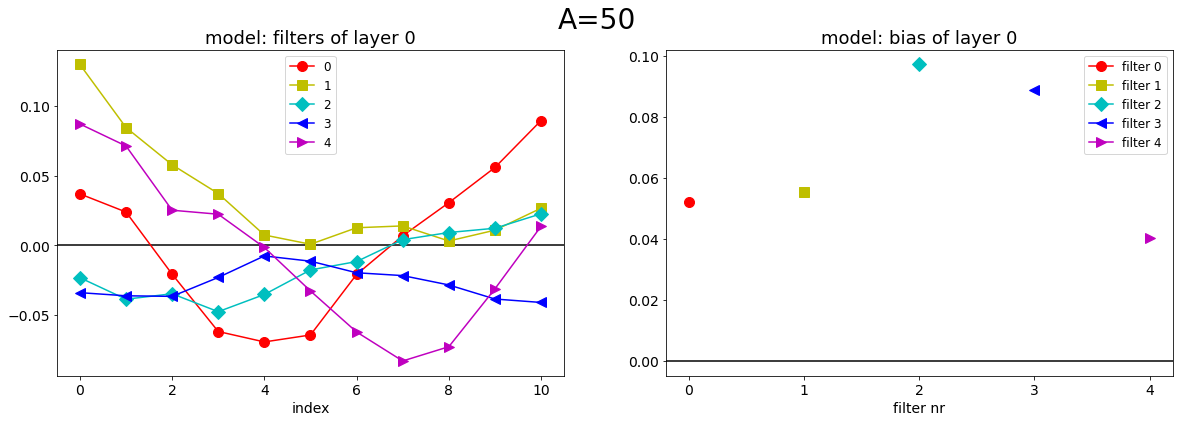

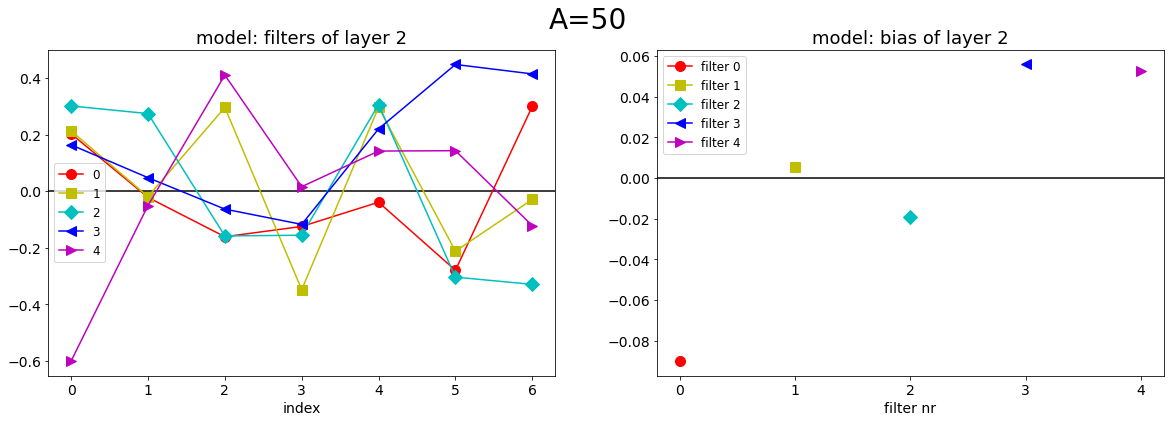

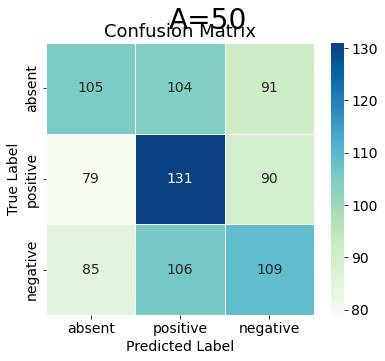

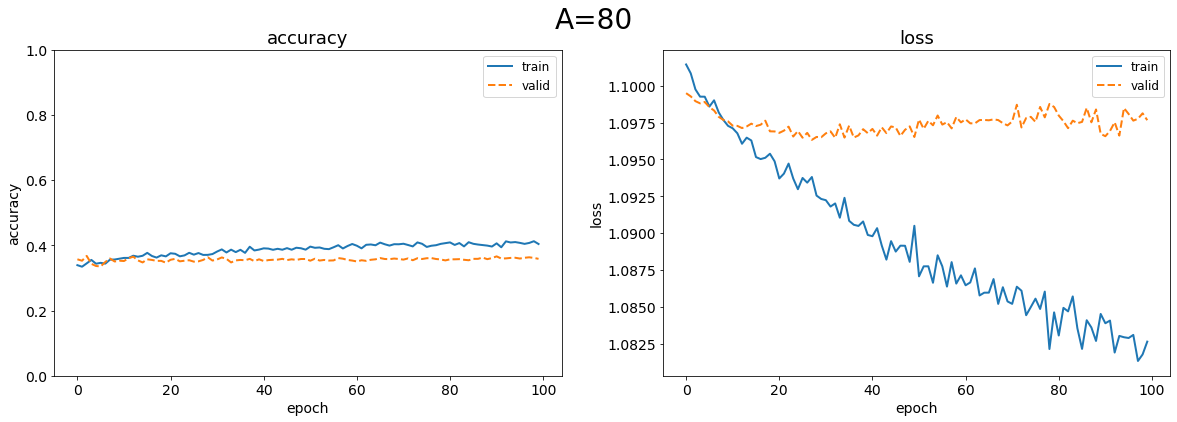

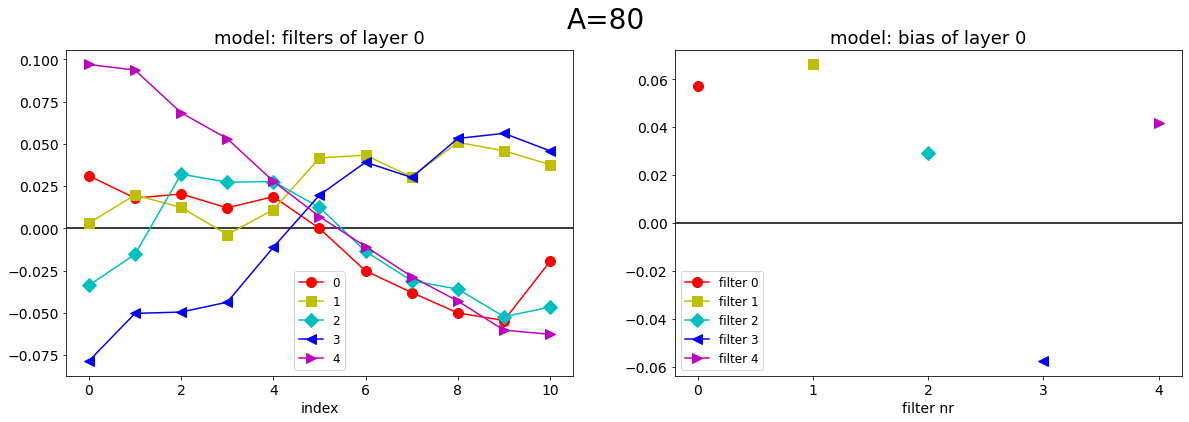

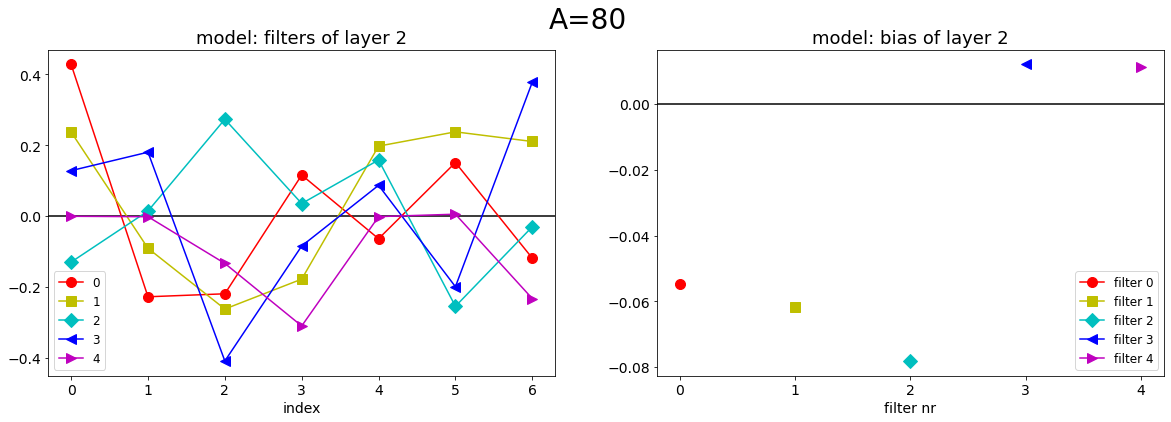

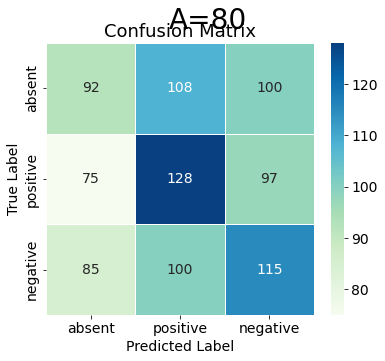

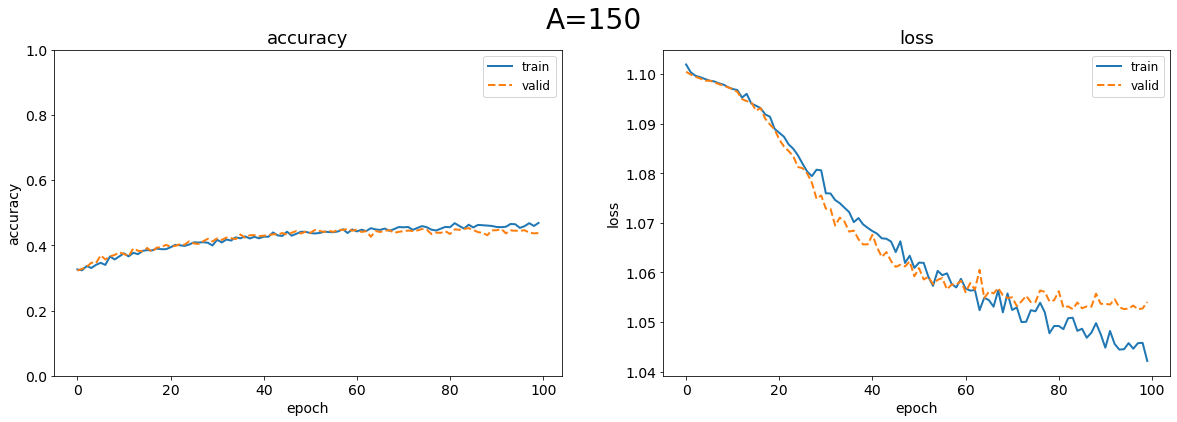

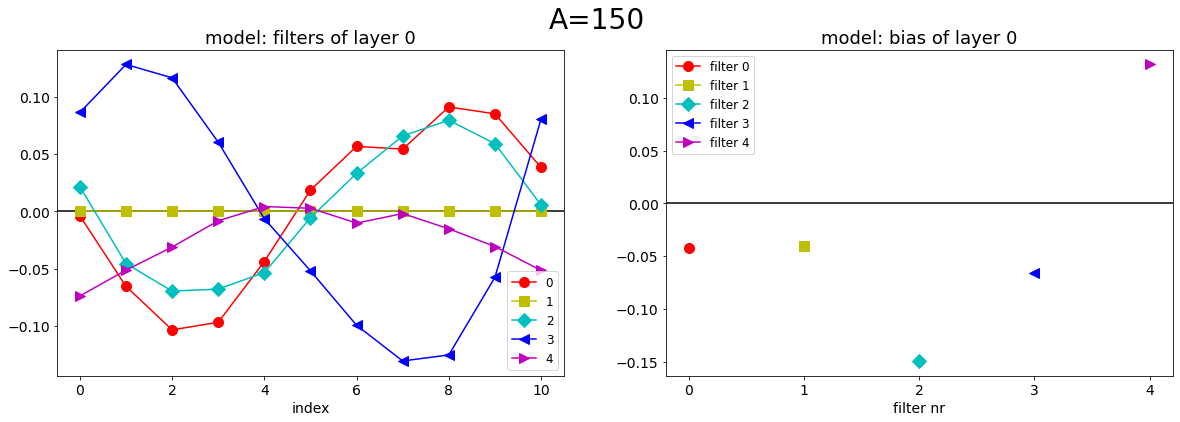

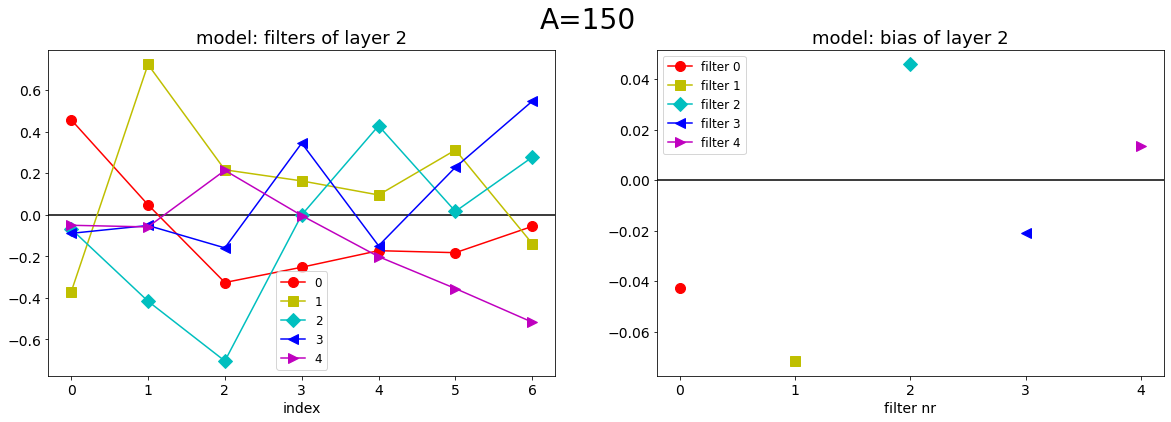

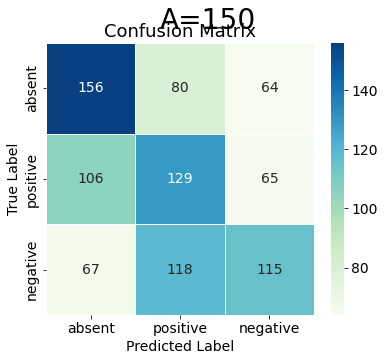

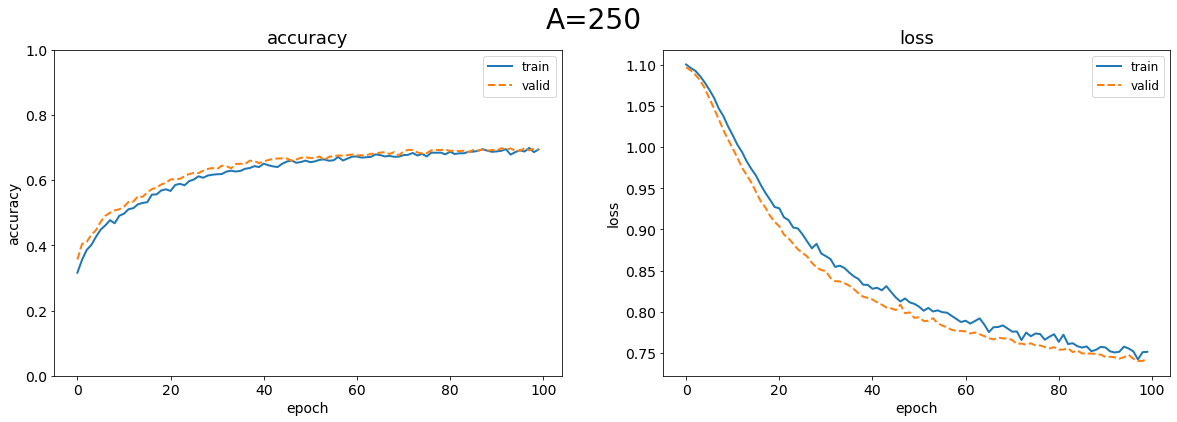

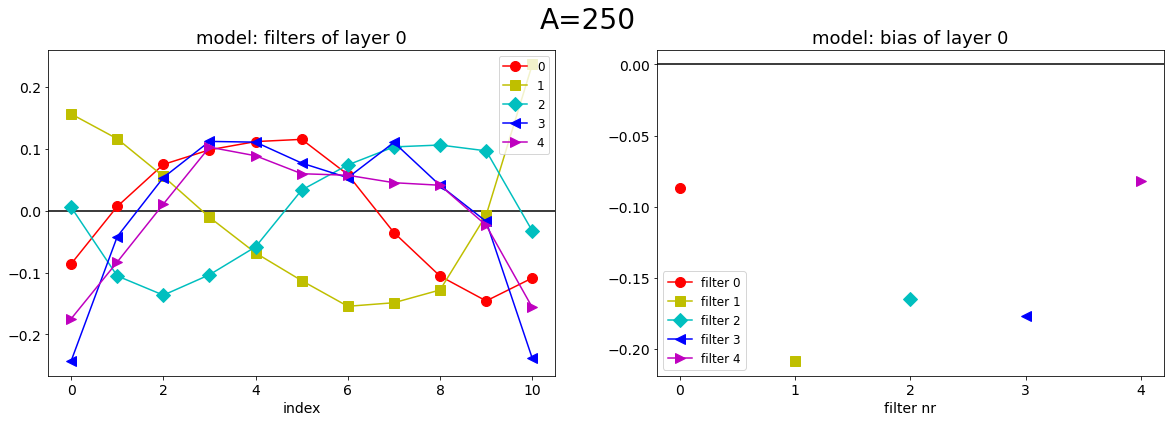

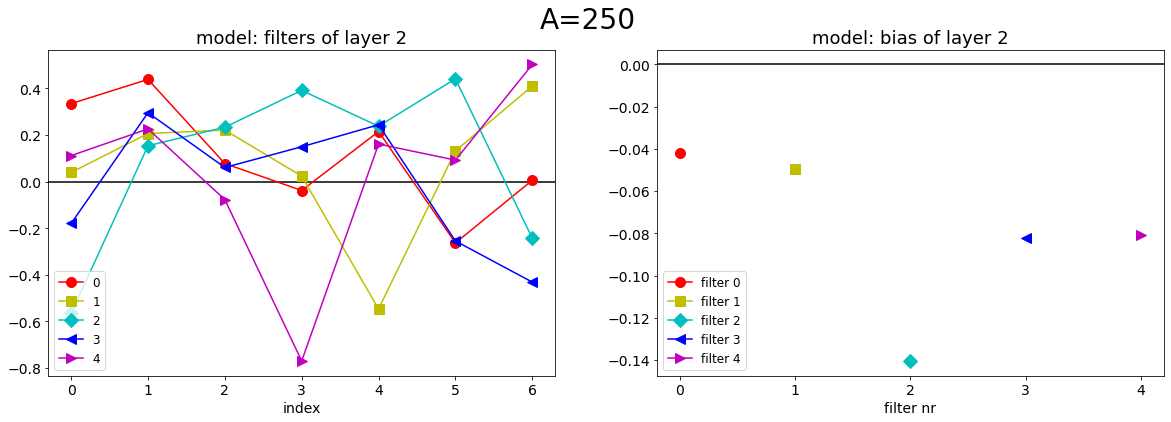

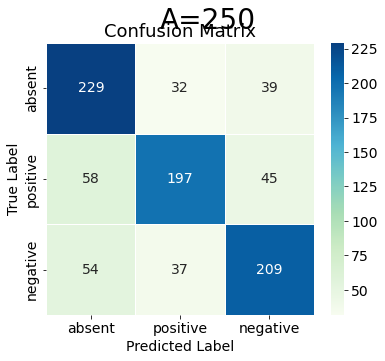

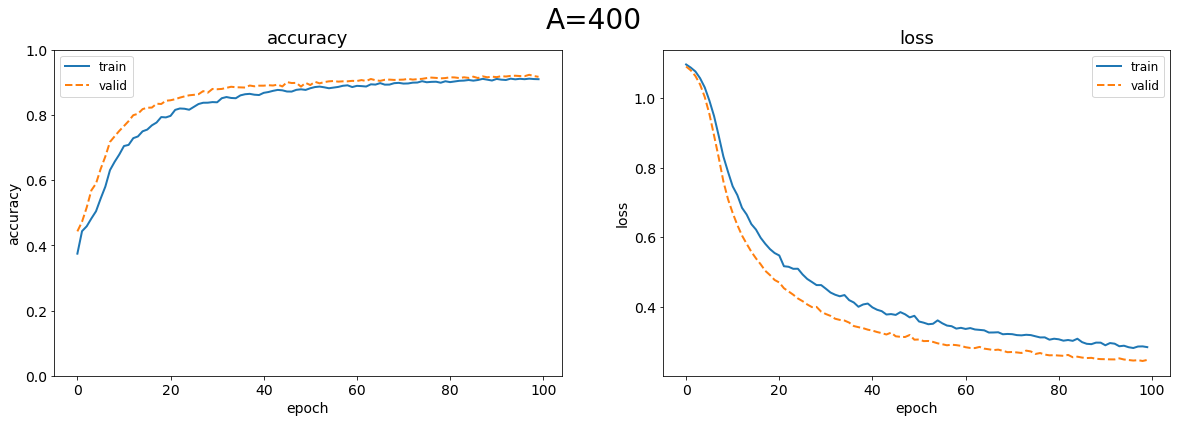

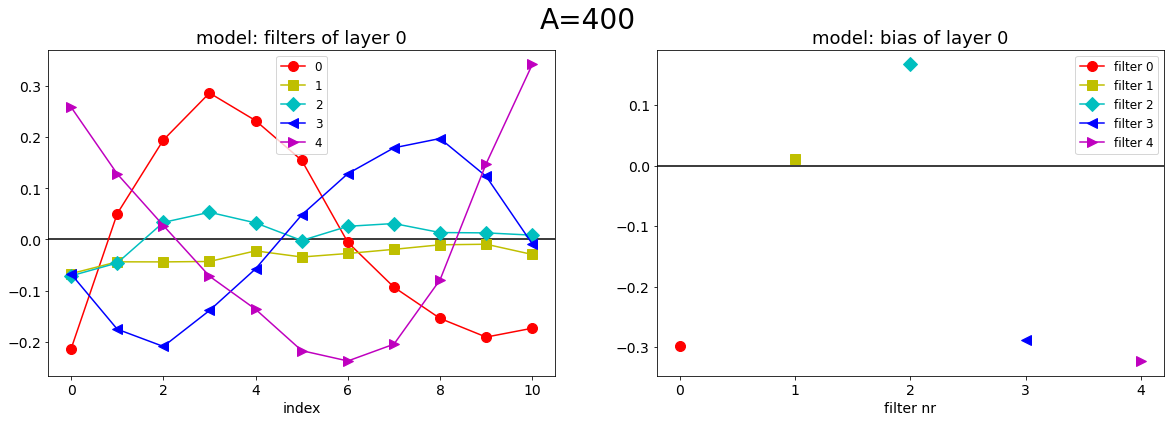

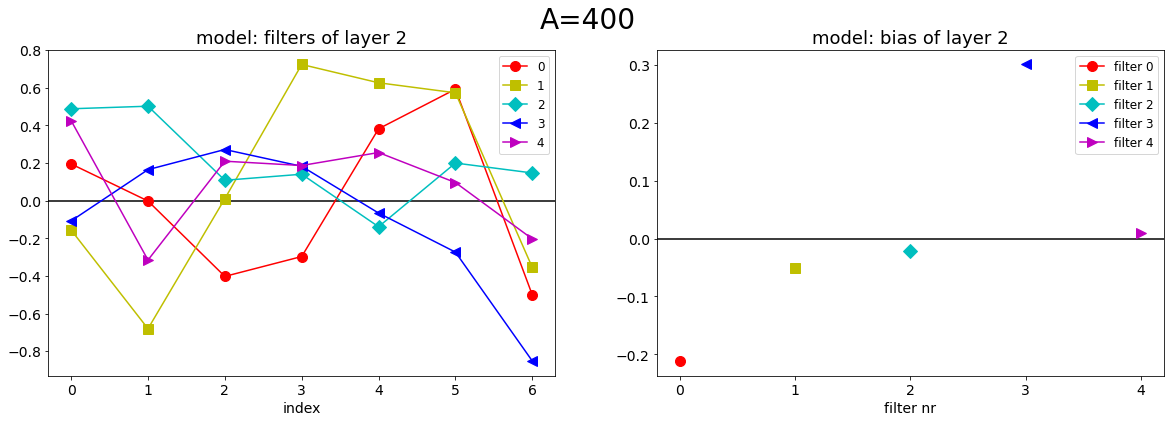

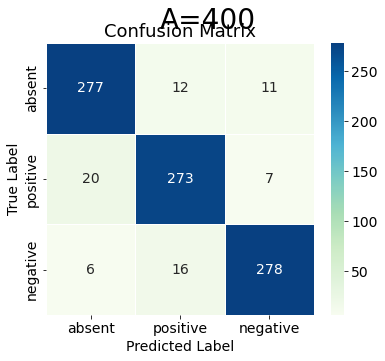

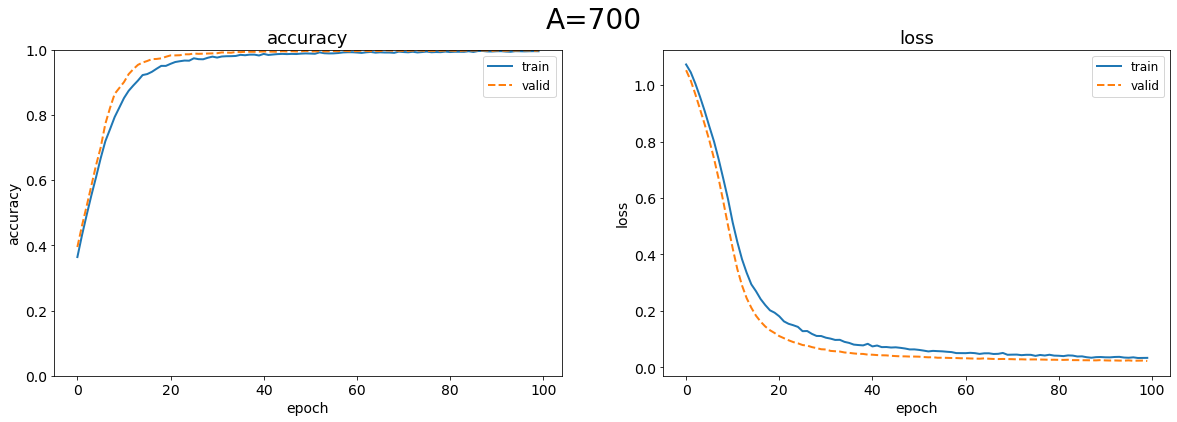

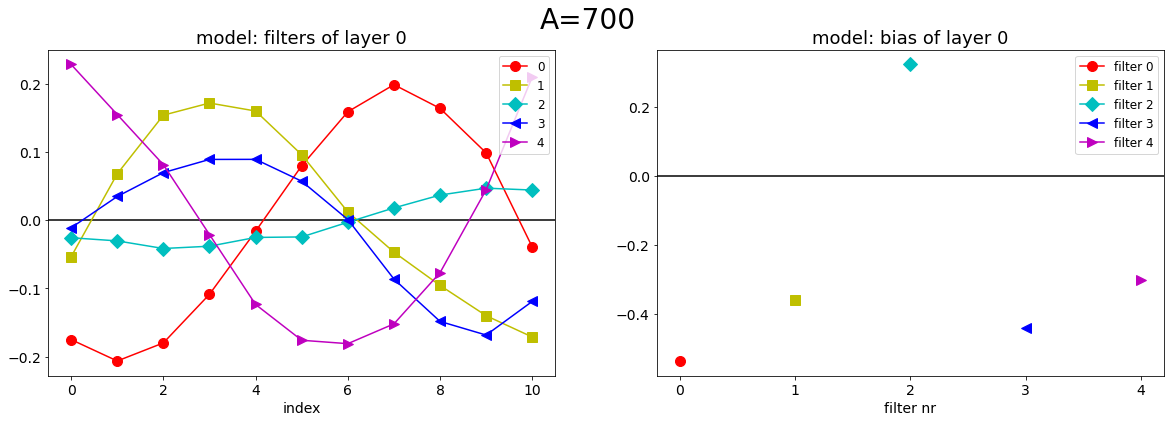

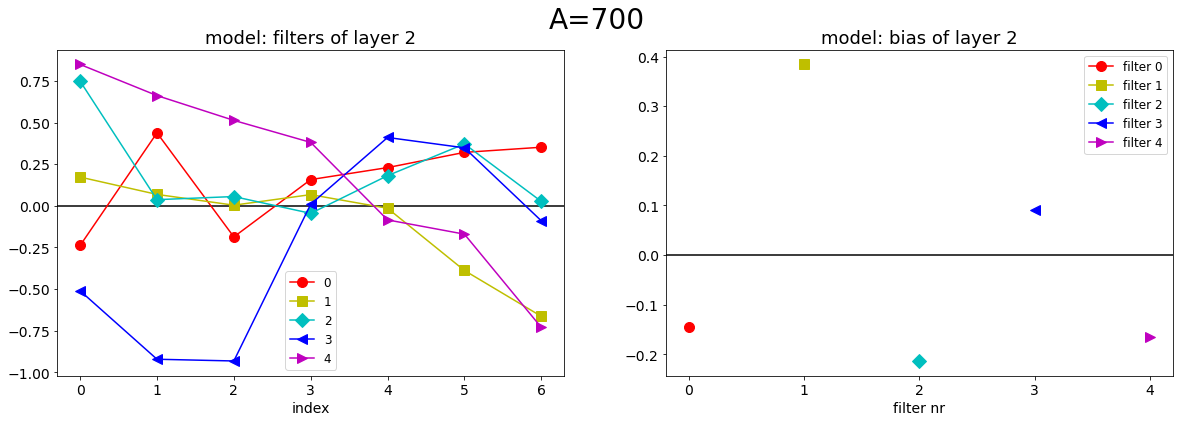

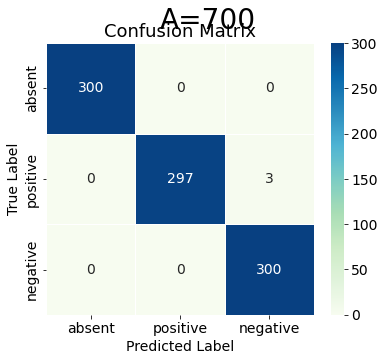

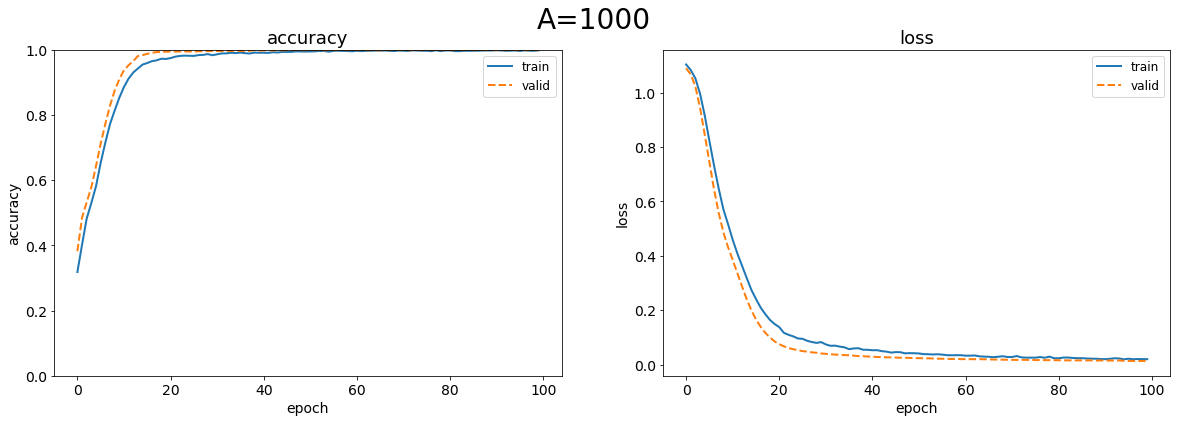

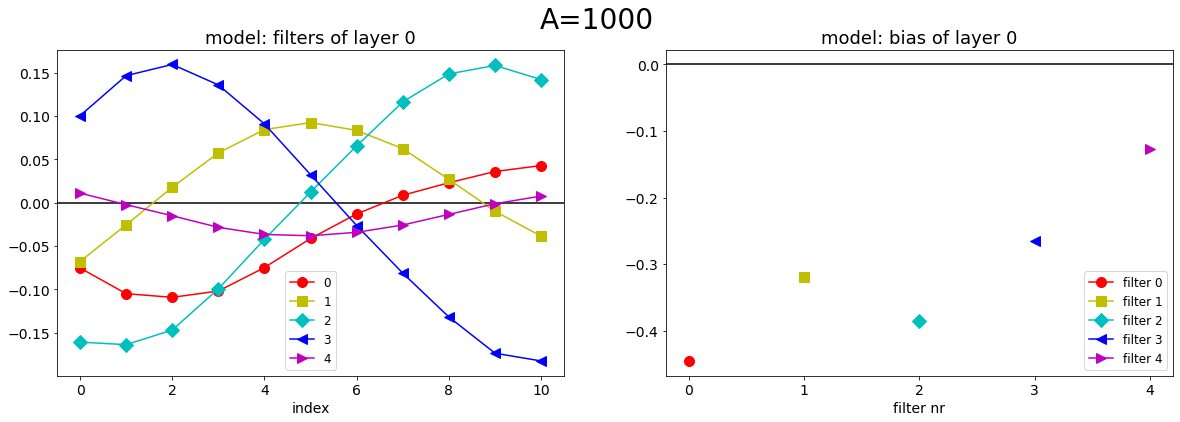

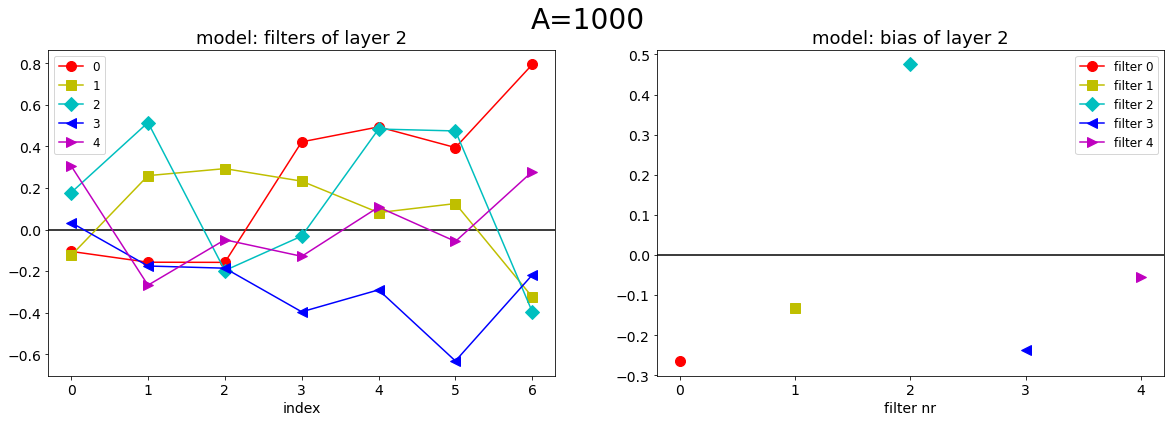

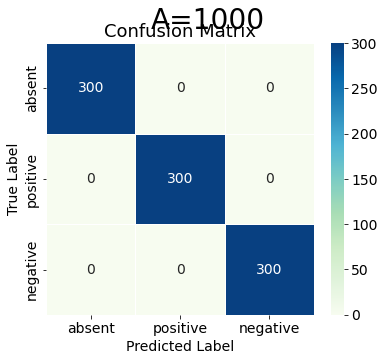

In [ ]:
for i, (fit, model) in enumerate(zip(fits, models)):

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"A={A_list[i]}", fontsize=28)
    ax  = plot_utils.plot_history(fit, fig)
    plt.show()

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"A={A_list[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 0, fig=fig)
    plt.show()
    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"A={A_list[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 2, fig=fig)
    plt.show()

    fig = plt.figure(figsize=(6,5))
    fig.suptitle(f"A={A_list[i]}", fontsize=28)
    ax  = plot_utils.show_confusion_matrix(true=y_test_true[i], pred=y_test_pred[i], fig=fig)
    plt.show()
    

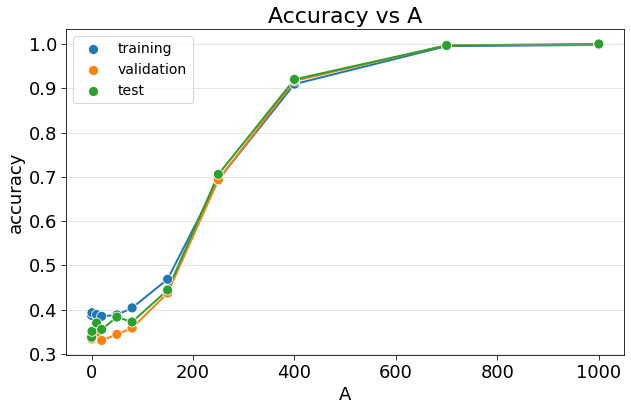

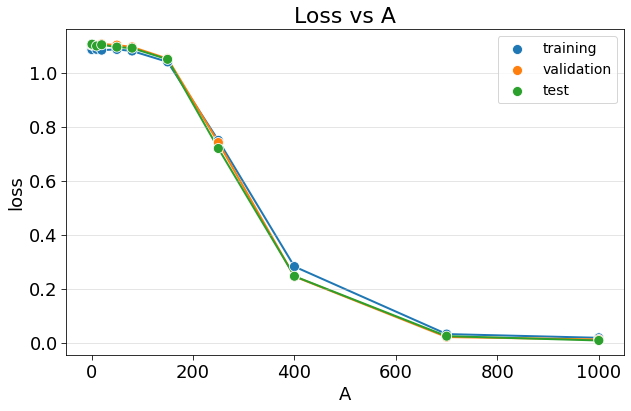

In [ ]:
final_train_acc = [fit.history["accuracy"][-1]     for fit in fits]
final_valid_acc = [fit.history["val_accuracy"][-1] for fit in fits]
test_acc        = [test[1]                 for test in tests]

final_train_loss = [fit.history["loss"][-1]     for fit in fits]
final_valid_loss = [fit.history["val_loss"][-1] for fit in fits]
test_loss        = [test[0]             for test in tests]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=final_train_acc,
    fig=fig,
    ax=ax,
    label="training",
    par_label="A",
    metric_label="accuracy",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Accuracy vs A",
    #ms=final_train_loss,
)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=final_valid_acc,
    fig=fig,
    ax=ax,
    label="validation",
    par_label="A",
    metric_label="accuracy",
    color="tab:orange",
    lw=2,
    ls="-",
    title="Accuracy vs A",
    #ms=final_valid_loss,
)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=test_acc,
    fig=fig,
    ax=ax,
    label="test",
    par_label="A",
    metric_label="accuracy",
    color="tab:green",
    lw=2,
    ls="-",
    title="Accuracy vs A",
    #ms=test_loss,
)

ax.set_axisbelow(True)
ax.grid("y", "major", axis="y", alpha=0.4)

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=final_train_loss,
    fig=fig,
    ax=ax,
    label="training",
    par_label="A",
    metric_label="loss",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Loss vs A",
    #ms=final_train_acc,
)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=final_valid_loss,
    fig=fig,
    ax=ax,
    label="validation",
    par_label="A",
    metric_label="loss",
    color="tab:orange",
    lw=2,
    ls="-",
    title="Loss vs A",
    #ms=final_valid_acc,
)

ax = plot_utils.scatter_results(
    parameter=A_list,
    result=test_loss,
    fig=fig,
    ax=ax,
    label="test",
    par_label="A",
    metric_label="loss",
    color="tab:green",
    lw=2,
    ls="-",
    title="Loss vs A",
    #ms=test_acc,
)

ax.set_axisbelow(True)
ax.grid("y", "major", axis="y", alpha=0.4)

plt.show()

## Explore different $\lambda_{reg}$
Check if regularization may improve the performances by varying the parameter lambda (as
usual in magnitude: $0$, $10^{-5}$, $10^{-4}$, $10^{-3}$, etc.) of the L1 (LASSO) or of the L2 (Ridge)

In [ ]:
lambdas    = [0] +[10**(i) for i in range(-5, 5)]
A          = 400
fname_best = f"ts_L60_Z12_A{A}_DX50_bias5_N10000.dat" 

In [ ]:
# time series data parameters
L       = 60
Z       = 12
A       = 500
DX      = 50
bias    = 5
N       = 10000
n_class = 3  

train_test_frac  = 0.7
valid_train_frac = 0.3

N_train = int(N*train_test_frac*(1-valid_train_frac))
N_valid = int(N*train_test_frac*valid_train_frac)
N_test  = int(N*(1-train_test_frac))

train_idx = N_train
valid_idx = N_train+N_valid
test_idx  = N_train+N_test

# load data
x = np.loadtxt("DATA/x_"+fname_best, delimiter=" ",dtype=float)
# load categories
c = np.loadtxt("DATA/y_"+fname_best, dtype=int)
# build time grid
t_grid = np.arange(0, L*N).reshape(N, L)
# format labels from categories
y = np.zeros((N, n_class))
for i in range(N):
    y[i][c[i]] = 1

# data rescaling
x = standardize_all(x)

# split training validation test
x_train    = x[0:train_idx]
y_train    = y[0:train_idx]
x_val      = x[train_idx:valid_idx]
y_val      = y[train_idx:valid_idx]
x_test     = x[valid_idx:test_idx]
y_test     = y[valid_idx:test_idx]
    
x_train = keras_reshape(x_train)
x_val   = keras_reshape(x_val)

input_shape = (L, 1)

In [ ]:
# L1 REF

NF    = 5 # number of filters

ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

BATCH_SIZE = 250
EPOCHS     = 100

fits_l1   = []
tests_l1  = []
models_l1 = []
y_test_true_l1 = []
y_test_pred_l1 = []

for lambda_ in lambdas:
    
    reg = regularizers.l1(lambda_)

    model = Sequential(name="carlo")
    model.add(
        Conv1D(
            filters            = NF, 
            kernel_size        = 11, 
            kernel_initializer = ini,
            kernel_regularizer = reg,
            activation         = 'relu',
            input_shape        = input_shape
        )
    )
    model.add(AveragePooling1D(5)) # average of 5 values
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax'))

    opt = tf.keras.optimizers='Adam'

    # compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

    fit = model.fit(
        x_train, 
        y_train, 
        batch_size      = BATCH_SIZE,
        epochs          = EPOCHS, 
        validation_data = (x_val, y_val),
        verbose         = 0, 
        shuffle         = True
    )

    test = model.evaluate(
        x_test, y_test,
        batch_size      = BATCH_SIZE,
        verbose         = 0,
    )

    fits_l1.append(fit)
    tests_l1.append(test)
    models_l1.append(model)

    y_pred_test = model.predict(x_test)
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)

    y_test_true_l1.append(max_y_test)
    y_test_pred_l1.append(max_y_pred_test)


In [ ]:
# L2 REG

NF    = 5 # number of filters

ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

BATCH_SIZE = 250
EPOCHS     = 100

fits_l2   = []
tests_l2  = []
models_l2 = []
y_test_true_l2 = []
y_test_pred_l2 = []

for lambda_ in lambdas:
    
    reg = regularizers.l1(lambda_)

    model = Sequential(name="carlo")
    model.add(
        Conv1D(
            filters            = NF, 
            kernel_size        = 11, 
            kernel_initializer = ini,
            kernel_regularizer = reg,
            activation         = 'relu',
            input_shape        = input_shape
        )
    )
    model.add(AveragePooling1D(5)) # average of 5 values
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax'))

    opt = tf.keras.optimizers='Adam'

    # compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

    fit = model.fit(
        x_train, 
        y_train, 
        batch_size      = BATCH_SIZE,
        epochs          = EPOCHS, 
        validation_data = (x_val, y_val),
        verbose         = 0, 
        shuffle         = True
    )

    test = model.evaluate(
        x_test, y_test,
        batch_size      = BATCH_SIZE,
        verbose         = 0,
    )

    fits_l2.append(fit)
    tests_l2.append(test)
    models_l2.append(model)

    y_pred_test = model.predict(x_test)
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)

    y_test_true_l2.append(max_y_test)
    y_test_pred_l2.append(max_y_pred_test)


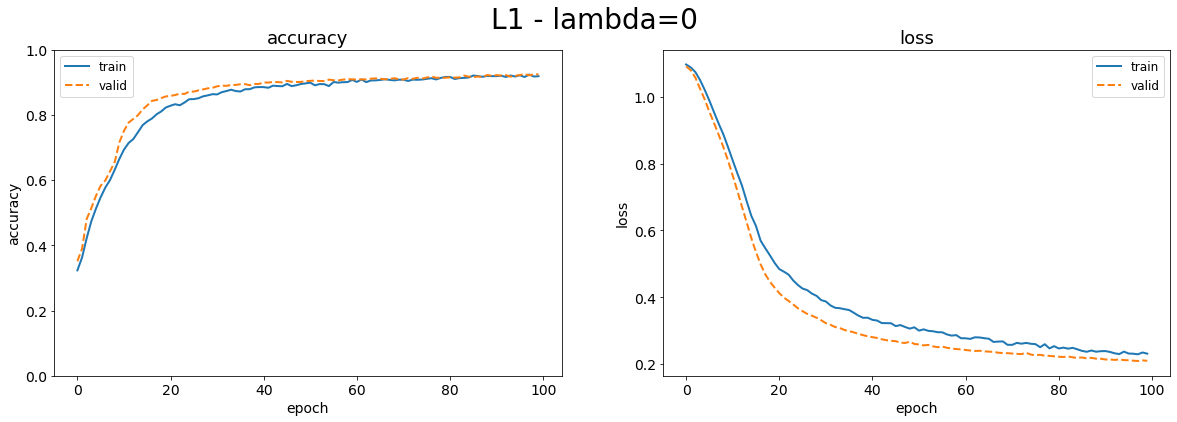

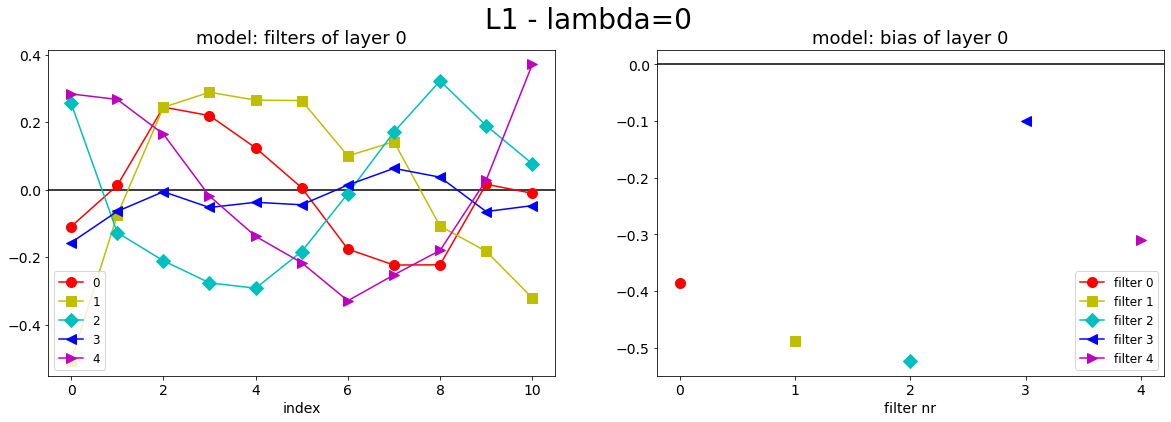

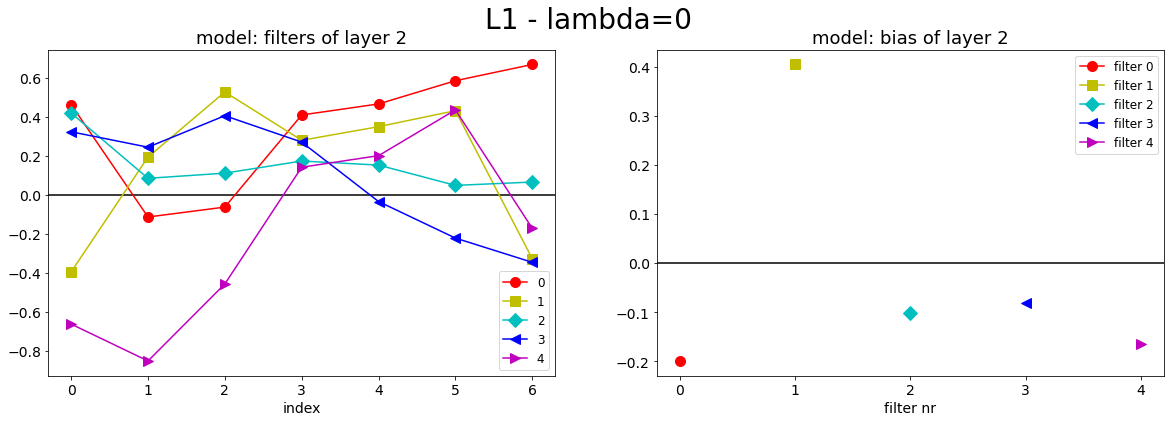

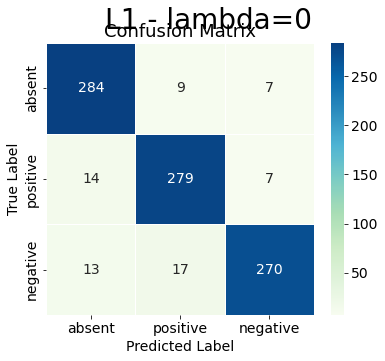

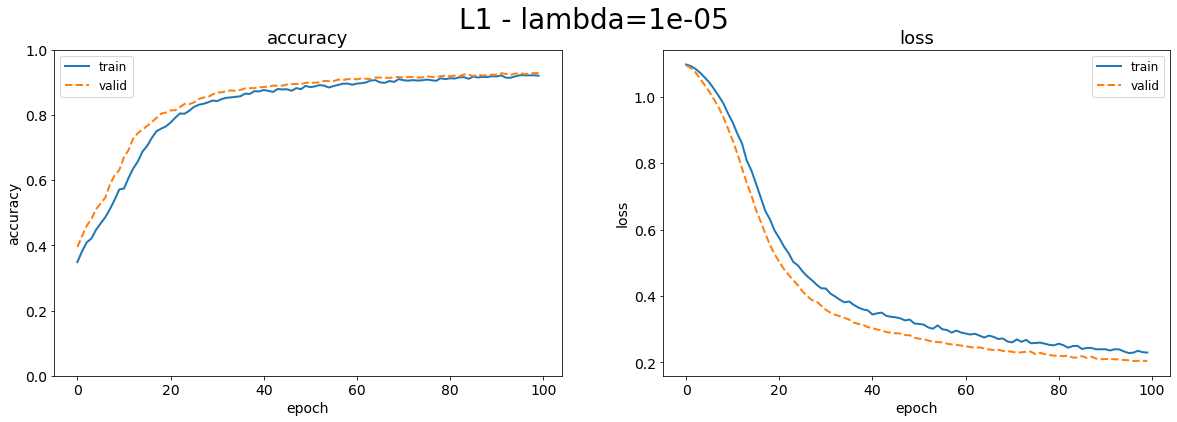

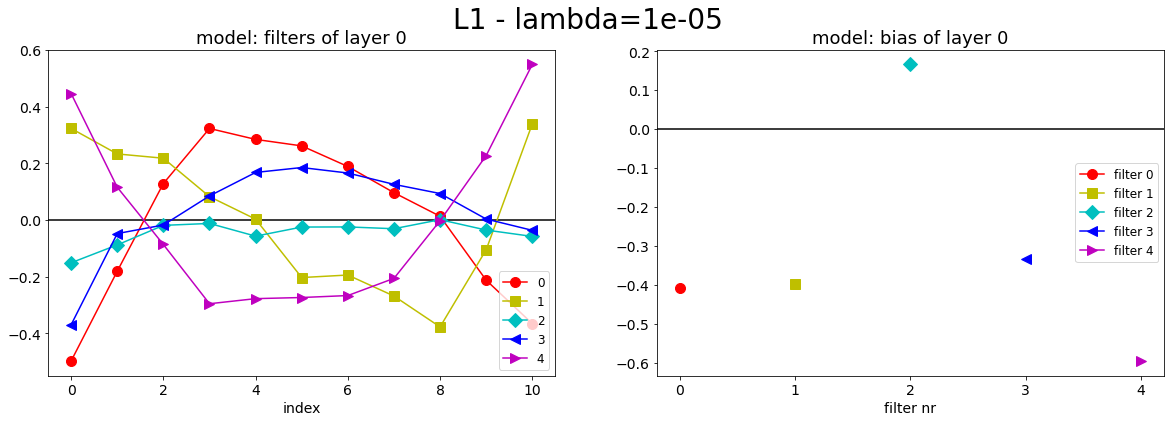

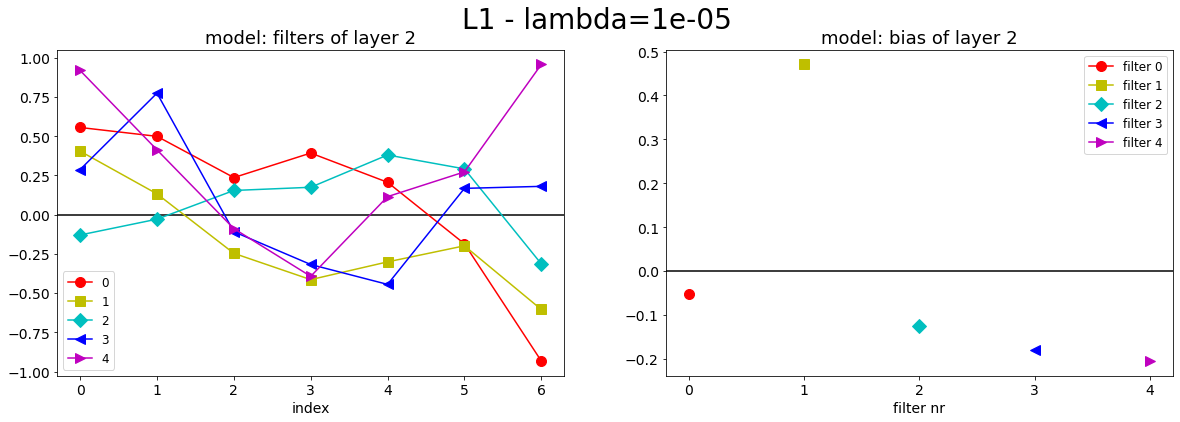

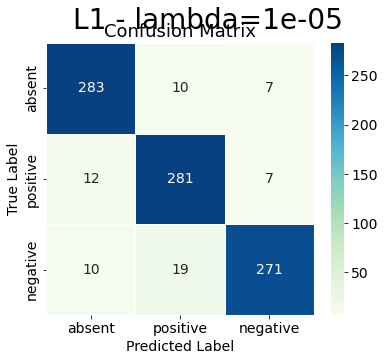

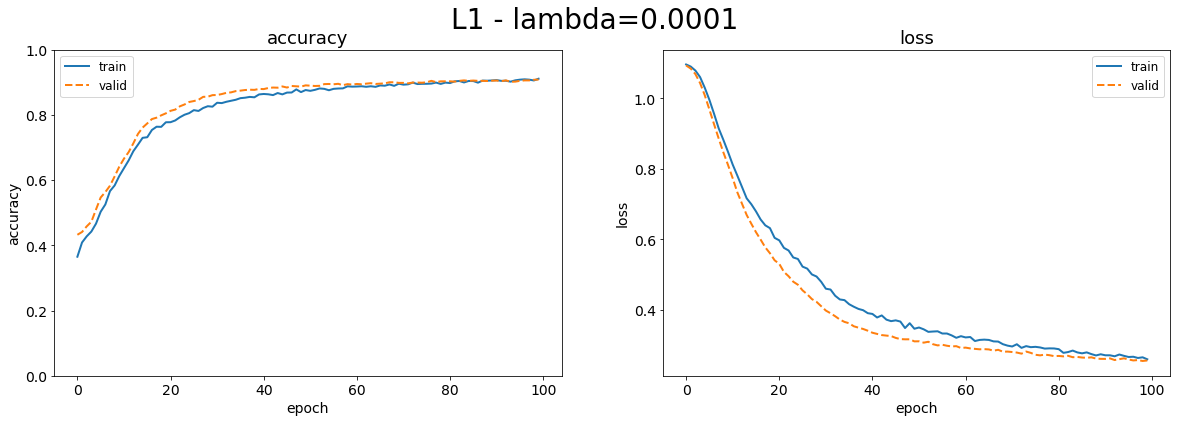

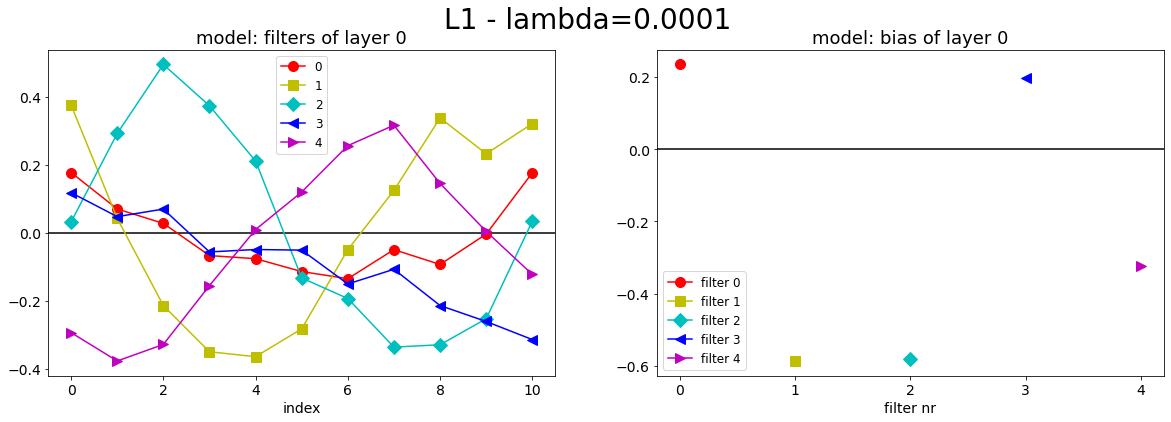

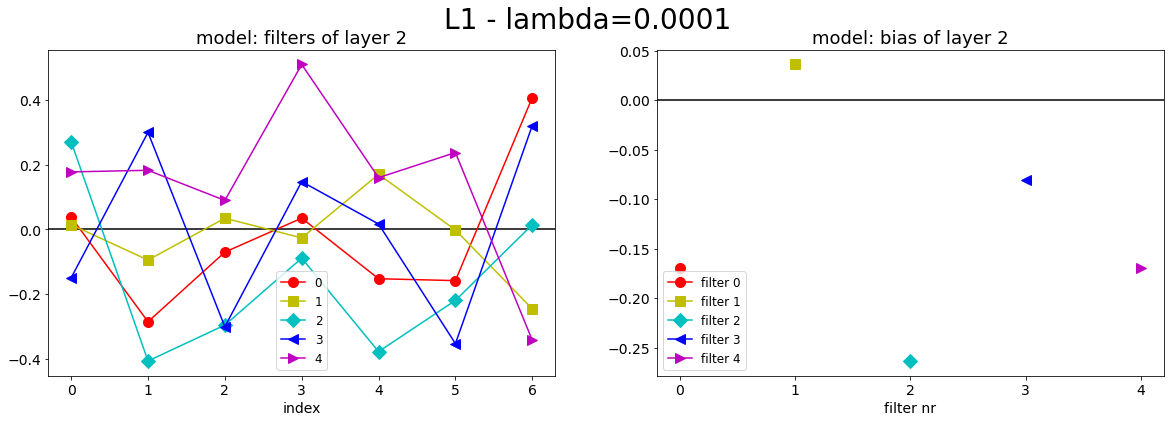

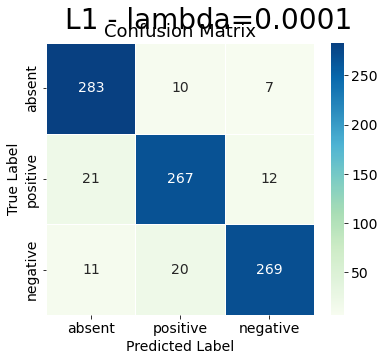

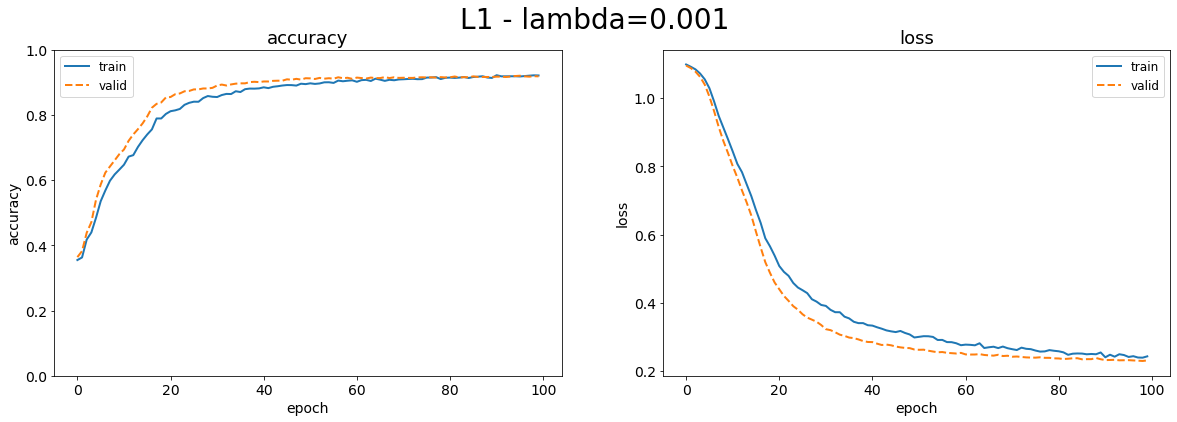

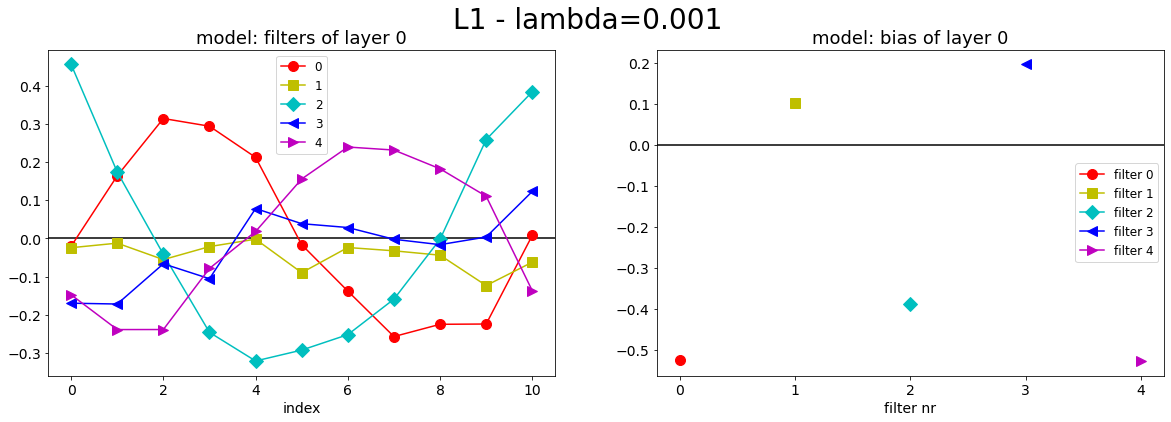

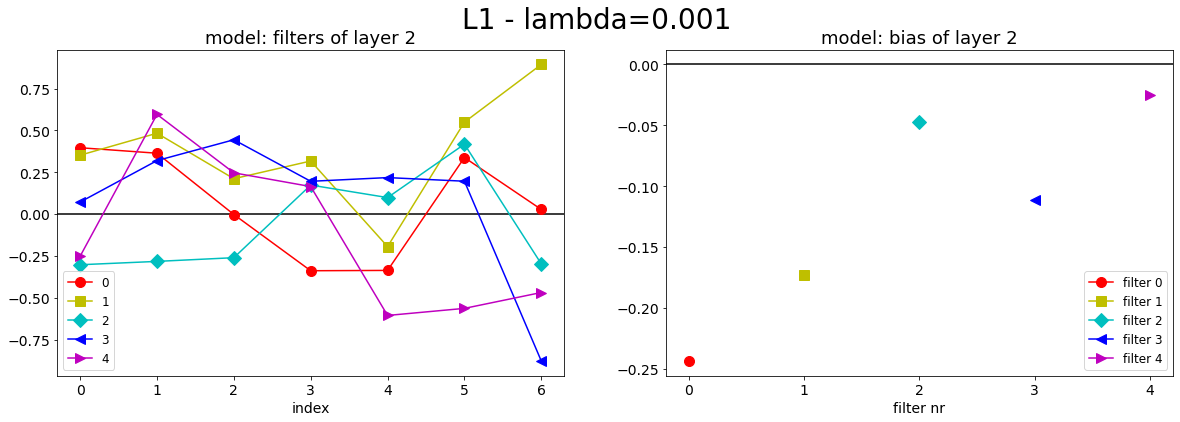

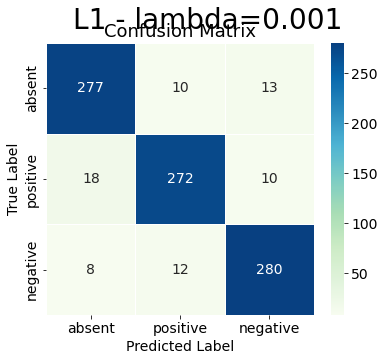

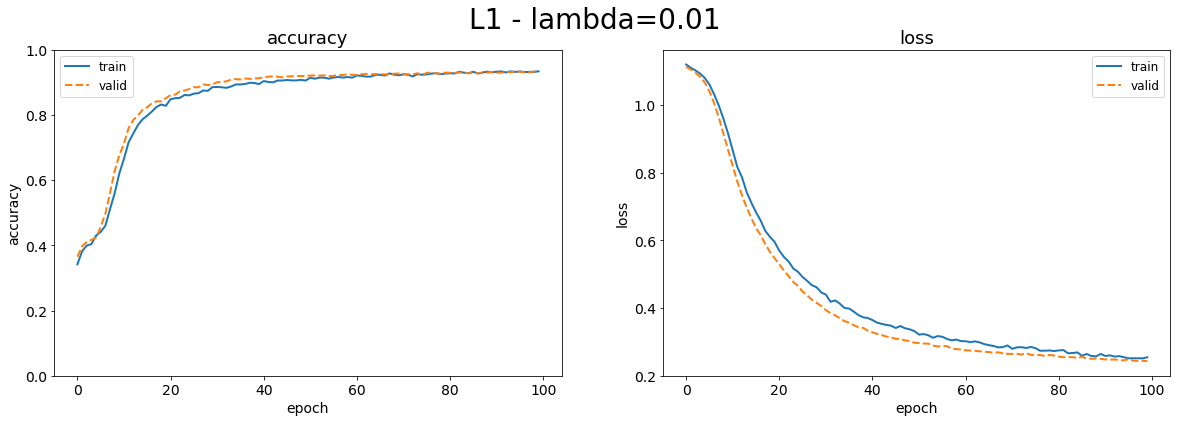

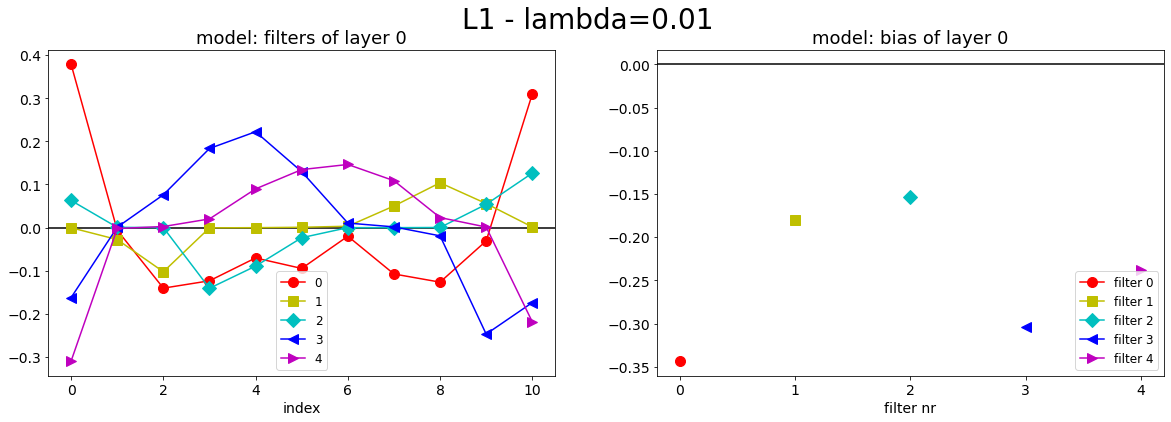

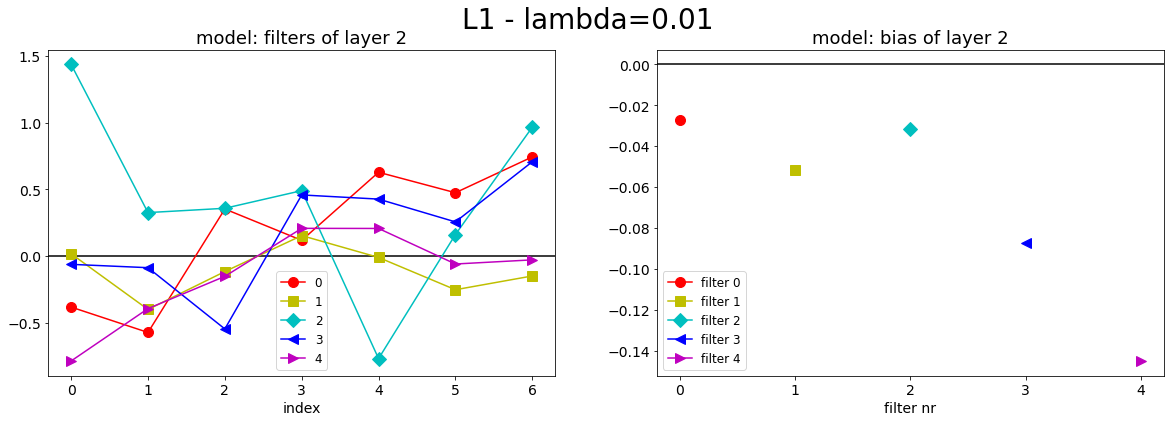

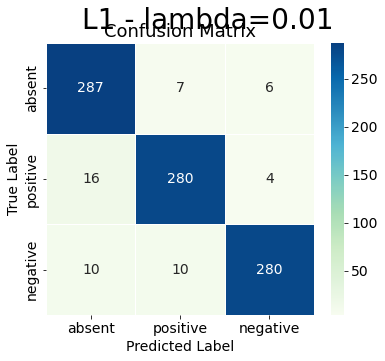

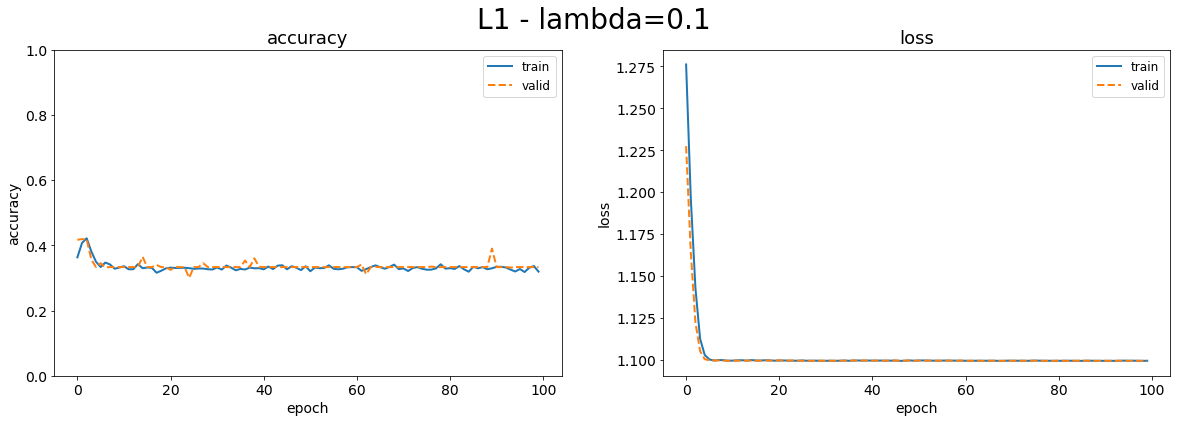

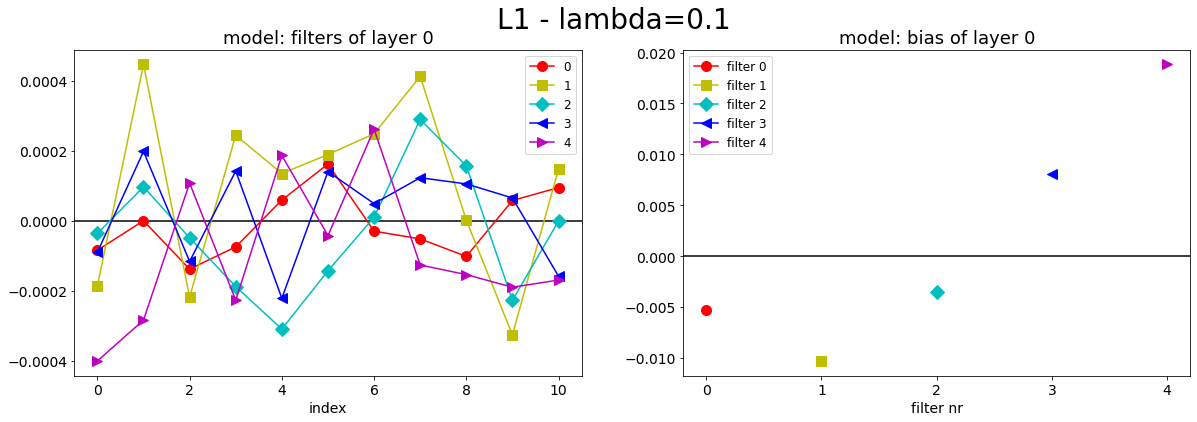

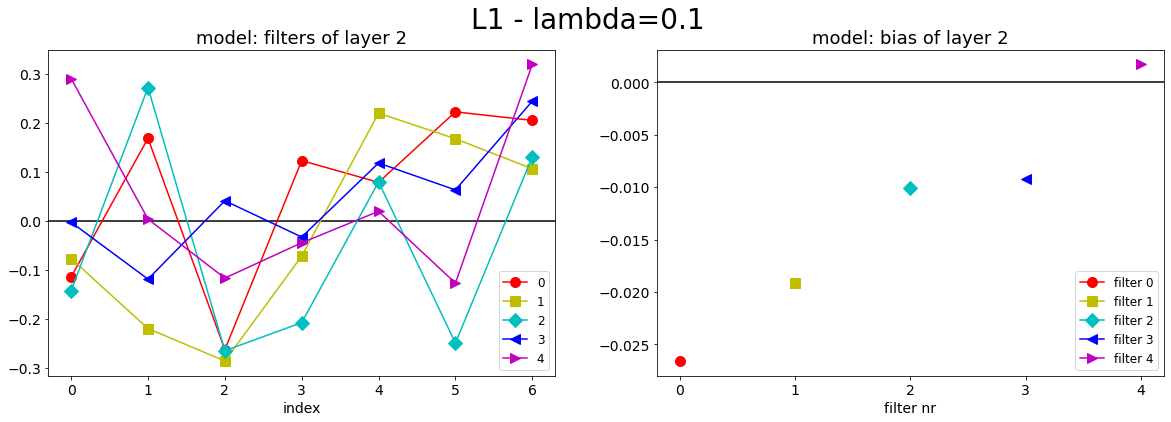

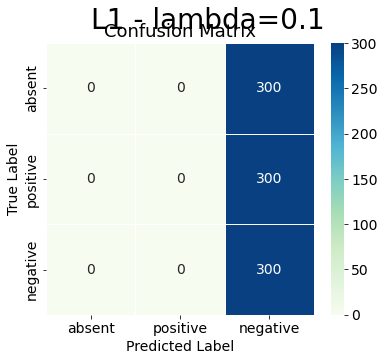

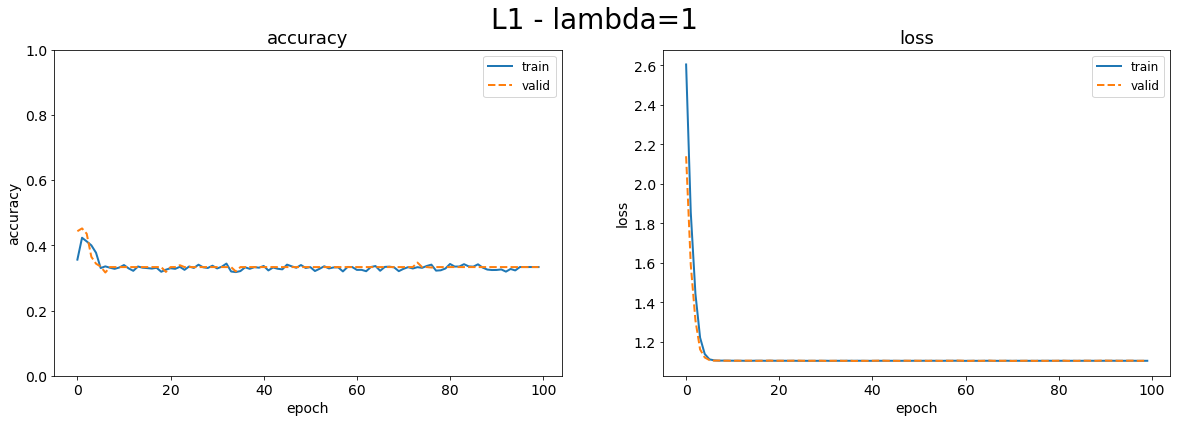

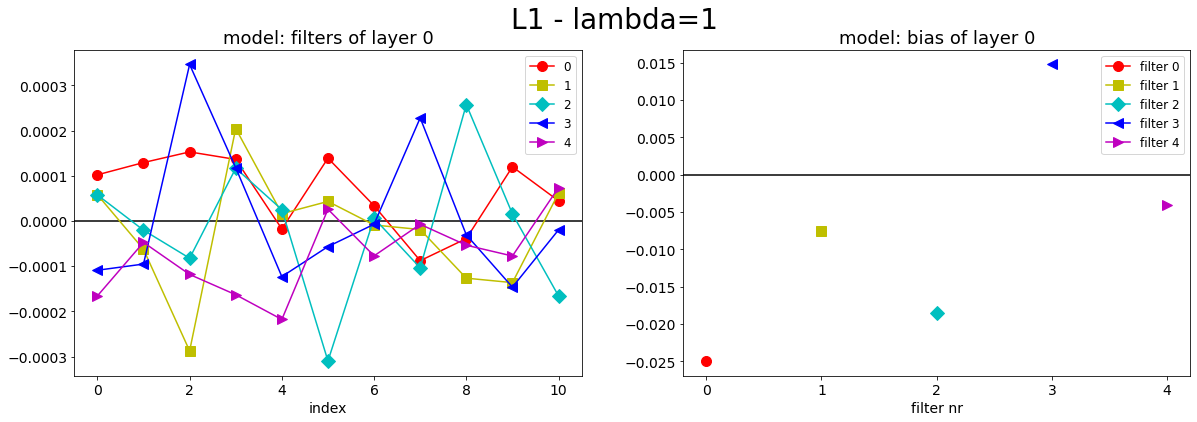

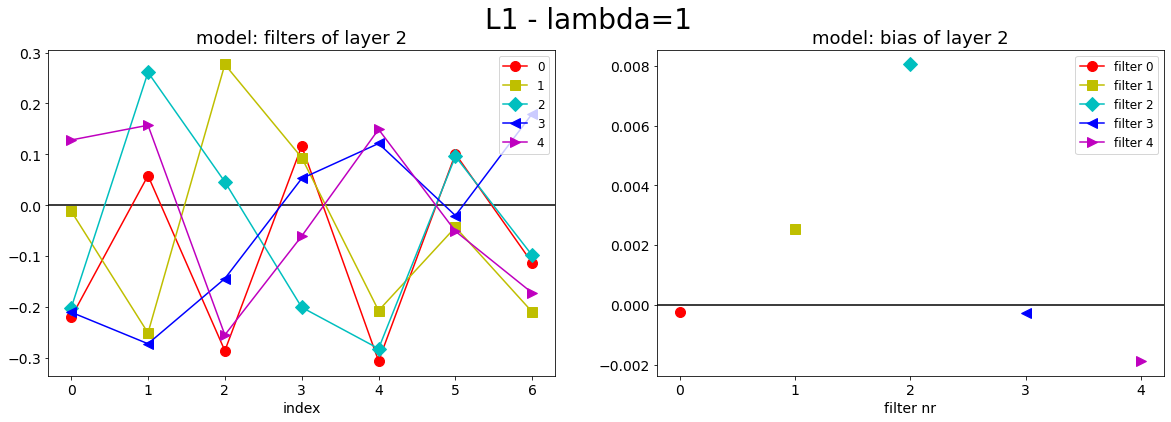

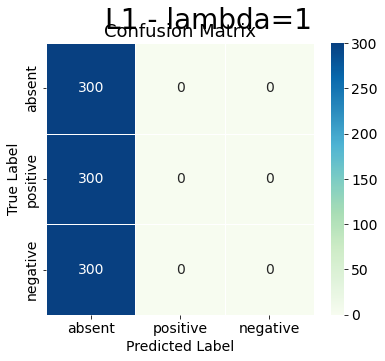

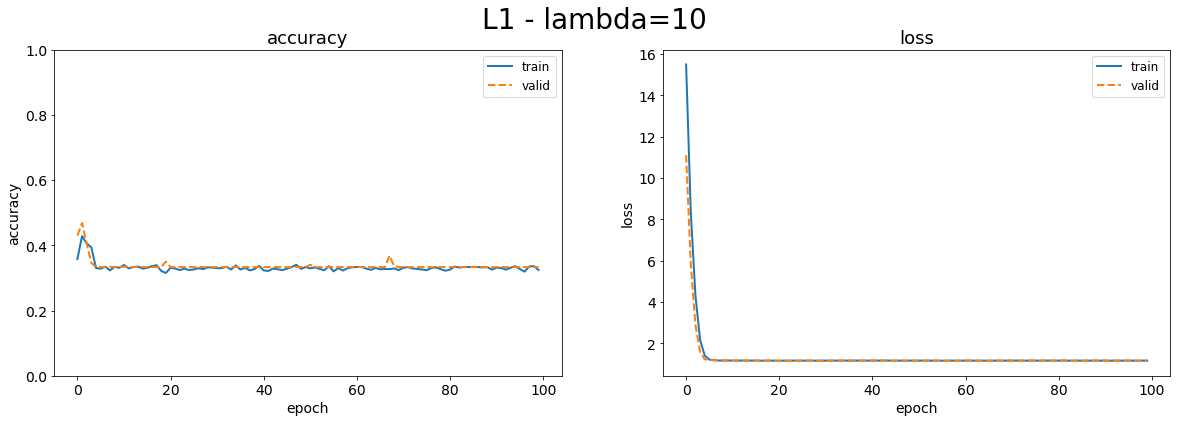

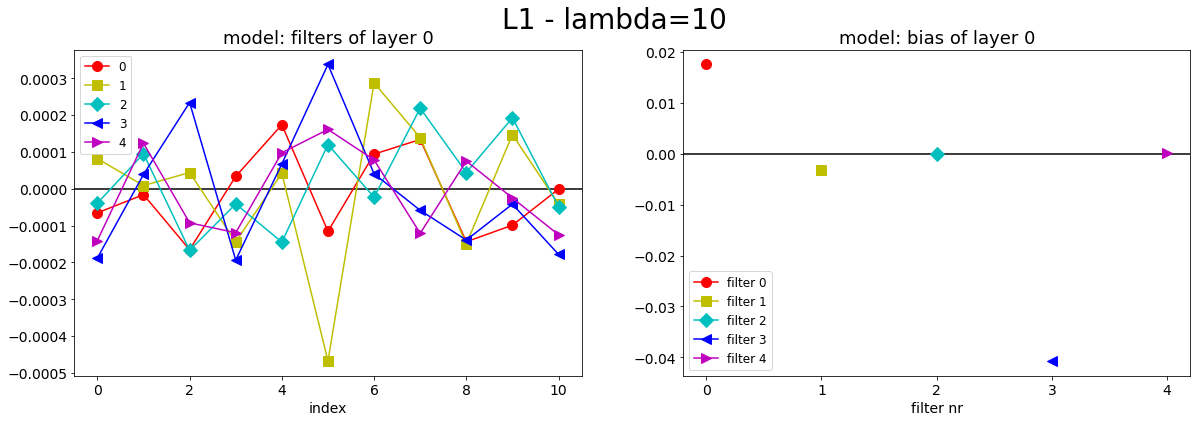

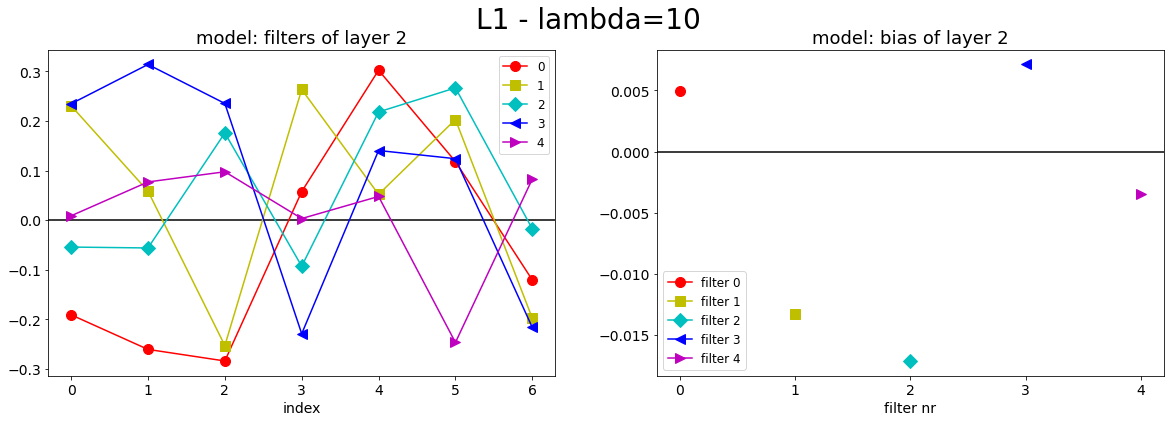

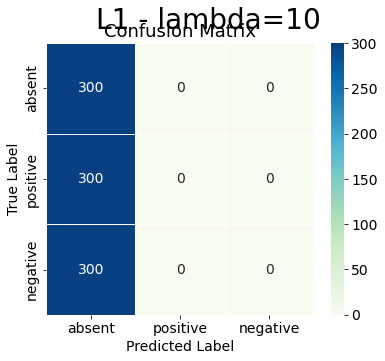

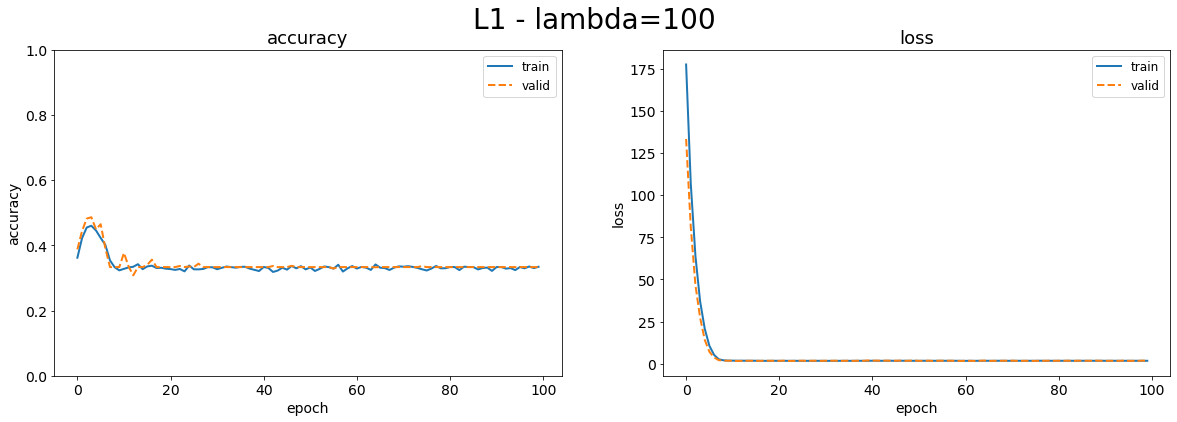

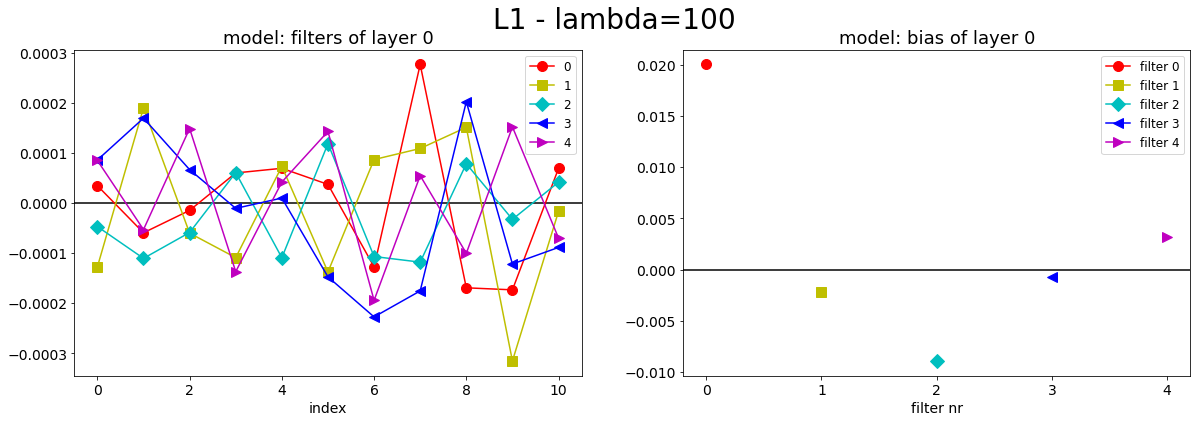

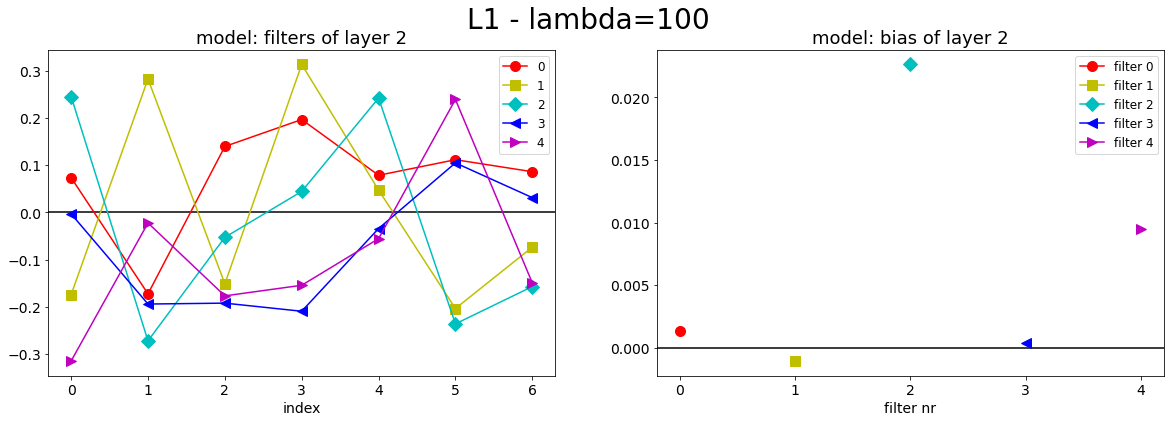

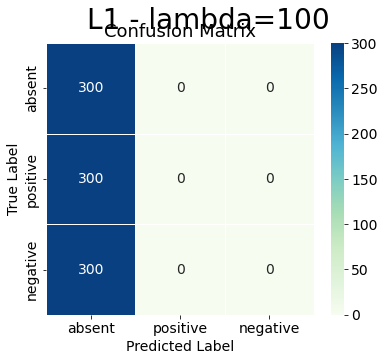

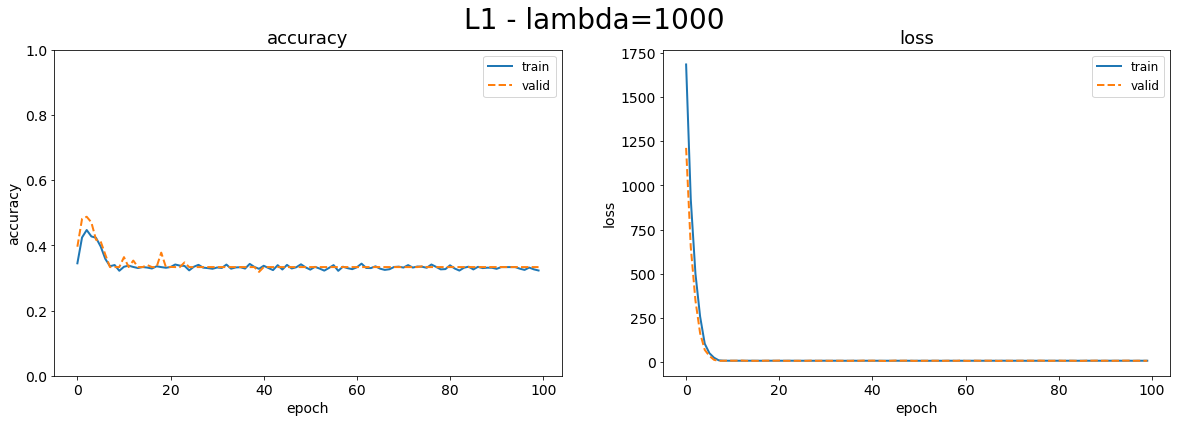

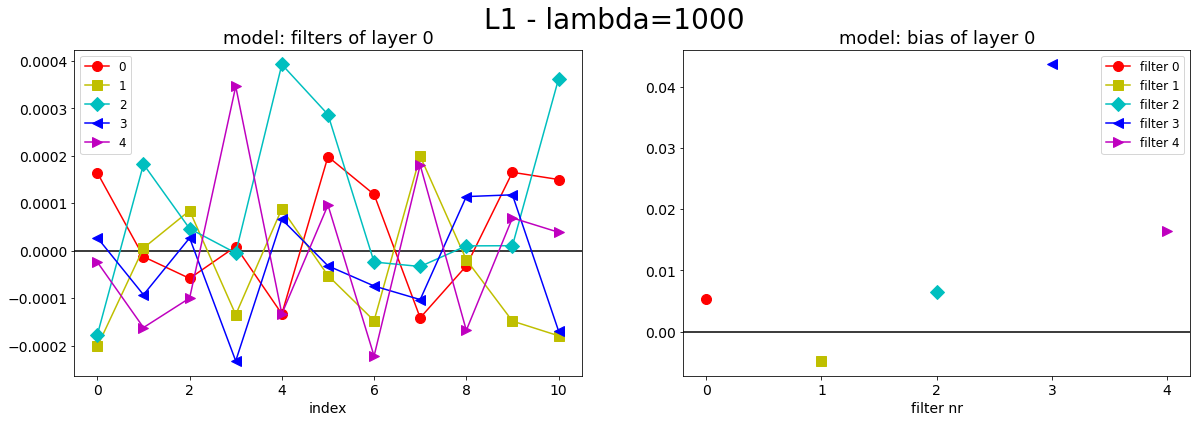

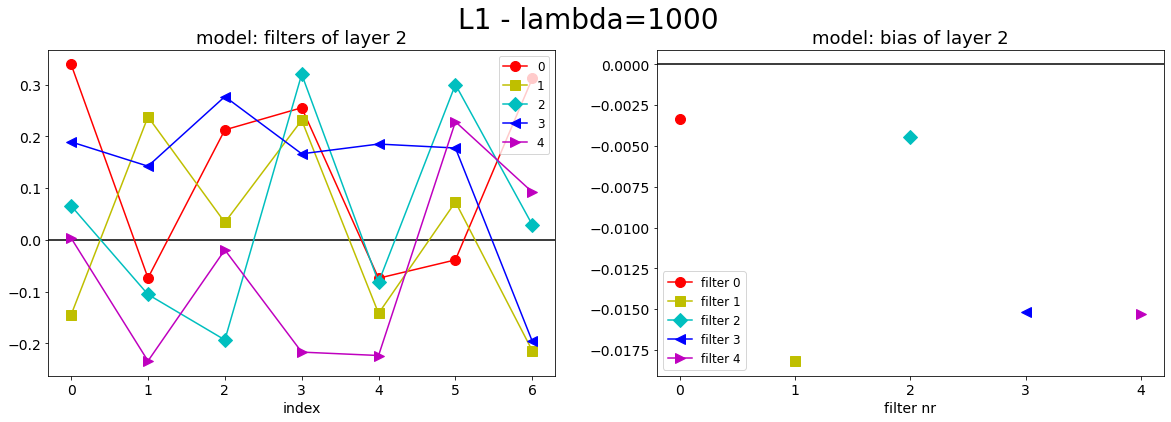

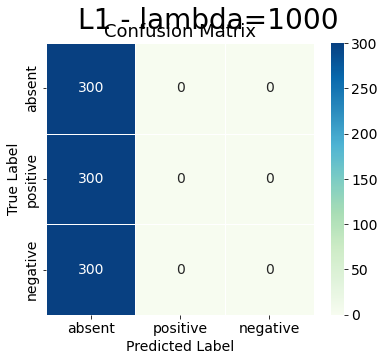

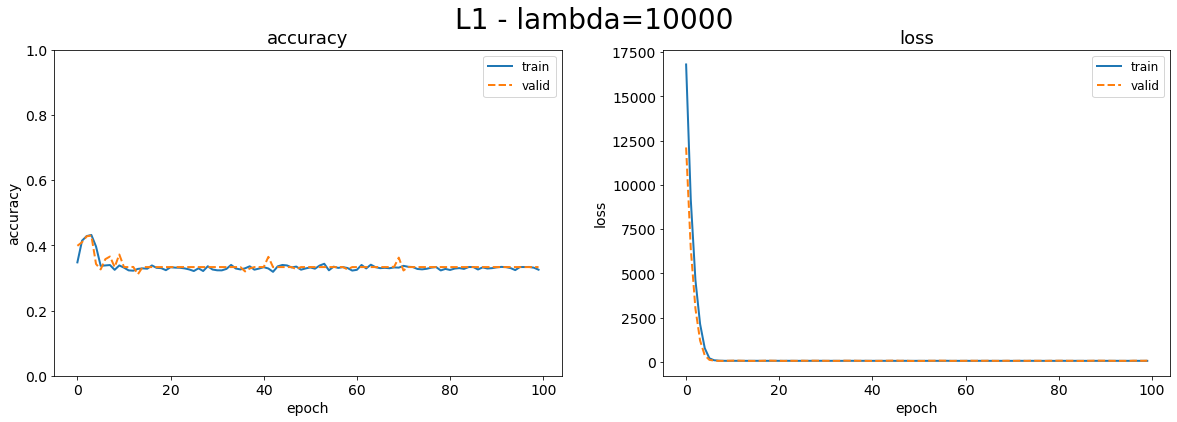

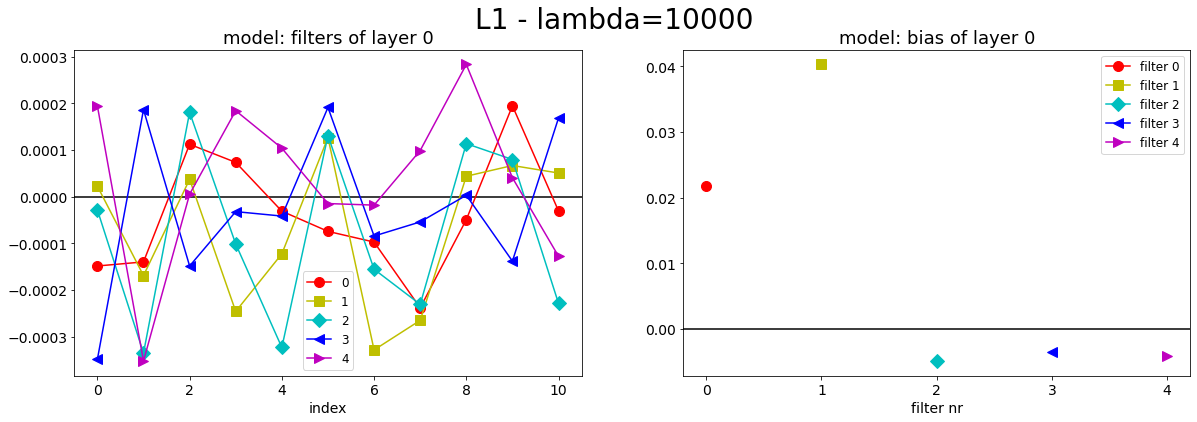

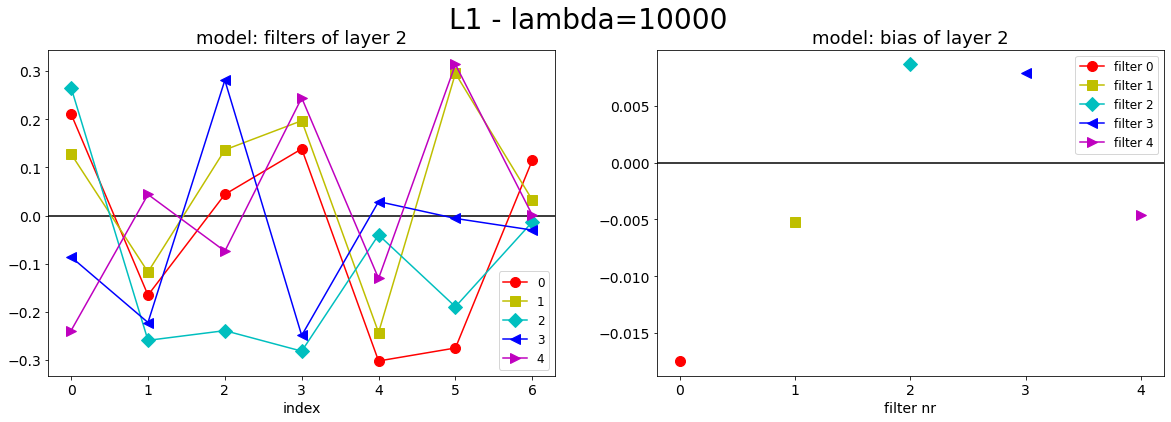

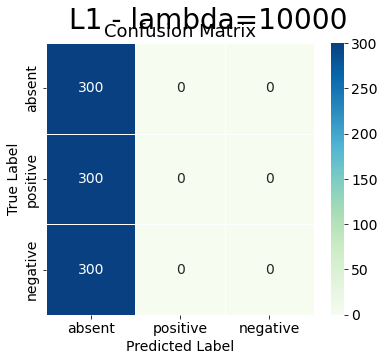

In [ ]:
for i, (fit, model) in enumerate(zip(fits_l1, models_l1)):

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L1 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_history(fit, fig)
    plt.show()

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L1 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 0, fig=fig)
    plt.show()
    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L1 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 2, fig=fig)
    plt.show()

    fig = plt.figure(figsize=(6,5))
    fig.suptitle(f"L1 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.show_confusion_matrix(true=y_test_true_l1[i], pred=y_test_pred_l1[i], fig=fig)
    plt.show()

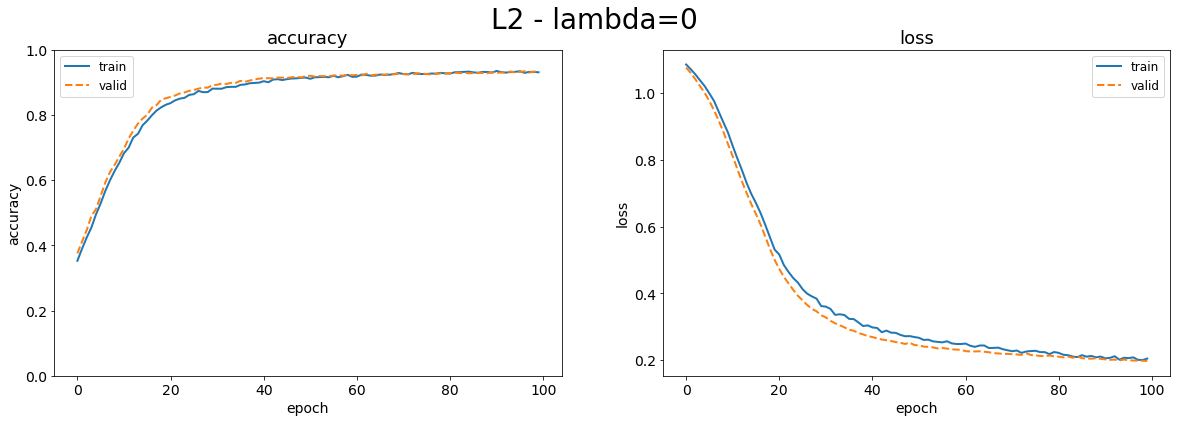

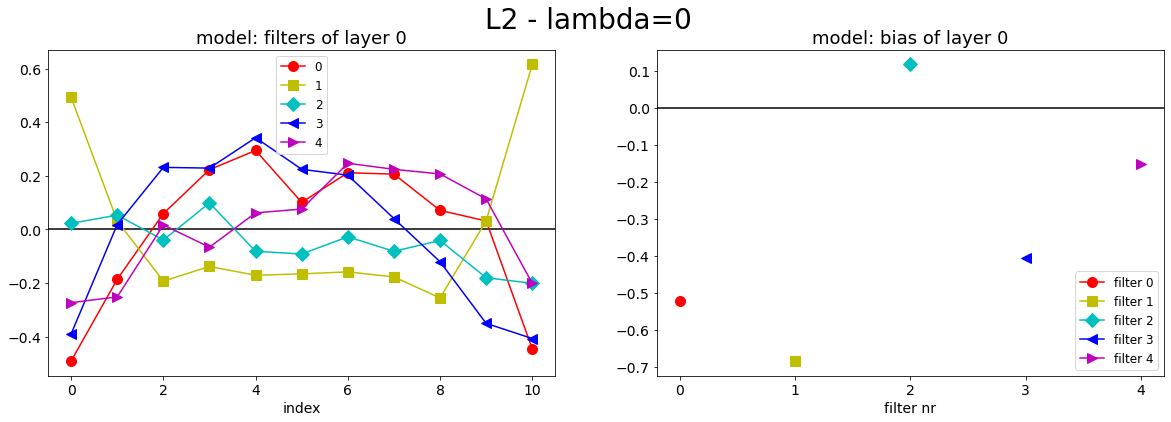

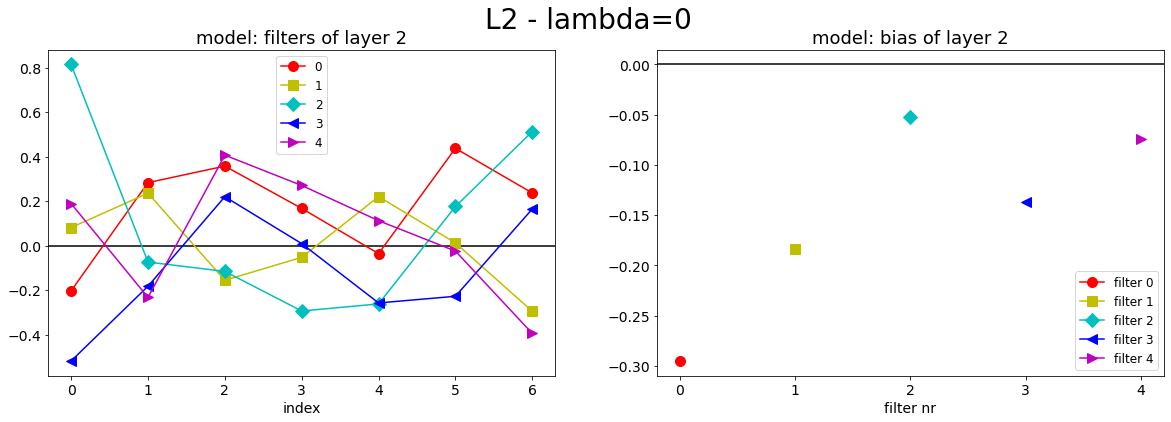

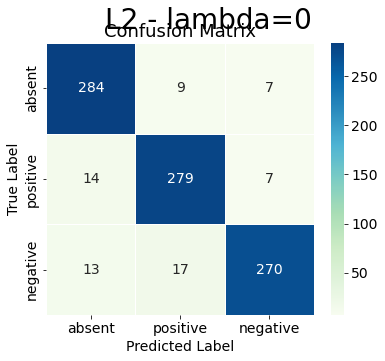

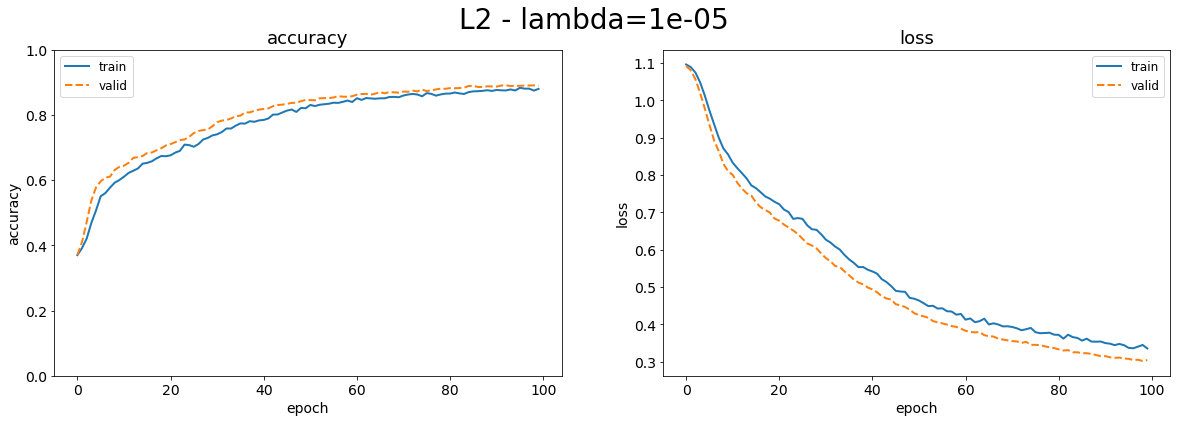

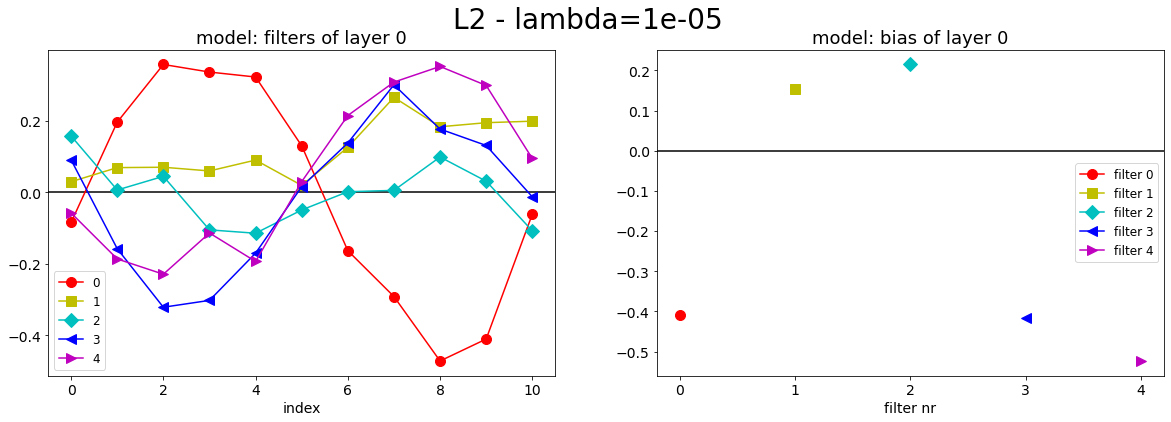

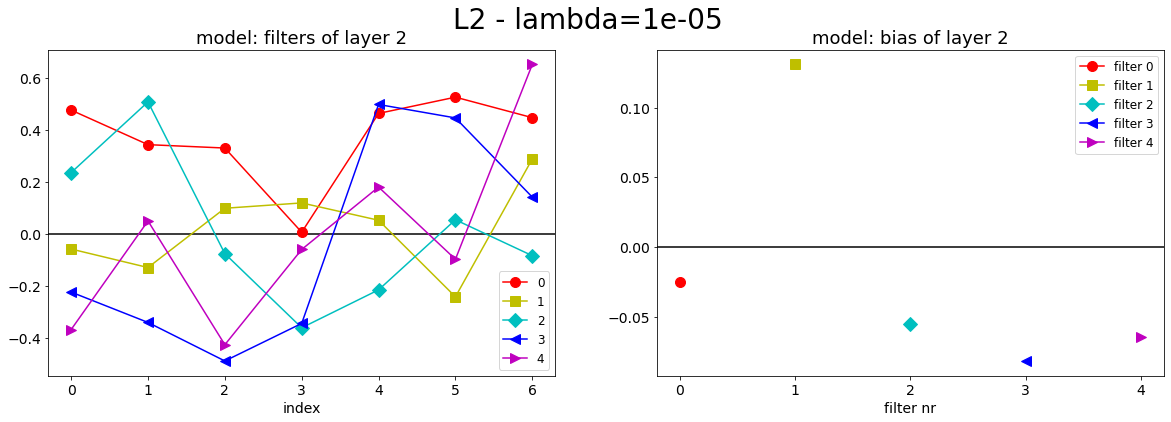

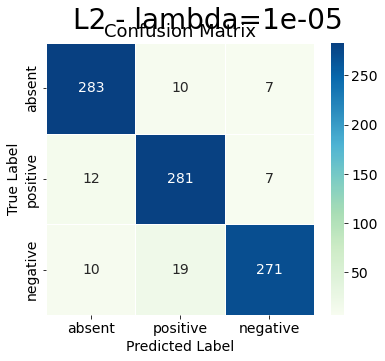

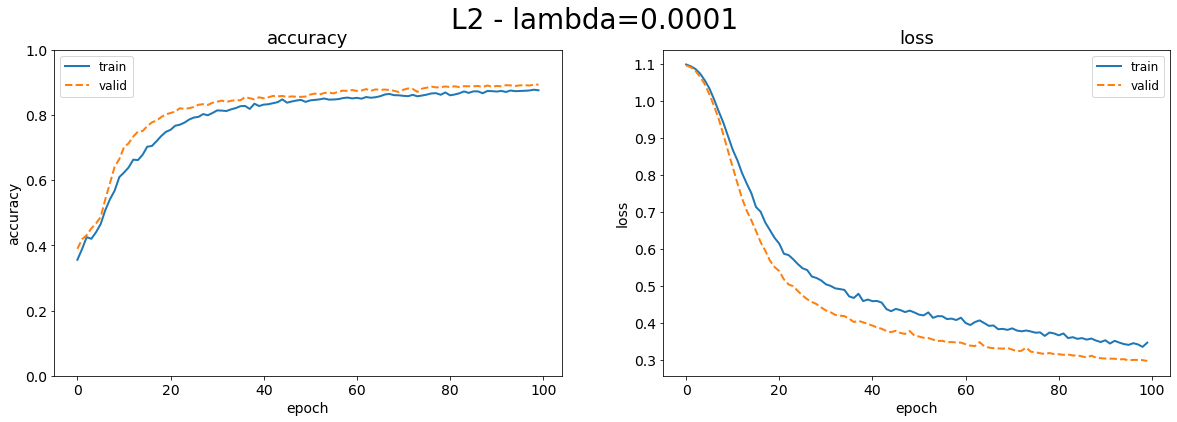

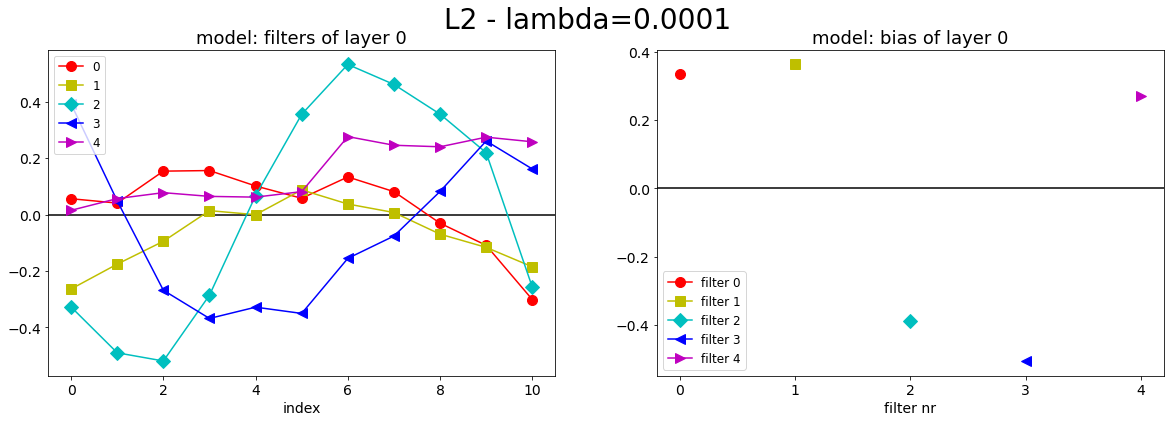

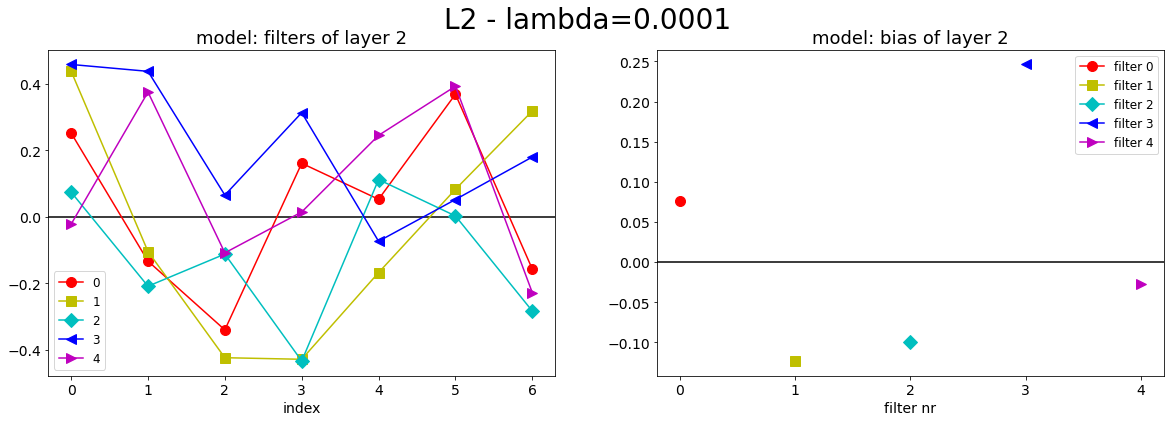

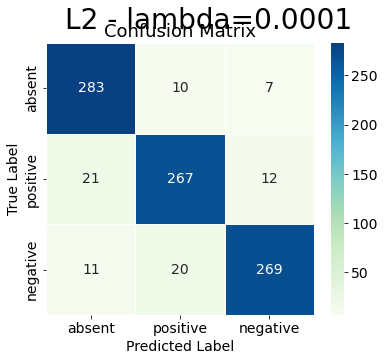

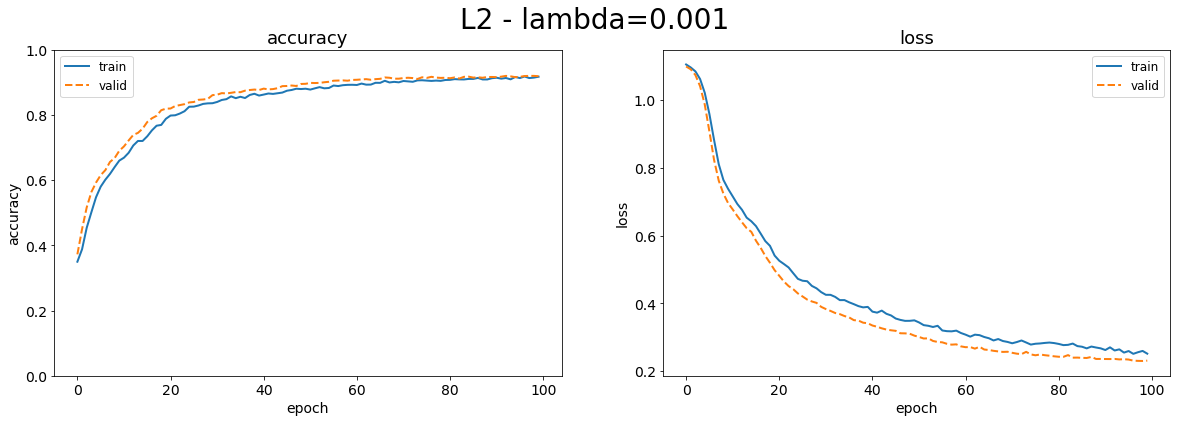

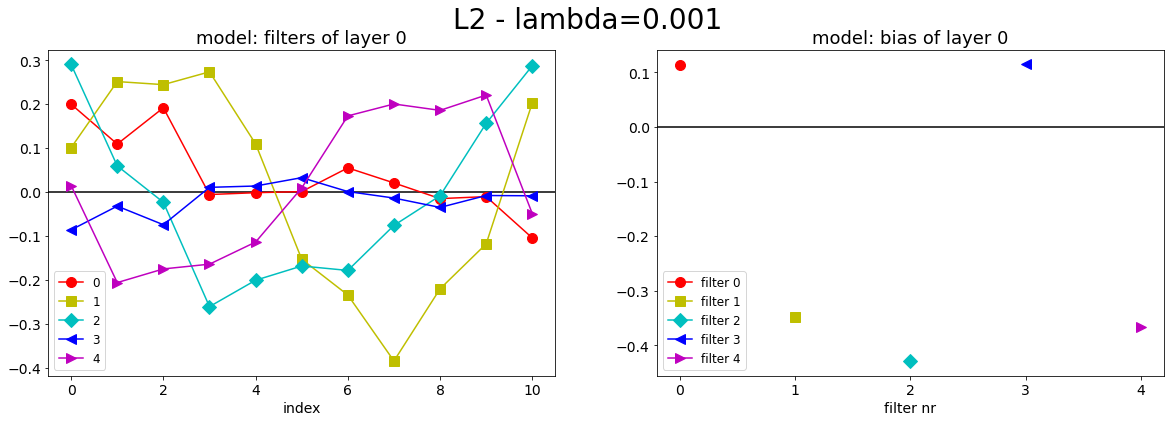

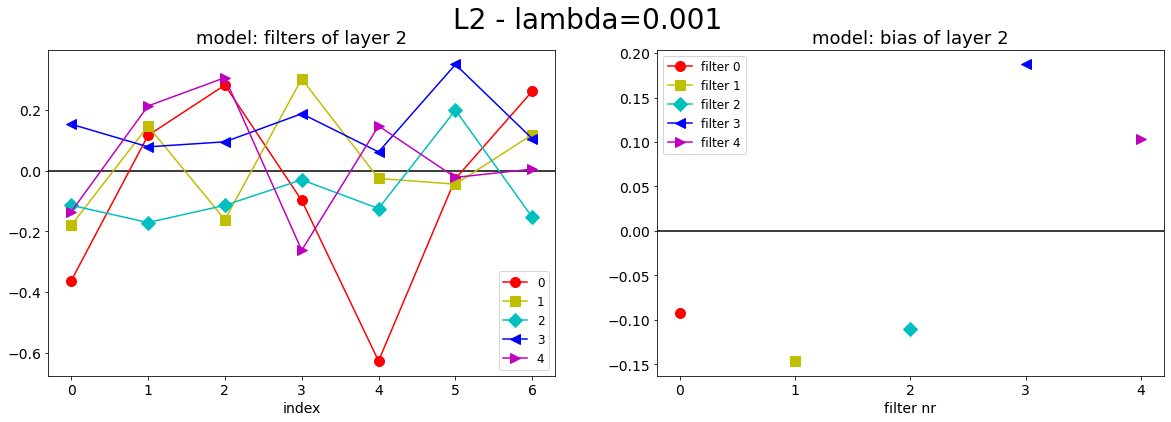

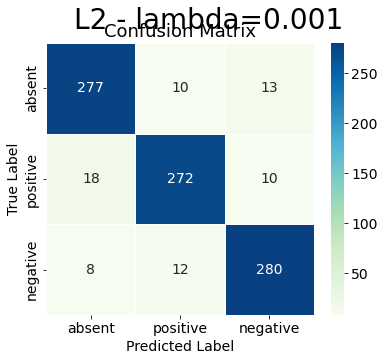

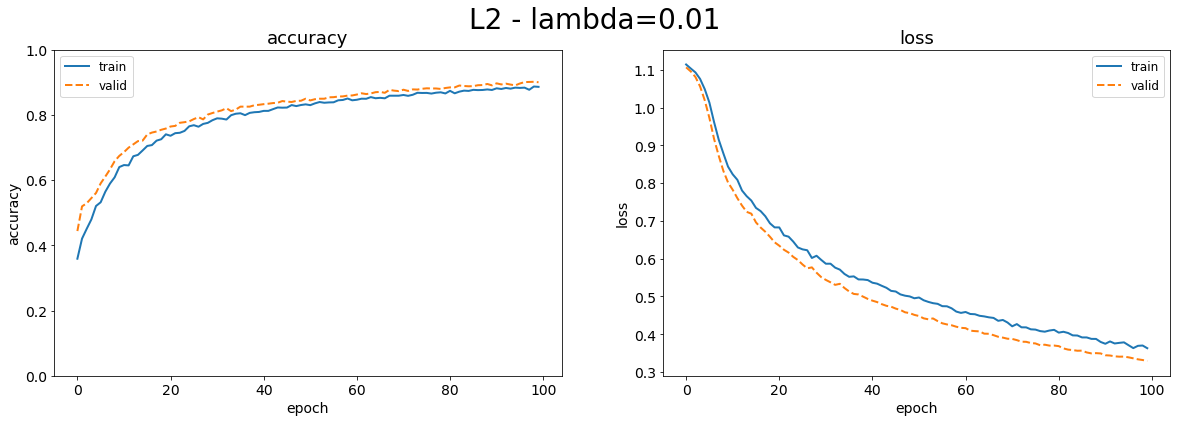

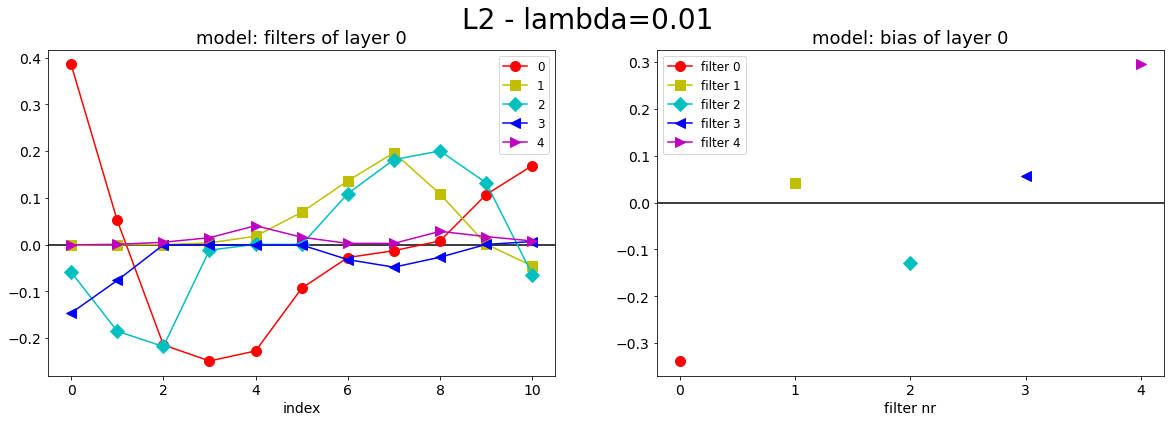

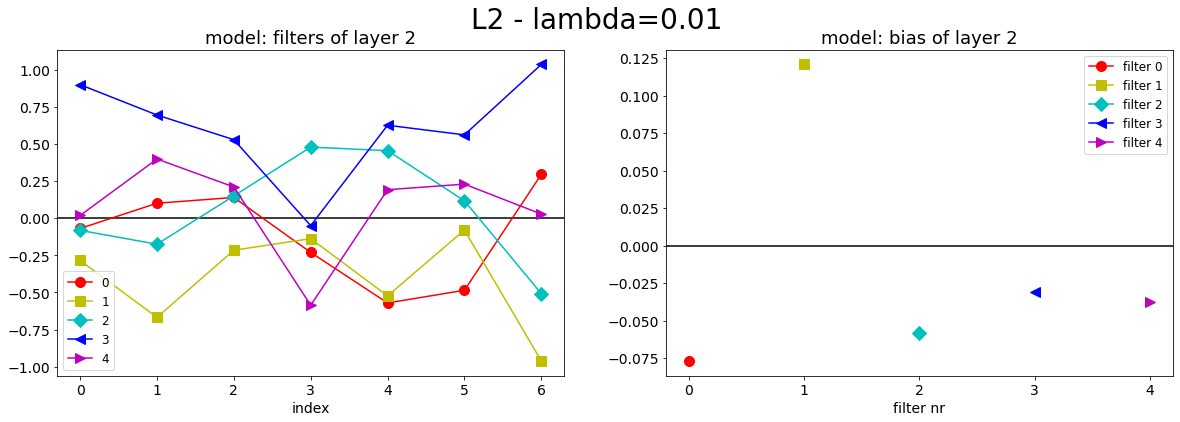

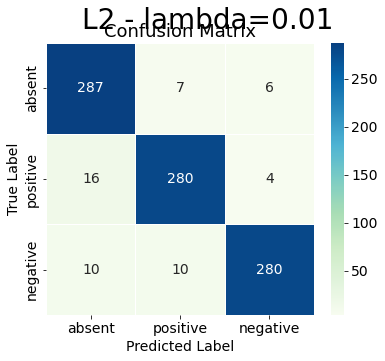

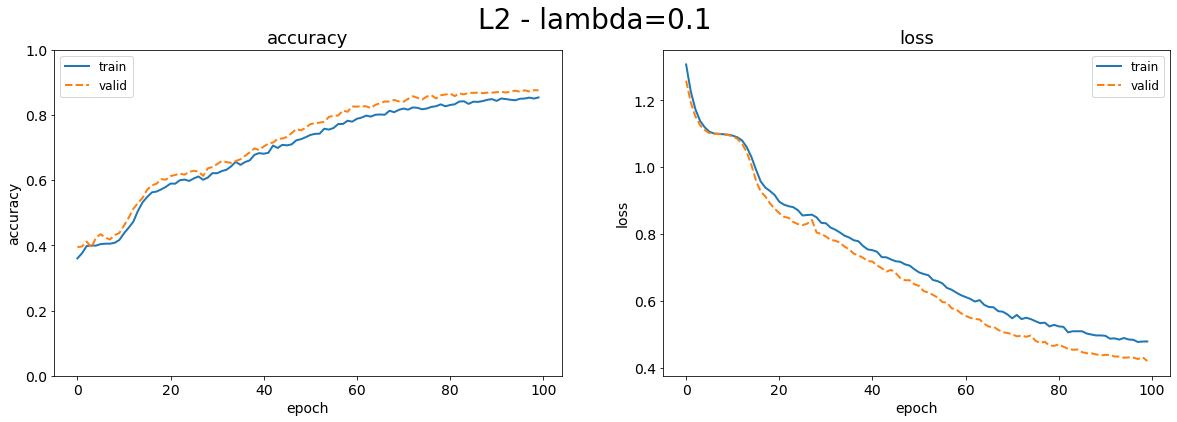

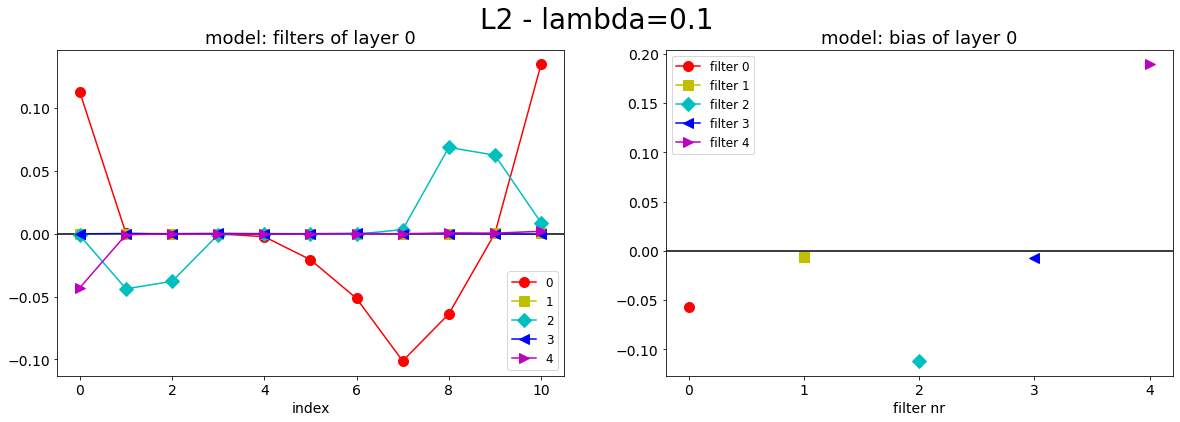

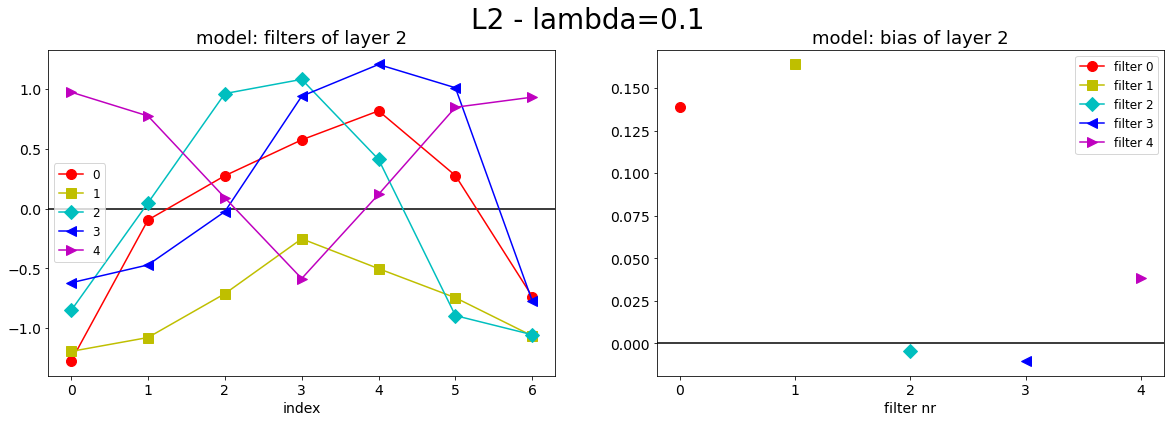

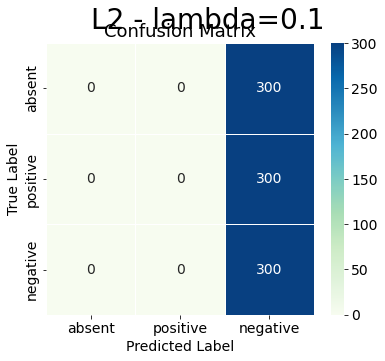

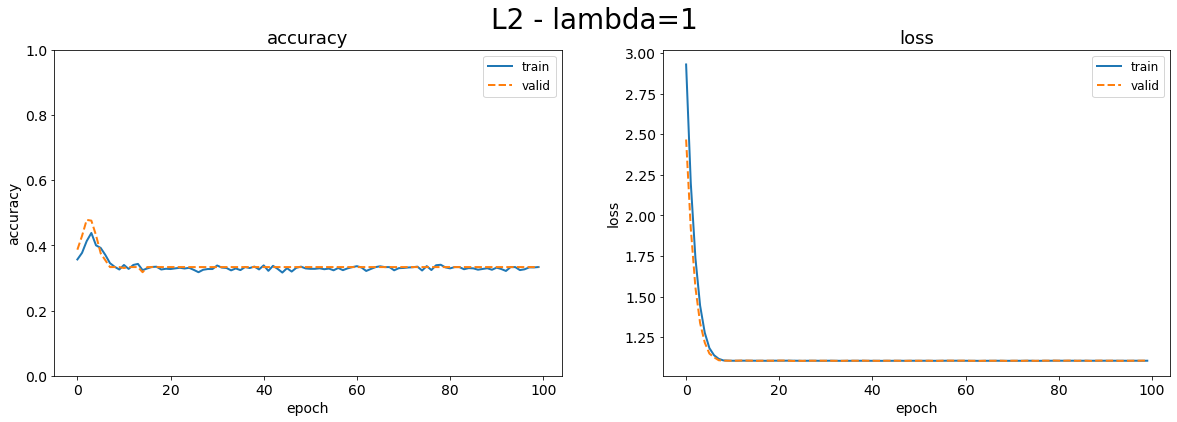

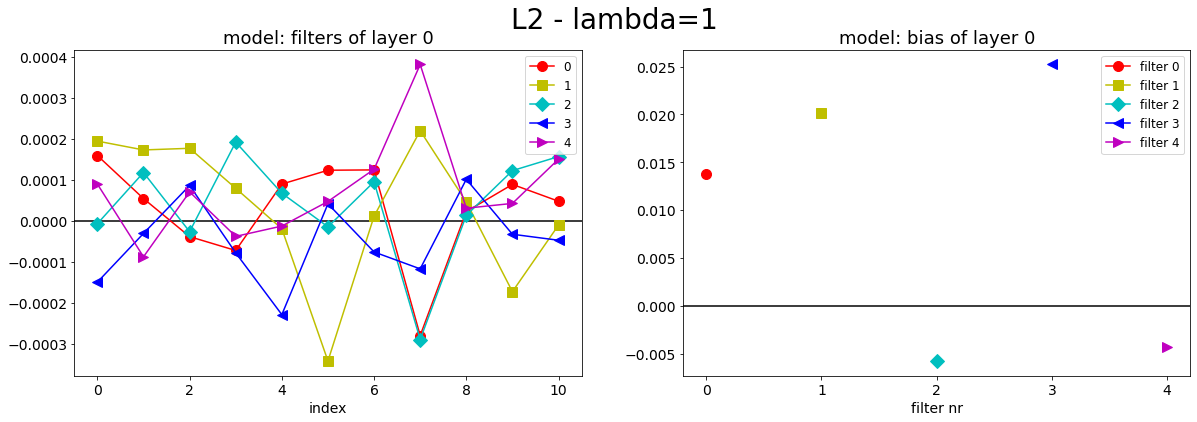

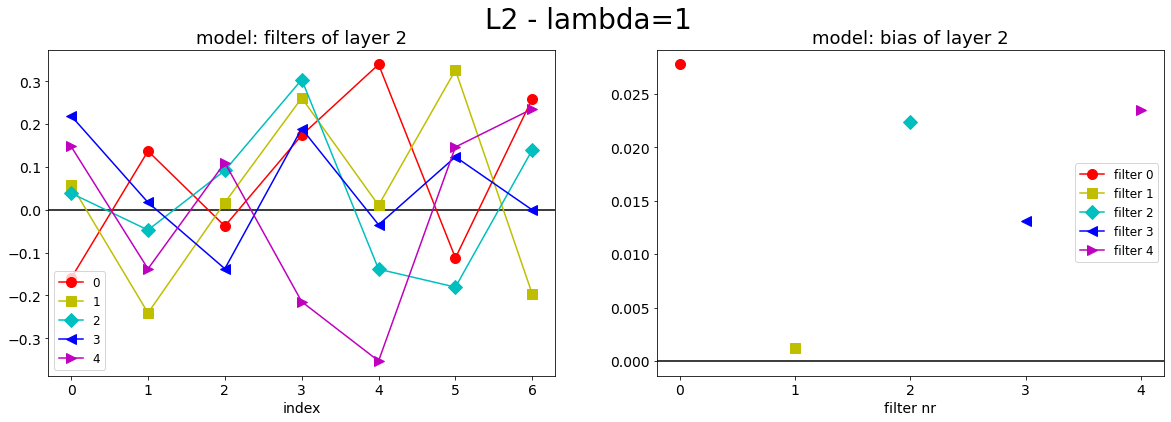

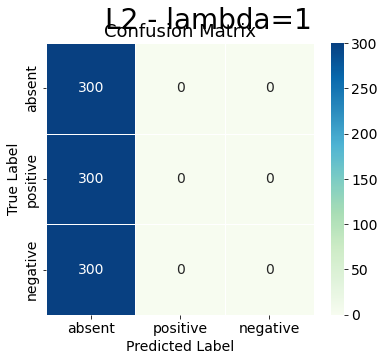

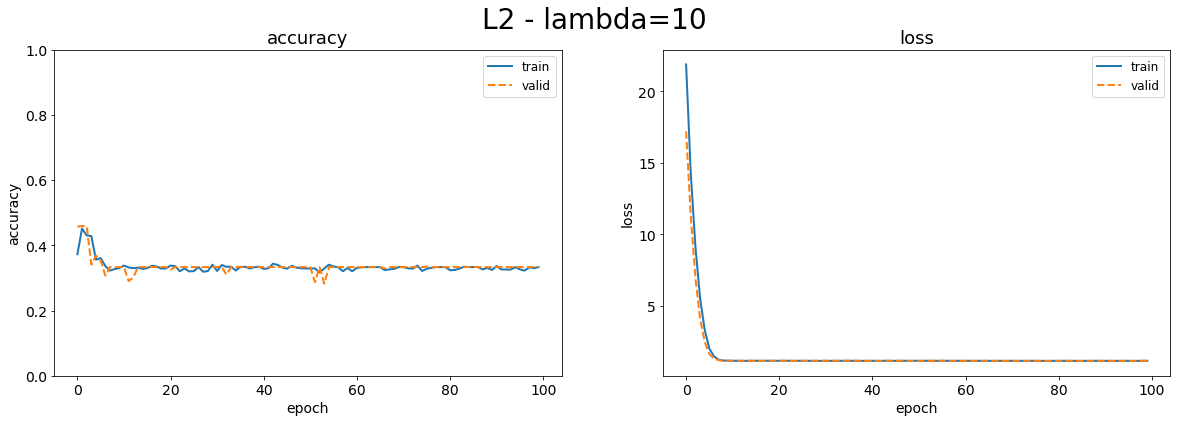

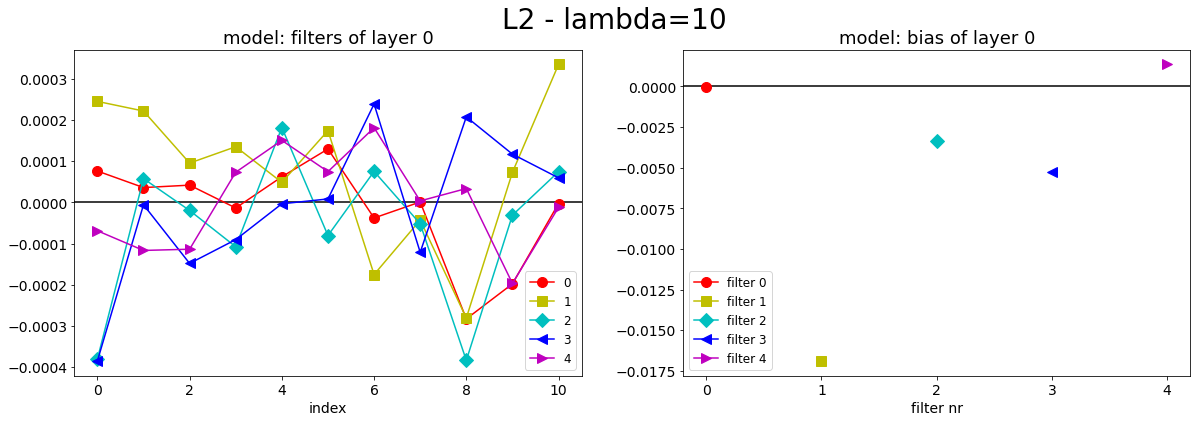

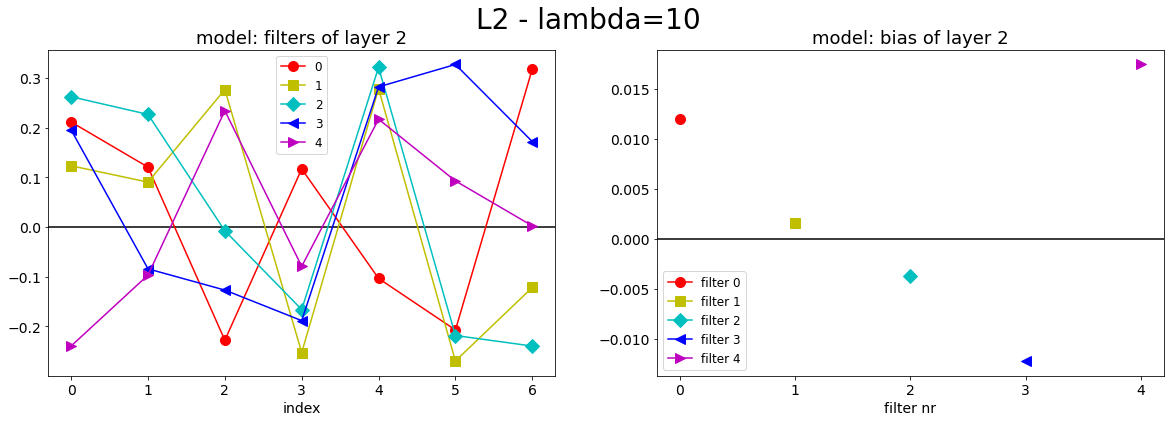

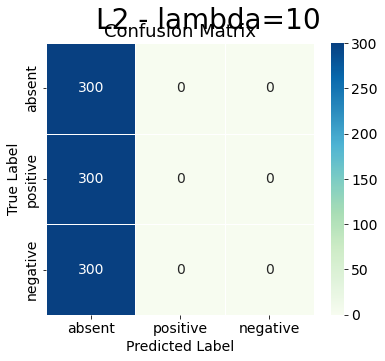

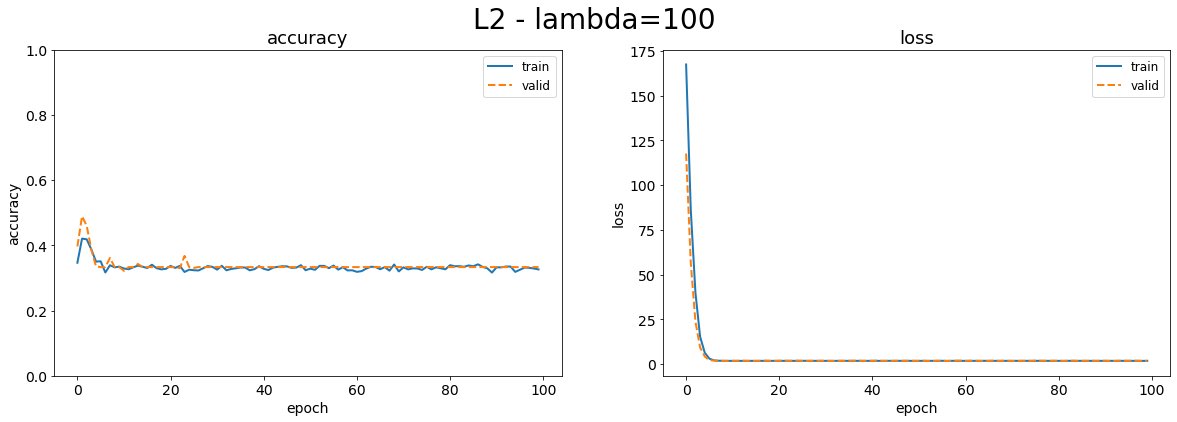

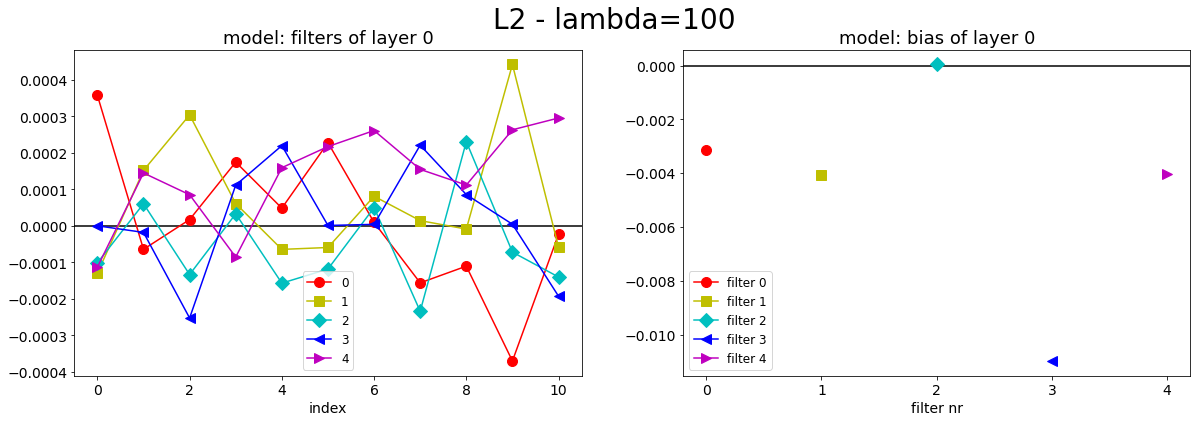

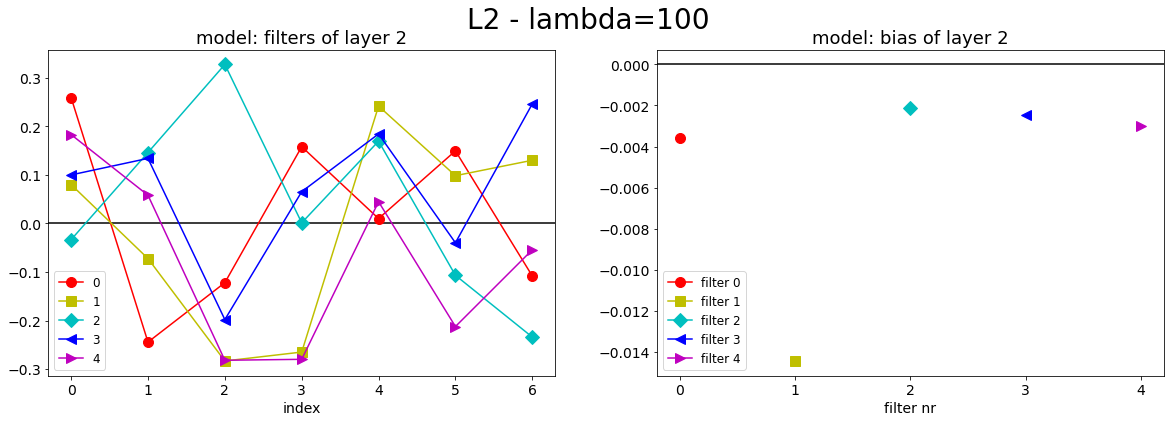

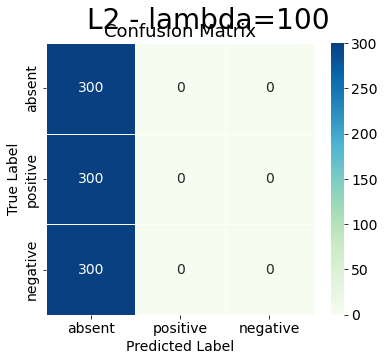

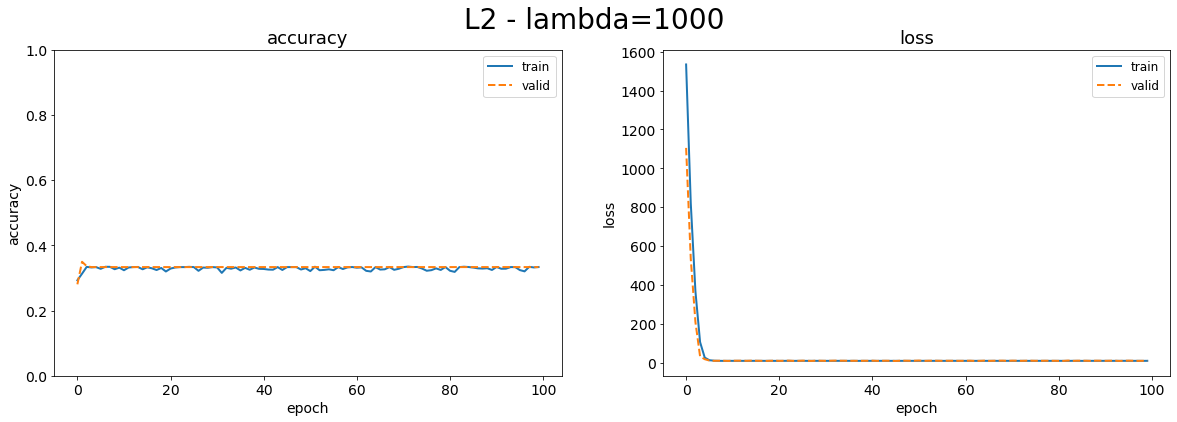

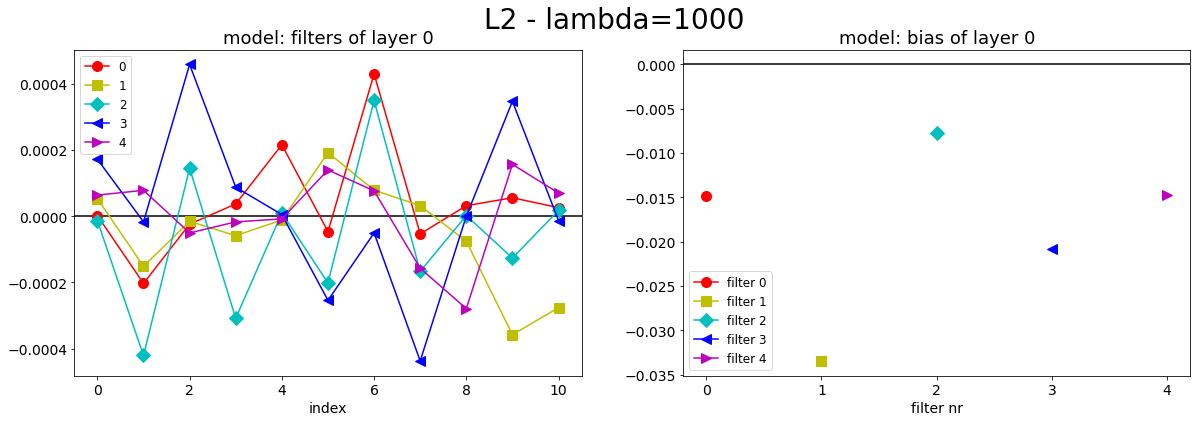

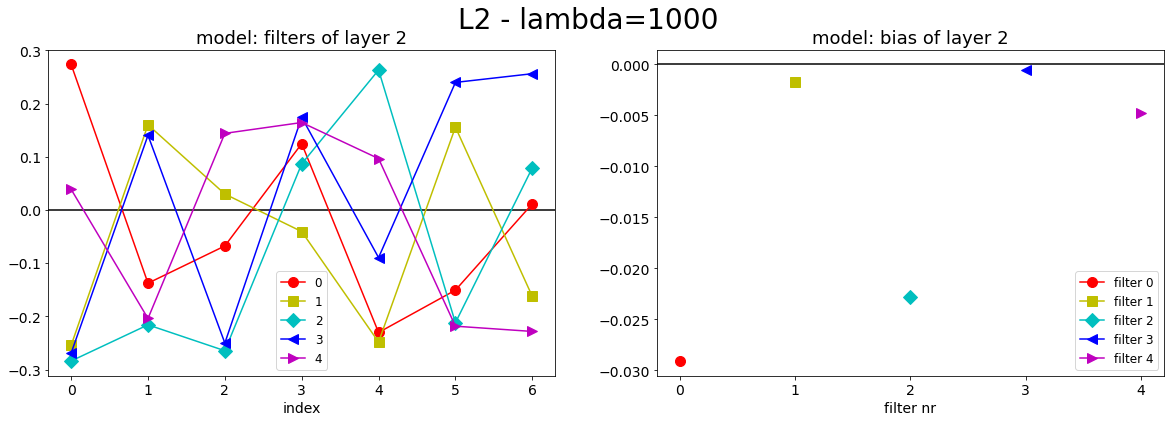

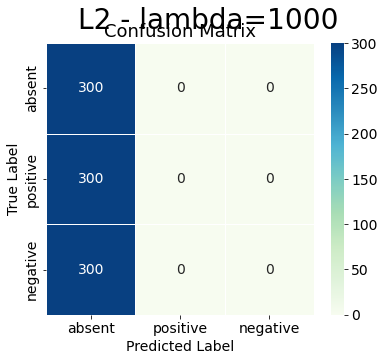

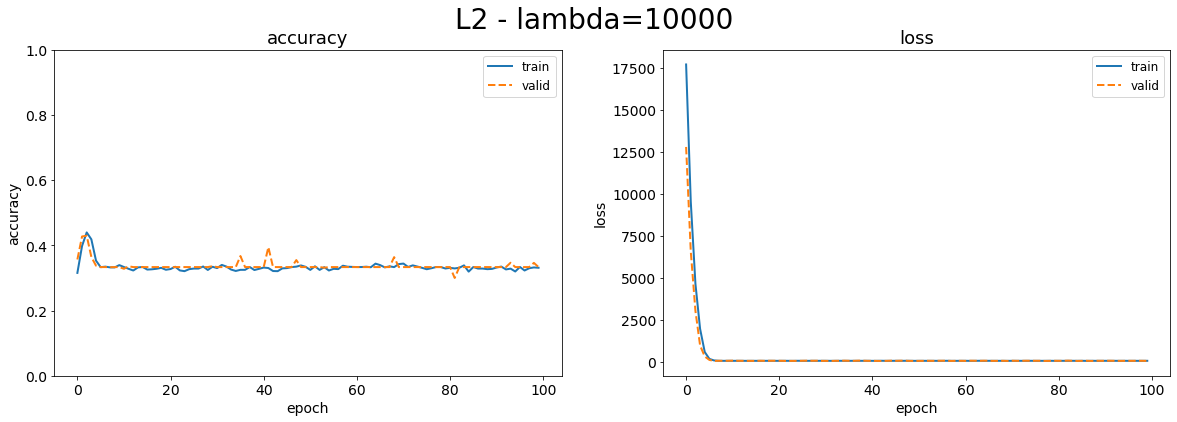

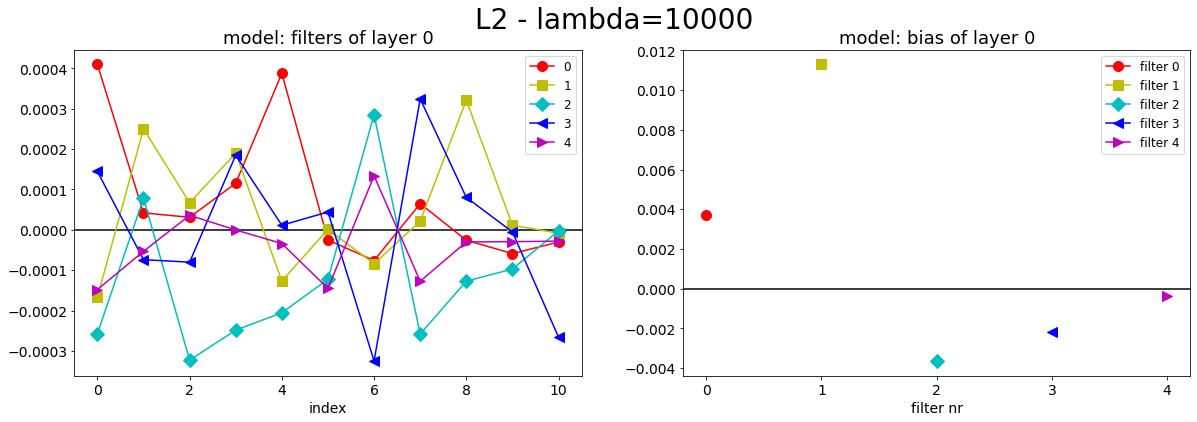

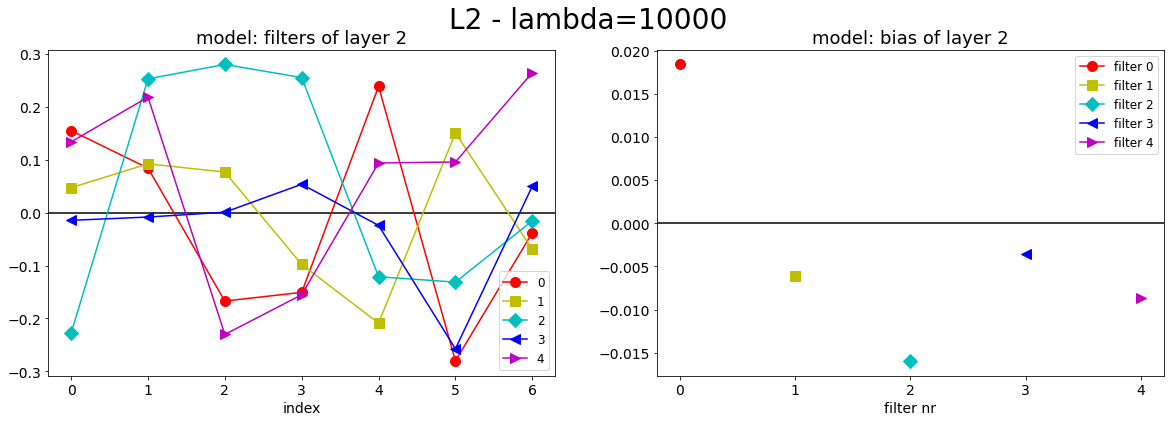

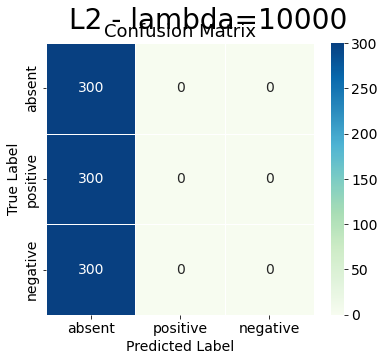

In [ ]:
for i, (fit, model) in enumerate(zip(fits_l2, models_l2)):

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L2 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_history(fit, fig)
    plt.show()

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L2 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 0, fig=fig)
    plt.show()
    fig = plt.figure(figsize=(20,6))
    fig.suptitle(f"L2 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.plot_weights(model, 2, fig=fig)
    plt.show()

    fig = plt.figure(figsize=(6,5))
    fig.suptitle(f"L2 - lambda={lambdas[i]}", fontsize=28)
    ax  = plot_utils.show_confusion_matrix(true=y_test_true_l1[i], pred=y_test_pred_l1[i], fig=fig)
    plt.show()

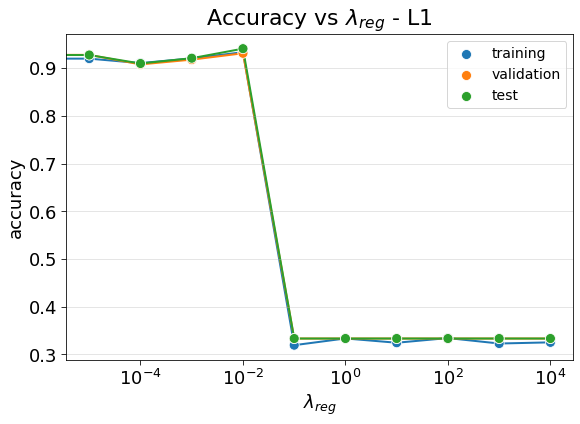

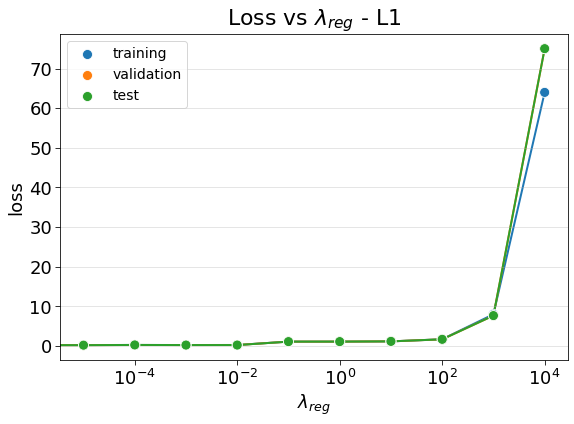

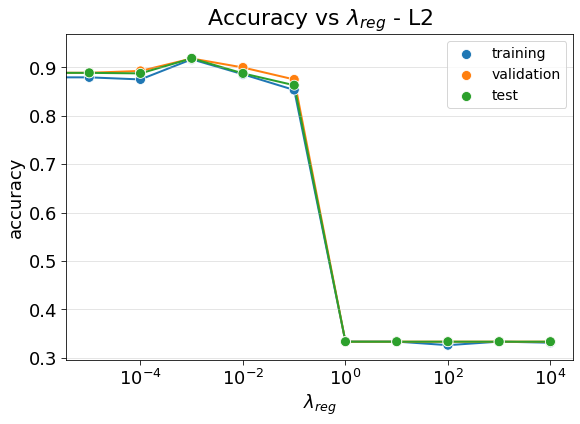

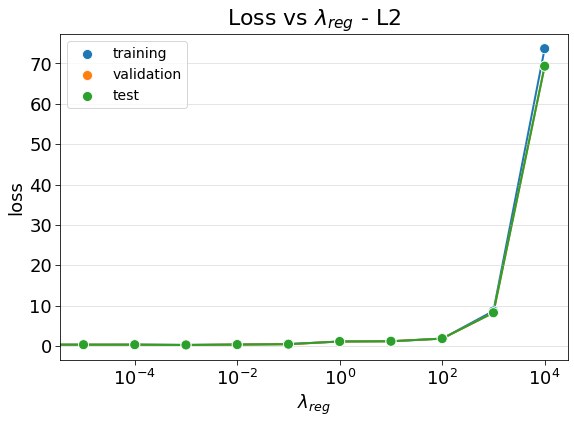

In [ ]:
final_train_acc = [fit.history["accuracy"][-1]     for fit in fits_l1]
final_valid_acc = [fit.history["val_accuracy"][-1] for fit in fits_l1]
test_acc        = [test[1]                 for test in tests_l1]

final_train_loss = [fit.history["loss"][-1]     for fit in fits_l1]
final_valid_loss = [fit.history["val_loss"][-1] for fit in fits_l1]
test_loss        = [test[0]             for test in tests_l1]

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_train_acc,
    fig=fig,
    ax=ax1,
    label="training",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Accuracy vs $\lambda_{reg}$ - L1",
    #ms=final_train_loss,
)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_valid_acc,
    fig=fig,
    ax=ax1,
    label="validation",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:orange",
    lw=2,
    ls="-",
    title="Accuracy vs $\lambda_{reg}$ - L1",
    #ms=final_valid_loss,
)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=test_acc,
    fig=fig,
    ax=ax1,
    label="test",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:green",
    lw=2,
    ls="-",
    title="Accuracy vs $\lambda_{reg}$ - L1",
    #ms=test_loss,
)

ax1.set_axisbelow(True)
ax1.set_xscale('log')
ax1.grid("y", "major", axis="y", alpha=0.4)

plt.show()

fig = plt.figure(figsize=(20,6)) 
ax2 = fig.add_subplot(122) # volevo metterle due a due ma boh, non gli piace

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_train_loss,
    fig=fig,
    ax=ax2,
    label="training",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L1",
    #ms=final_train_acc,
)

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_valid_loss,
    fig=fig,
    ax=ax2,
    label="validation",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:orange",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L1",
    #ms=final_valid_acc,
)

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=test_loss,
    fig=fig,
    ax=ax2,
    label="test",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:green",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L1",
    #ms=test_acc,
)

ax2.set_axisbelow(True)
ax2.set_xscale('log')
ax2.grid("y", "major", axis="y", alpha=0.4)

plt.show()

final_train_acc = [fit.history["accuracy"][-1]     for fit in fits_l2]
final_valid_acc = [fit.history["val_accuracy"][-1] for fit in fits_l2]
test_acc        = [test[1]                 for test in tests_l2]

final_train_loss = [fit.history["loss"][-1]     for fit in fits_l2]
final_valid_loss = [fit.history["val_loss"][-1] for fit in fits_l2]
test_loss        = [test[0]             for test in tests_l2]

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_train_acc,
    fig=fig,
    ax=ax1,
    label="training",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Accuracy vs $\lambda_{reg}$ - L2",
    #ms=final_train_loss,
)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_valid_acc,
    fig=fig,
    ax=ax1,
    label="validation",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:orange",
    lw=2,
    ls="-",
    #ms=final_valid_loss,
)

ax1 = plot_utils.scatter_results(
    parameter=lambdas,
    result=test_acc,
    fig=fig,
    ax=ax1,
    label="test",
    par_label="$\lambda_{reg}$",
    metric_label="accuracy",
    color="tab:green",
    lw=2,
    ls="-",
    title="Accuracy vs $\lambda_{reg}$ - L2",
    #ms=test_loss,
)

ax1.set_axisbelow(True)
ax1.set_xscale('log')
ax1.grid("y", "major", axis="y", alpha=0.4)

plt.show()

fig = plt.figure(figsize=(20,6)) 
ax2 = fig.add_subplot(122) # volevo metterle due a due ma boh, non gli piace

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_train_loss,
    fig=fig,
    ax=ax2,
    label="training",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:blue",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L2",
    #ms=final_train_acc,
)

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=final_valid_loss,
    fig=fig,
    ax=ax2,
    label="validation",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:orange",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L2",
    #ms=final_valid_acc,
)

ax2 = plot_utils.scatter_results(
    parameter=lambdas,
    result=test_loss,
    fig=fig,
    ax=ax2,
    label="test",
    par_label="$\lambda_{reg}$",
    metric_label="loss",
    color="tab:green",
    lw=2,
    ls="-",
    title="Loss vs $\lambda_{reg}$ - L2",
    #ms=test_acc,
)

ax2.set_axisbelow(True)
ax2.set_xscale('log')
ax2.grid("y", "major", axis="y", alpha=0.4)

plt.show()

## Best CNN from 2020-21


In [ ]:
reg = regularizers.l2(0.02)
ini = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

NF    = 5 # number of filters

model = Sequential(name="supercarlo")

model.add(
    Conv1D(
        filters            = 6, 
        kernel_size        = 3, 
        kernel_initializer = ini,
        kernel_regularizer = reg,
        activation         = 'relu',
        input_shape        = input_shape
    )
)
model.add(Conv1D(filters=8, kernel_size=9, activation='relu'))
model.add(Conv1D(filters=4, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D()) 
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

print(model.summary())

opt = tf.keras.optimizers='Adam'

# compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

Model: "supercarlo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 6)             24        
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 8)             440       
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 4)             100       
                                                                 
 global_max_pooling1d (Globa  (None, 4)                0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                        

In [ ]:
BATCH_SIZE = 250
EPOCHS     = 100

fit = model.fit(
    x_train, 
    y_train, 
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS, 
    validation_data = (x_val, y_val),
    verbose         = 0, 
    shuffle         = True
)

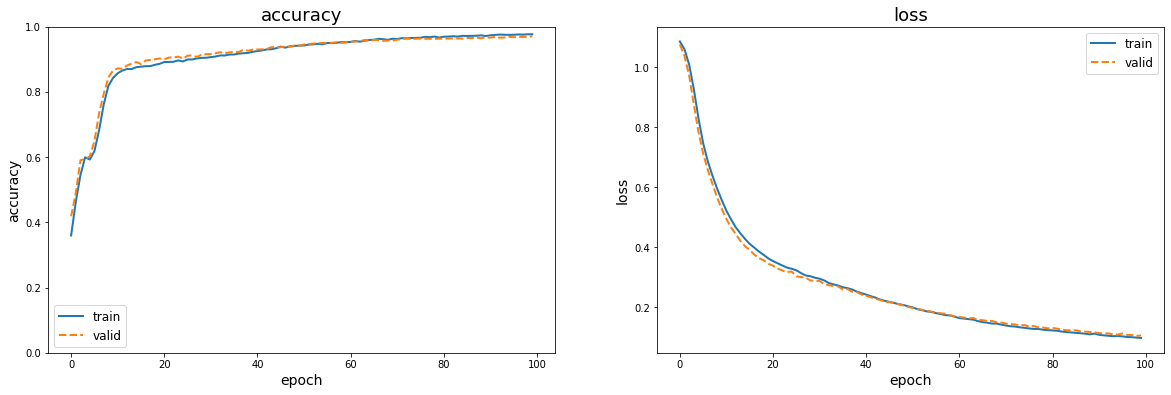

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(20,6))
ax = plot_utils.plot_history(fit, fig)
plt.show()

fig1 = plt.figure(figsize=(20,6))
#plot_utils.plot_weights(model, 0, fig=fig1)
fig2 = plt.figure(figsize=(20,6))
#plot_utils.plot_weights(model, 2, fig=fig2)
#plt.show()

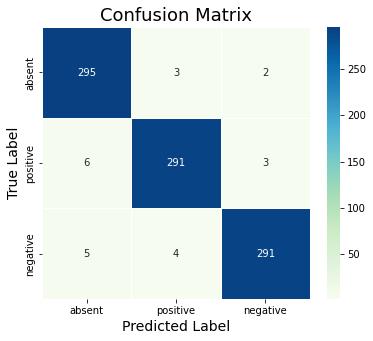

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the val predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

fig = plt.figure(figsize=(6,5))
ax = plot_utils.show_confusion_matrix(true=max_y_test, pred=max_y_pred_test, fig=fig)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>